In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
samples = np.load('results/samples_agg_Final_450.npz')
samplesV = np.load('results/samples_aggV_Final2_360.npz')

In [2]:
import pandas as pd
import os
from functions.adjust_cases_functions import prepare_cases, smooth_1d
# read population
pop        = 40000000.0


# read cases by age without filtering
# previously group them in the ages of interest.
cases_df = pd.read_csv(os.path.join('data/DatosW.csv'), delimiter=";", parse_dates=["Dates"], dayfirst=True).set_index('Dates')
cases_df['I_NV+PD'] = cases_df['InfectadosNoVacunados'].values+ cases_df['InfectadosPrimeraDosis'].values
cases_df['H_NV+PD'] = cases_df['HospitalizadosNoVacunados'].values + cases_df['HospitalizadosPrimeraDosis'].values
cases_df['M_NV+PD'] = cases_df['MuertesNoVacunados'].values + cases_df['MuertesPrimeraDosis'].values

cases_df = prepare_cases(cases_df, col='InfectadosNoVacunados')
cases_df = prepare_cases(cases_df, col='InfectadosPrimeraDosis')
cases_df = prepare_cases(cases_df, col='InfectadosEsquemaCompleto')
cases_df = prepare_cases(cases_df, col='InfectadosDosisRefuerzo')
cases_df = prepare_cases(cases_df, col='InfectadosTotal')
cases_df = prepare_cases(cases_df, col='HospitalizadosNoVacunados')
cases_df = prepare_cases(cases_df, col='HospitalizadosPrimeraDosis')
cases_df = prepare_cases(cases_df, col='HospitalizadosEsquemaCompleto')
cases_df = prepare_cases(cases_df, col='HospitalizadosDosisRefuerzo')
cases_df = prepare_cases(cases_df, col='HospitalizadosTotal')
cases_df = prepare_cases(cases_df, col='MuertesNoVacunados')
cases_df = prepare_cases(cases_df, col='MuertesPrimeraDosis')
cases_df = prepare_cases(cases_df, col='MuertesEsquemaCompleto')
cases_df = prepare_cases(cases_df, col='MuertesDosisRefuerzo')
cases_df = prepare_cases(cases_df, col='MuertesTotal')
cases_df = prepare_cases(cases_df, col='I_NV+PD')
cases_df = prepare_cases(cases_df, col='H_NV+PD')
cases_df = prepare_cases(cases_df, col='M_NV+PD')
cases_df

InfectadosNoVacunados  InfectadosPrimeraDosis  \
Dates                                                       
2020-03-06                      0                       0   
2020-03-07                      1                       0   
2020-03-08                      1                       0   
2020-03-09                      1                       0   
2020-03-10                      3                       0   
...                           ...                     ...   
2021-11-03                   9937                       3   
2021-11-04                   9684                       0   
2021-11-05                   9740                       0   
2021-11-06                   9763                       0   
2021-11-07                   9013                       0   

            InfectadosEsquemaCompleto  InfectadosDosisRefuerzo  \
Dates                                                            
2020-03-06                          0                        0   
2020-03-07                          0                        0   
2020-03-08                          0                        0   
2020-03-09                          0                        0   
2020-03-10                          0                        0   
...                               ...                      ...   
2021-11-03                          7                        0   
2021-11-04                          0                        0   
2021-11-05                          0                        0   
2021-11-06                          0                        0   
2021-11-07                          0                        0   

            InfectadosTotal  HospitalizadosNoVacunados  \
Dates                                                    
2020-03-06                0                          0   
2020-03-07                1                          1   
2020-03-08                1                          1   
2020-03-09                1                          1   
2020-03-10                3                          2   
...                     ...                        ...   
2021-11-03             9947                          0   
2021-11-04             9684                          0   
2021-11-05             9740                          0   
2021-11-06             9763                          0   
2021-11-07             9013                          0   

            HospitalizadosPrimeraDosis  HospitalizadosEsquemaCompleto  \
Dates                                                                   
2020-03-06                           0                              0   
2020-03-07                           0                              0   
2020-03-08                           0                              0   
2020-03-09                           0                              0   
2020-03-10                           0                              0   
...                                ...                            ...   
2021-11-03                           0                              1   
2021-11-04                           0                              0   
2021-11-05                           0                              0   
2021-11-06                           0                              0   
2021-11-07                           0                              0   

            HospitalizadosDosisRefuerzo  HospitalizadosTotal  ...  \
Dates                                                         ...   
2020-03-06                            0                    0  ...   
2020-03-07                            0                    1  ...   
2020-03-08                            0                    1  ...   
2020-03-09                            0                    1  ...   
2020-03-10                            0                    2  ...   
...                                 ...                  ...  ...   
2021-11-03                            0                    1  ...   
2021-11-04                       

In [3]:
date_init  = pd.to_datetime("2020-03-06")
date_end   = pd.to_datetime("2021-02-14")

dates_week = pd.date_range(start=date_init, end=date_end, freq='1D')

In [4]:
date_initV  = pd.to_datetime("2021-02-15")
date_endV   = pd.to_datetime("2021-09-30")

dates_weekV = pd.date_range(start=date_initV, end=date_endV, freq='1D')

In [5]:
bog_cases_df = cases_df.reset_index()
obs_df = bog_cases_df
obs_df = obs_df.set_index("Dates")
obs_df  = obs_df.loc[date_init:date_end]

# obs_w_df             = obs_df.resample('W-Sun').sum()

oev_df                     = pd.DataFrame(columns=["Dates", "OEV_confirmed", "OEV_deaths"])
oev_df["Dates"]            = obs_df.index.values
oev_df                     = oev_df.set_index("Dates")
oev_df["OEV_confirmed"]    = np.maximum(1e-4, obs_df["smoothed_InfectadosNoVacunados"].values**2/100 )
oev_df["OEV_deaths"]       = np.maximum(25, obs_df["smoothed_MuertesNoVacunados"].values**2/100 )

dates_assimilation = obs_df.index.get_level_values(0).values
dates = dates_assimilation
num_steps = len(dates)

In [6]:
bog_cases_dfV = cases_df.reset_index()
obs_dfV = bog_cases_dfV
obs_dfV = obs_dfV.set_index("Dates")
obs_dfV  = obs_dfV.loc[date_initV:date_endV]

oev_dfV                     = pd.DataFrame(columns=["Dates", "OEV_confirmedV", "OEV_deathsV"])
oev_dfV["Dates"]            = obs_dfV.index.values
oev_dfV                     = oev_dfV.set_index("Dates")
oev_df["OEV_confirmed"]    = np.maximum(1e-4, obs_df["smoothed_I_NV+PD"].values**2/100 )
oev_df["OEV_deaths"]       = np.maximum(25, obs_df["smoothed_M_NV+PD"].values**2/100 )
oev_df["OEV_confirmedV"]    = np.maximum(1e-4, obs_df["smoothed_InfectadosEsquemaCompleto"].values**2/100 )
oev_df["OEV_deathsV"]       = np.maximum(25, obs_df["smoothed_MuertesEsquemaCompleto"].values**2/100 )

dates_assimilationV = obs_dfV.index.get_level_values(0).values
datesV = dates_assimilationV
num_stepsV = len(datesV)

In [7]:
def create_df_response(samples, time, date_init ='2020-03-06',  quantiles = [50, 80, 95], forecast_horizon=27, dates=None, use_future=False):
    """[summary]

    Args:
        samples ([type]): [description]
        time ([type]): [description]
        date_init (str, optional): [description]. Defaults to '2020-03-06'.
        forecast_horizon (int, optional): [description]. Defaults to 27.
        use_future (bool, optional): [description]. Defaults to False.

    Returns:
        [type]: [description]
    """
    if dates is not None:
        dates_fitted = dates
    else:
        dates_fitted   = pd.date_range(start=pd.to_datetime(date_init), periods=time)
        dates_forecast = pd.date_range(start=dates_fitted[-1]+datetime.timedelta(1), periods=forecast_horizon)

    dates = list(dates_fitted)
    types = ['estimate']*len(dates_fitted)
    if use_future:
        dates += list(dates_forecast)
        types  += ['forecast']*len(dates_forecast)

    results_df = pd.DataFrame(samples.T)
    df_response = pd.DataFrame(index=dates)
    # Calculate key statistics
    df_response['mean']        = results_df.mean(axis=1).values
    df_response['median']      = results_df.median(axis=1).values
    df_response['std']         = results_df.std(axis=1).values

    for quant in quantiles:
        low_q  = ((100-quant)/2)/100
        high_q = 1-low_q

        df_response[f'low_{quant}']  = results_df.quantile(q=low_q, axis=1).values
        df_response[f'high_{quant}'] = results_df.quantile(q=high_q, axis=1).values

    df_response['type']        =  types
    df_response.index.name = 'date'
    return df_response

In [28]:
param_post = samples['param_posterior']
param_postV = samplesV['param_posterior']
param_post.shape

(3, 200, 346, 450)

In [29]:
p_prior = np.mean(param_post[:,:,-1,:],-1)
p_prior.shape

(3, 200)

In [30]:
beta_post_all = param_post[0,:,:,:]
alpha_post_all = param_post[1,:,:,:]

beta_time   = np.mean(beta_post_all[:,:,:], -1)
alpha_time = np.mean(alpha_post_all[:,:,:], -1)

beta_post_allV = param_postV[0,:,:,:]
alpha_post_allV = param_postV[1,:,:,:]
Vr_post_allV = param_postV[2,:,:,:]

beta_timeV   = np.mean(beta_post_allV[:,:228,:], -1)
alpha_timeV = np.mean(alpha_post_allV[:,:228,:], -1)
Vr_timeV = np.mean(Vr_post_allV[:,:228,:], -1)

print(beta_time.shape)
print(beta_timeV.shape)

(200, 346)
(200, 228)


In [31]:

df_b = pd.DataFrame(alpha_time.T, index=list(dates_assimilation)).groupby(pd.Grouper(freq='M')).mean()
df_b.index.name = 'date'
df_b.index = df_b.index.strftime("%Y-%m").values
#alpha_time.shape
df_c = pd.DataFrame(alpha_timeV.T, index=list(dates_assimilationV)).groupby(pd.Grouper(freq='M')).mean()
df_c.index.name = 'date'
df_c.index = df_c.index.strftime("%Y-%m").values
df_F = pd.concat([df_b, df_c])

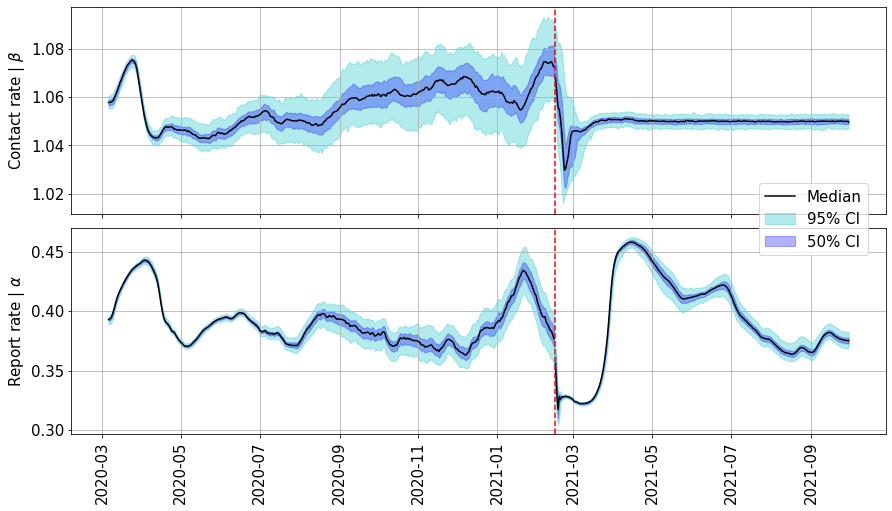

In [32]:

plt.rcParams.update({'axes.facecolor':'white'})
df_beta  = create_df_response(beta_time, time=num_steps, dates =dates_assimilation)
df_betaV  = create_df_response(beta_timeV, time=num_stepsV, dates =dates_assimilationV)
df_alpha = create_df_response(alpha_time, time=num_steps, dates =dates_assimilation)
df_alphaV = create_df_response(alpha_timeV, time=num_stepsV, dates =dates_assimilationV)

fig, ax = plt.subplots(2, 1, figsize=(12.5, 7.2), sharex=True)
ax[0].plot(df_beta.index.values, df_beta["median"], color='k', label='Median')
ax[0].fill_between(df_beta.index.values, df_beta["high_95"], df_beta["low_95"], color='c', alpha=0.3, label='95% CI')
ax[0].fill_between(df_beta.index.values, df_beta["high_50"], df_beta["low_50"], color='b', alpha=0.3, label='50% CI')

ax[0].plot(df_betaV.index.values, df_betaV["median"], color='k')#, label='Median')
ax[0].fill_between(df_betaV.index.values, df_betaV["high_95"], df_betaV["low_95"], color='c', alpha=0.3)#, label='95% CI')
ax[0].fill_between(df_betaV.index.values, df_betaV["high_50"], df_betaV["low_50"], color='b', alpha=0.3)#, label='50% CI')

ax[1].plot(df_alpha.index.values, df_alpha["median"], color='k', label='Median')
ax[1].fill_between(df_alpha.index.values, df_alpha["high_95"], df_alpha["low_95"], color='c', alpha=0.3, label='95% CI')
ax[1].fill_between(df_alpha.index.values, df_alpha["high_50"], df_alpha["low_50"], color='b', alpha=0.3, label='50% CI')

ax[1].plot(df_alphaV.index.values, df_alphaV["median"], color='k')#, label='Median')
ax[1].fill_between(df_alphaV.index.values, df_alphaV["high_95"], df_alphaV["low_95"], color='c', alpha=0.3)#, label='95% CI')
ax[1].fill_between(df_alphaV.index.values, df_alphaV["high_50"], df_alphaV["low_50"], color='b', alpha=0.3)#, label='50% CI')

ax[1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0].tick_params( which='both', axis='y', labelsize=15)
ax[1].tick_params( which='both', axis='y', labelsize=15)
ax[0].set_ylabel(r"Contact rate | $\beta$ ", fontsize=15)
ax[0].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[0].grid()
ax[1].grid()

ax[1].set_ylabel(r"Report rate | $\alpha$", fontsize=15)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels,fontsize=15, loc=[0.85,0.5])
ax[1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
plt.tight_layout()

plt.show()

In [14]:
min(df_alpha['low_95'])

0.35152467891968653

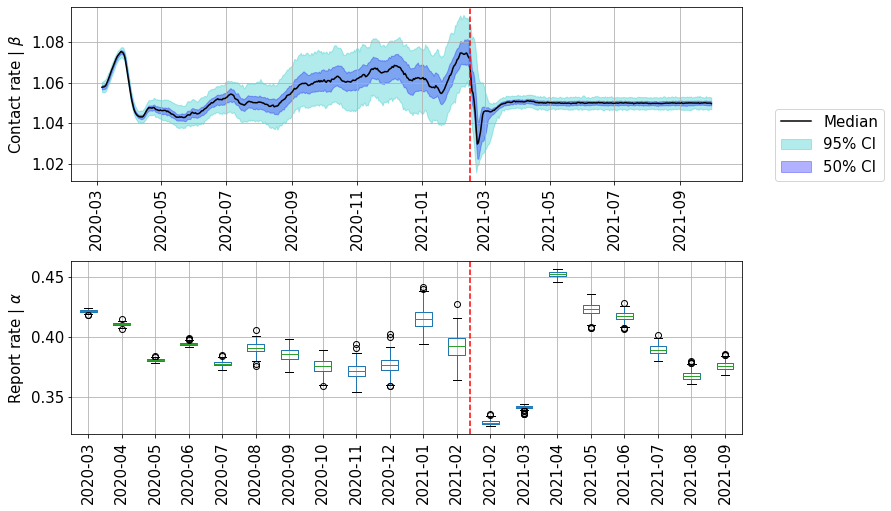

In [15]:

plt.rcParams.update({'axes.facecolor':'white'})
df_beta  = create_df_response(beta_time, time=num_steps, dates =dates_assimilation)
df_betaV  = create_df_response(beta_timeV, time=num_stepsV, dates =dates_assimilationV)
df_alpha = create_df_response(alpha_time, time=num_steps, dates =dates_assimilation)
df_alphaV = create_df_response(alpha_timeV, time=num_stepsV, dates =dates_assimilationV)

fig, ax = plt.subplots(2, 1, figsize=(12.5, 7.2), sharex=False)
ax[0].plot(df_beta.index.values, df_beta["median"], color='k', label='Median')
ax[0].fill_between(df_beta.index.values, df_beta["high_95"], df_beta["low_95"], color='c', alpha=0.3, label='95% CI')
ax[0].fill_between(df_beta.index.values, df_beta["high_50"], df_beta["low_50"], color='b', alpha=0.3, label='50% CI')

ax[0].plot(df_betaV.index.values, df_betaV["median"], color='k')#, label='Median')
ax[0].fill_between(df_betaV.index.values, df_betaV["high_95"], df_betaV["low_95"], color='c', alpha=0.3)#, label='95% CI')
ax[0].fill_between(df_betaV.index.values, df_betaV["high_50"], df_betaV["low_50"], color='b', alpha=0.3)#, label='50% CI')

# ax[1].plot(df_alpha.index.values, df_alpha["median"], color='k', label='Median')
# ax[1].fill_between(df_alpha.index.values, df_alpha["high_95"], df_alpha["low_95"], color='c', alpha=0.3, label='95% CI')
# ax[1].fill_between(df_alpha.index.values, df_alpha["high_50"], df_alpha["low_50"], color='b', alpha=0.3, label='50% CI')

# ax[1].plot(df_alphaV.index.values, df_alphaV["median"], color='k')#, label='Median')
# ax[1].fill_between(df_alphaV.index.values, df_]alphaV["high_95"], df_alphaV["low_95"], color='c', alpha=0.3)#, label='95% CI')
# ax[1].fill_between(df_alphaV.index.values, df_alphaV["high_50"], df_alphaV["low_50"], color='b', alpha=0.3)#, label='50% CI')

a=df_F.T.boxplot(rot=90, ax=ax[1])
ax[1].axvline(12.4, linestyle='--', color='r')

ax[0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0].tick_params( which='both', axis='y', labelsize=15)
ax[1].tick_params( which='both', axis='y', labelsize=15)
ax[0].set_ylabel(r"Contact rate | $\beta$ ", fontsize=15)
ax[0].grid()
# ax[1].get_xaxis().set_visible(False)
ax[0].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')

ax[1].set_ylabel(r"Report rate | $\alpha$", fontsize=15)
# handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(fontsize=15, loc=[1.05,0])
# ax[1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
plt.tight_layout()
plt.show()

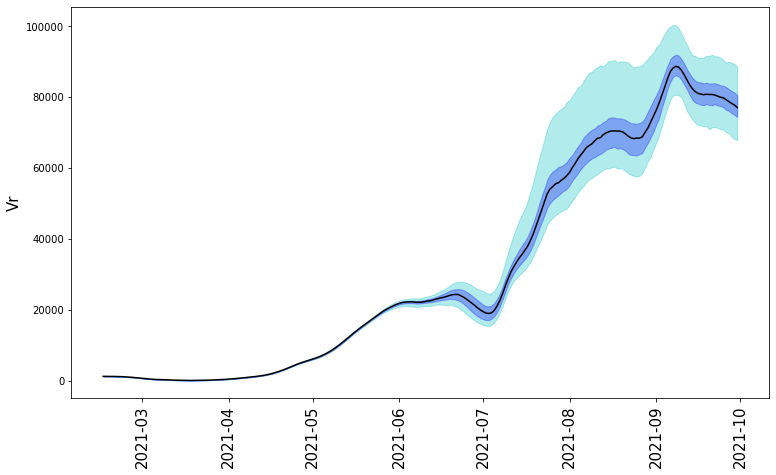

In [16]:

plt.rcParams.update({'axes.facecolor':'white'})
df_Vr  = create_df_response(Vr_timeV, time=num_stepsV, dates =dates_assimilationV)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2), sharex=False)
ax.plot(df_Vr.index.values, df_Vr["median"], color='k', label='Median')
ax.fill_between(df_Vr.index.values, df_Vr["high_95"], df_Vr["low_95"], color='c', alpha=0.3, label='95% CI')
ax.fill_between(df_Vr.index.values, df_Vr["high_50"], df_Vr["low_50"], color='b', alpha=0.3, label='50% CI')

ax.set_ylabel(r"Vr", fontsize=15)
ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)

In [8]:
x_post_all = samples['x_posterior']
x_post_allV = samplesV['x_posterior']
x_post_allV.shape

(16, 200, 255, 4)

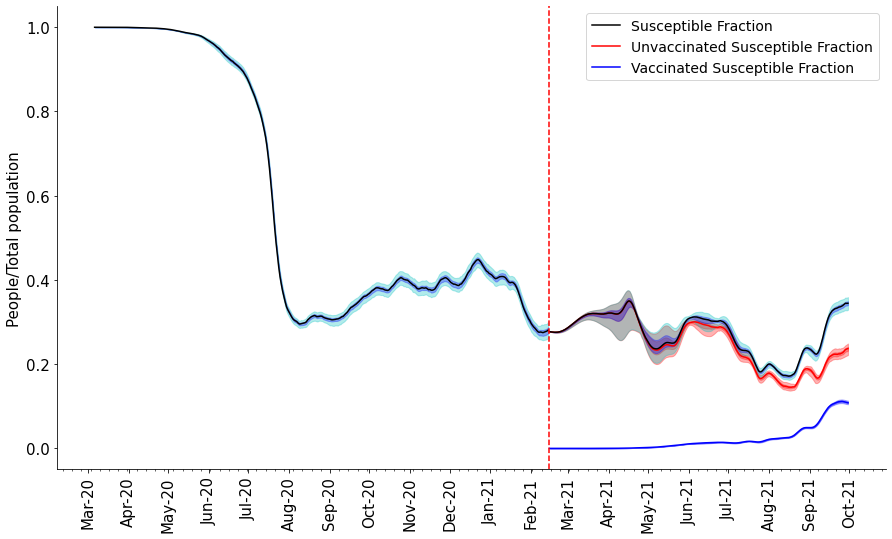

In [18]:

plt.rcParams.update({'axes.facecolor':'white'})
S_time = np.mean(x_post_all[0,:,:,:], -1)
R_time = np.mean(x_post_all[5,:,:,:], -1)
S_timeV = np.mean(x_post_allV[0,:,:228,:], -1)
R_timeV = np.mean(x_post_allV[5,:,:228,:], -1)
SV_timeV = np.mean(x_post_allV[8,:,:228,:], -1)
RV_timeV = np.mean(x_post_allV[13,:,:228,:], -1)
S_Time = S_timeV+SV_timeV
R_Time = R_timeV+RV_timeV
T_Time = S_Time + R_Time

df_S  = create_df_response(S_time, time=num_steps, dates =dates_assimilation)
df_R  = create_df_response(R_time, time=num_steps, dates =dates_assimilation)
df_SV  = create_df_response(S_timeV, time=num_stepsV, dates =dates_assimilationV)
df_RV  = create_df_response(R_timeV, time=num_stepsV, dates =dates_assimilationV)
df_SVV  = create_df_response(SV_timeV, time=num_stepsV, dates =dates_assimilationV)
df_RVV  = create_df_response(RV_timeV, time=num_stepsV, dates =dates_assimilationV)
df_ST  = create_df_response(S_Time, time=num_stepsV, dates =dates_assimilationV)
df_RT  = create_df_response(R_Time, time=num_stepsV, dates =dates_assimilationV)
df_T  = create_df_response(T_Time, time=num_stepsV, dates =dates_assimilationV)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.6))

ax.plot(df_S.index.values, df_S["median"]/pop, color='k', label='Susceptible Fraction')
ax.fill_between(df_S.index.values, df_S["high_95"]/pop, df_S["low_95"]/pop, color='c', alpha=0.3)#, label='95% CI')
ax.fill_between(df_S.index.values, df_S["high_50"]/pop, df_S["low_50"]/pop, color='b', alpha=0.3)#, label='50% CI')

ax.plot(df_SV.index.values, df_SV["median"]/pop, color='r', label='Unvaccinated Susceptible Fraction')
ax.fill_between(df_SV.index.values, df_SV["high_95"]/pop, df_SV["low_95"]/pop, color='r', alpha=0.3)#, label='95% CI')
ax.fill_between(df_SV.index.values, df_SV["high_50"]/pop, df_SV["low_50"]/pop, color='r', alpha=0.3)#, label='50% CI')

ax.plot(df_SVV.index.values, df_SVV["median"]/pop, color='b', label='Vaccinated Susceptible Fraction')
ax.fill_between(df_SVV.index.values, df_SVV["high_95"]/pop, df_SVV["low_95"]/pop, color='b', alpha=0.3)#, label='95% CI')
ax.fill_between(df_SVV.index.values, df_SVV["high_50"]/pop, df_SVV["low_50"]/pop, color='b', alpha=0.3)#, label='50% CI'))

ax.plot(df_ST.index.values, df_ST["median"]/pop, color='k')#, label='Fracción Susceptibles')
ax.fill_between(df_ST.index.values, df_ST["high_95"]/pop, df_ST["low_95"]/pop, color='c', alpha=0.3)#, label='95% CI')
ax.fill_between(df_ST.index.values, df_ST["high_50"]/pop, df_ST["low_50"]/pop, color='b', alpha=0.3)#, label='50% CI')



#sns.barplot(data=df_response, x='date', y='valuye')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
ax.tick_params( which='both', axis='both', labelsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax.set_ylabel("People/Total population", fontsize=15)
ax.axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
plt.legend(fontsize=14, loc='best')#(1.04,0.35))
plt.tight_layout()

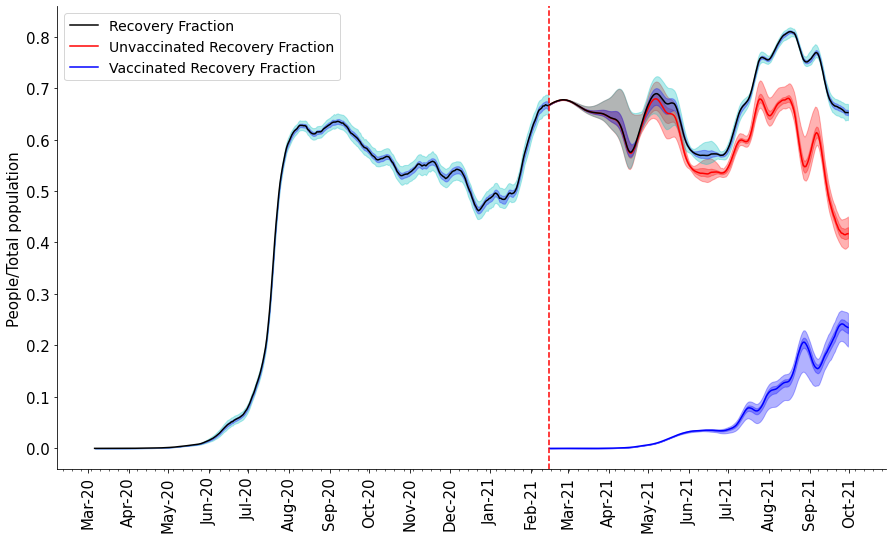

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.6))

ax.plot(df_R.index.values, df_R["median"]/pop, color='k', label='Recovery Fraction')
ax.fill_between(df_R.index.values, df_R["high_95"]/pop, df_R["low_95"]/pop, color='c', alpha=0.3)#, label='95% CI')
ax.fill_between(df_R.index.values, df_R["high_50"]/pop, df_R["low_50"]/pop, color='b', alpha=0.3)#, label='50% CI')

ax.plot(df_RV.index.values, df_RV["median"]/pop, color='r', label='Unvaccinated Recovery Fraction')
ax.fill_between(df_RV.index.values, df_RV["high_95"]/pop, df_RV["low_95"]/pop, color='r', alpha=0.3)#, label='95% CI')
ax.fill_between(df_RV.index.values, df_RV["high_50"]/pop, df_RV["low_50"]/pop, color='r', alpha=0.3)#, label='50% CI')

ax.plot(df_RVV.index.values, df_RVV["median"]/pop, color='b', label='Vaccinated Recovery Fraction')
ax.fill_between(df_RVV.index.values, df_RVV["high_95"]/pop, df_RVV["low_95"]/pop, color='b', alpha=0.3)#, label='95% CI')
ax.fill_between(df_RVV.index.values, df_RVV["high_50"]/pop, df_RVV["low_50"]/pop, color='b', alpha=0.3)#, label='50% CI'))

ax.plot(df_RT.index.values, df_RT["median"]/pop, color='k')#, label='Fracción Susceptibles')
ax.fill_between(df_RT.index.values, df_RT["high_95"]/pop, df_RT["low_95"]/pop, color='c', alpha=0.3)#, label='95% CI')
ax.fill_between(df_RT.index.values, df_RT["high_50"]/pop, df_RT["low_50"]/pop, color='b', alpha=0.3)#, label='50% CI')



#sns.barplot(data=df_response, x='date', y='valuye')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
ax.tick_params( which='both', axis='both', labelsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax.set_ylabel("People/Total population", fontsize=15)
ax.axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
plt.legend(fontsize=14, loc='best')#(1.04,0.35))
plt.tight_layout()

In [9]:
obs_all = samples['obs_posterior']
obs_allV = samplesV['obs_posterior']
obs_allV.shape

(4, 200, 255, 4)

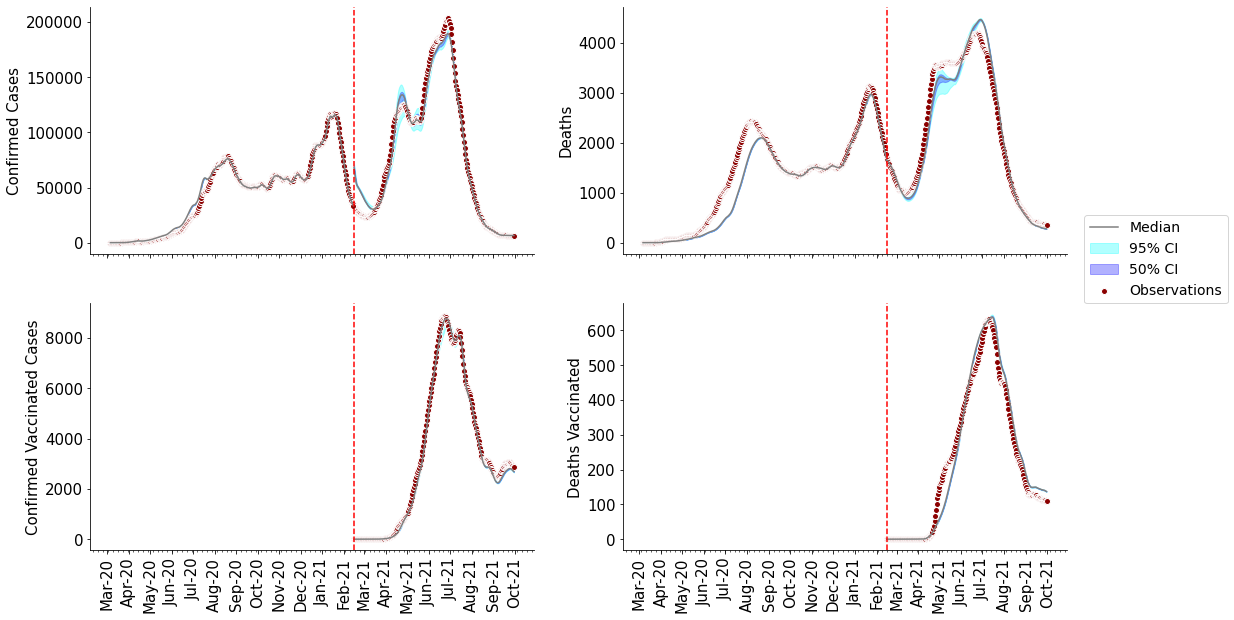

In [21]:
confirmed_post_all   = np.mean(obs_all[0,:,:,:],-1)
deaths_post_all      = np.mean(obs_all[1,:,:,:],-1)
confirmed_post_allV  = np.mean(obs_allV[0,:,:228,:],-1)
deaths_post_allV     = np.mean(obs_allV[1,:,:228,:],-1)
confirmedVV_post_all = np.mean(obs_allV[2,:,:228,:],-1)
deathsVV_post_all    = np.mean(obs_allV[3,:,:228,:],-1)
D_Time = deaths_post_allV+deathsVV_post_all
C_Time = confirmed_post_allV+confirmedVV_post_all


df_confirmed   = create_df_response(confirmed_post_all, time=num_steps, dates =dates_assimilation)
df_deaths      = create_df_response(deaths_post_all, time=num_steps, dates =dates_assimilation)
df_confirmedV  = create_df_response(confirmed_post_allV, time=num_stepsV, dates =dates_assimilationV)
df_deathsV     = create_df_response(deaths_post_allV, time=num_stepsV, dates =dates_assimilationV)
df_confirmedVV = create_df_response(confirmedVV_post_all, time=num_stepsV, dates =dates_assimilationV)
df_deathsVV    = create_df_response(deathsVV_post_all, time=num_stepsV, dates =dates_assimilationV)
df_D    = create_df_response(D_Time, time=num_stepsV, dates =dates_assimilationV)
df_C    = create_df_response(C_Time, time=num_stepsV, dates =dates_assimilationV)


fig, ax = plt.subplots(2, 2, figsize=(17.5, 10), sharex=True)

ax[0,0].plot(df_confirmedV.index.values, df_confirmedV["median"], color='gray')#, label='Median')
ax[0,0].fill_between(df_confirmedV.index.values, df_confirmedV["high_95"], df_confirmedV["low_95"], color='cyan', alpha=0.3)#, label='95% CI')
ax[0,0].fill_between(df_confirmedV.index.values, df_confirmedV["high_50"], df_confirmedV["low_50"], color='blue', alpha=0.3)#, label='50% CI')
ax[0,0].scatter(obs_dfV.index.values, obs_dfV["smoothed_I_NV+PD"], edgecolors="w", facecolor="darkred")

ax[0,0].plot(df_confirmed.index.values, df_confirmed["median"], color='gray')#, label='Median')
ax[0,0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='cyan', alpha=0.3)#, label='95% CI')
ax[0,0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='blue', alpha=0.3)#, label='50% CI')
ax[0,0].scatter(obs_df.index.values, obs_df["smoothed_InfectadosNoVacunados"], edgecolors="w", facecolor="darkred")

ax[0,1].plot(df_deathsV.index.values, df_deathsV["median"], color='gray', label='Median')
ax[0,1].fill_between(df_deathsV.index.values, df_deathsV["high_95"], df_deathsV["low_95"], color='cyan', alpha=0.3)#, label='95% CI')
ax[0,1].fill_between(df_deathsV.index.values, df_deathsV["high_50"], df_deathsV["low_50"], color='blue', alpha=0.3)#, label='50% CI')
ax[0,1].scatter(obs_dfV.index.values, obs_dfV["smoothed_M_NV+PD"], edgecolors="w", facecolor="darkred")

ax[0,1].plot(df_deaths.index.values, df_deaths["median"], color='gray')#, label='Median')
ax[0,1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='cyan', alpha=0.3)#, label='95% CI')
ax[0,1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='blue', alpha=0.3)#, label='50% CI')
ax[0,1].scatter(obs_df.index.values, obs_df["smoothed_MuertesNoVacunados"], edgecolors="w", facecolor="darkred")

ax[1,0].plot(df_confirmedVV.index.values, df_confirmedVV["median"], color='gray')#, label='Median')
ax[1,0].fill_between(df_confirmedVV.index.values, df_confirmedVV["high_95"], df_confirmedVV["low_95"], color='cyan', alpha=0.3)#, label='95% CI')
ax[1,0].fill_between(df_confirmedVV.index.values, df_confirmedVV["high_50"], df_confirmedVV["low_50"], color='blue', alpha=0.3)#, label='50% CI')
ax[1,0].scatter(obs_dfV.index.values, obs_dfV["smoothed_InfectadosEsquemaCompleto"], edgecolors="w", facecolor="darkred")

ax[1,1].plot(df_deathsVV.index.values, df_deathsVV["median"], color='gray', label='Median')
ax[1,1].fill_between(df_deathsVV.index.values, df_deathsVV["high_95"], df_deathsVV["low_95"], color='cyan', alpha=0.3, label='95% CI')
ax[1,1].fill_between(df_deathsVV.index.values, df_deathsVV["high_50"], df_deathsVV["low_50"], color='blue', alpha=0.3, label='50% CI')
ax[1,1].scatter(obs_dfV.index.values, obs_dfV["smoothed_MuertesEsquemaCompleto"], edgecolors="w", facecolor="darkred", label='Observations')

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0,0].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[0,1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[1,0].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[1,1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[0,0].set_ylabel("Confirmed Cases", fontsize=15)
ax[0,1].set_ylabel("Deaths", fontsize=15)
ax[1,0].set_ylabel("Confirmed Vaccinated Cases", fontsize=15)
ax[1,1].set_ylabel("Deaths Vaccinated", fontsize=15)
ax[1,1].legend(fontsize=14, loc=(1.04,1))

plt.show()

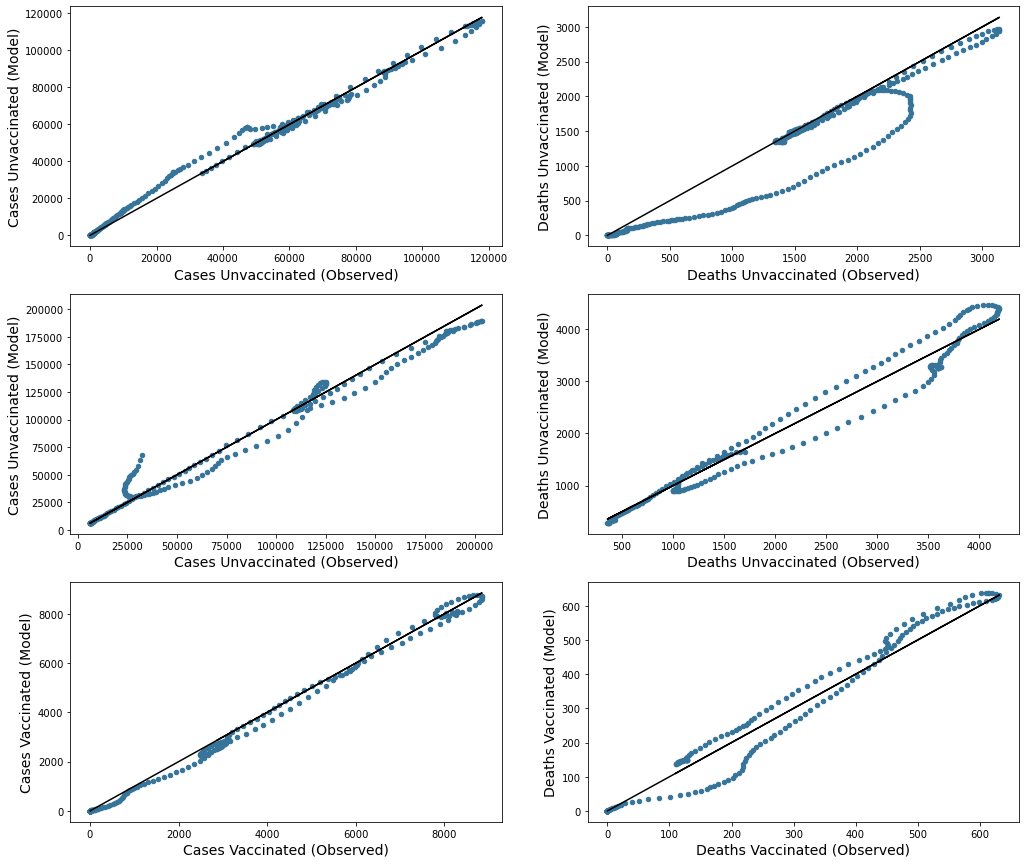

In [22]:
df_confirmed['Obs']=obs_df.reset_index().set_index('Dates')['smoothed_I_NV+PD']
df_deaths['Obs']=obs_df.reset_index().set_index('Dates')['smoothed_M_NV+PD']
df_confirmedV['Obs']=obs_dfV.reset_index().set_index('Dates')['smoothed_I_NV+PD']
df_deathsV['Obs']=obs_dfV.reset_index().set_index('Dates')['smoothed_M_NV+PD']
df_confirmedVV['Obs']=obs_dfV.reset_index().set_index('Dates')['smoothed_InfectadosEsquemaCompleto']
df_deathsVV['Obs']=obs_dfV.reset_index().set_index('Dates')['smoothed_MuertesEsquemaCompleto']
fig, ax = plt.subplots(3,2,figsize=[17,15])
ax[0,0].scatter(df_confirmed['Obs'], df_confirmed['median'], color = '#367499', s=20)#, edgecolors='k')
ax[0,0].plot(df_confirmed['Obs'], df_confirmed['Obs'], color='k')
ax[0,1].scatter(df_deaths['Obs'], df_deaths['median'], color = '#367499', s=20)
ax[0,1].plot(df_deaths['Obs'], df_deaths['Obs'], color='k')

ax[1,0].scatter(df_confirmedV['Obs'], df_confirmedV['median'], color = '#367499', s=20)#, edgecolors='k')
ax[1,0].plot(df_confirmedV['Obs'], df_confirmedV['Obs'], color='k')
ax[1,1].scatter(df_deathsV['Obs'], df_deathsV['median'], color = '#367499', s=20)
ax[1,1].plot(df_deathsV['Obs'], df_deathsV['Obs'], color='k')

ax[2,0].scatter(df_confirmedVV['Obs'], df_confirmedVV['median'], color = '#367499', s=20)#, edgecolors='k')
ax[2,0].plot(df_confirmedVV['Obs'], df_confirmedVV['Obs'], color='k')
ax[2,1].scatter(df_deathsVV['Obs'], df_deathsVV['median'], color = '#367499', s=20)
ax[2,1].plot(df_deathsVV['Obs'], df_deathsVV['Obs'], color='k')

ax[0,0].set_xlabel('Cases Unvaccinated (Observed)', fontsize=14)
ax[0,0].set_ylabel('Cases Unvaccinated (Model)', fontsize=14)
ax[0,1].set_xlabel('Deaths Unvaccinated (Observed)', fontsize=14)
ax[0,1].set_ylabel('Deaths Unvaccinated (Model)', fontsize=14)

ax[1,0].set_xlabel('Cases Unvaccinated (Observed)', fontsize=14)
ax[1,0].set_ylabel('Cases Unvaccinated (Model)', fontsize=14)
ax[1,1].set_xlabel('Deaths Unvaccinated (Observed)', fontsize=14)
ax[1,1].set_ylabel('Deaths Unvaccinated (Model)', fontsize=14)

ax[2,0].set_xlabel('Cases Vaccinated (Observed)', fontsize=14)
ax[2,0].set_ylabel('Cases Vaccinated (Model)', fontsize=14)
ax[2,1].set_xlabel('Deaths Vaccinated (Observed)', fontsize=14)
ax[2,1].set_ylabel('Deaths Vaccinated (Model)', fontsize=14)
# ax[1].legend()
plt.show()

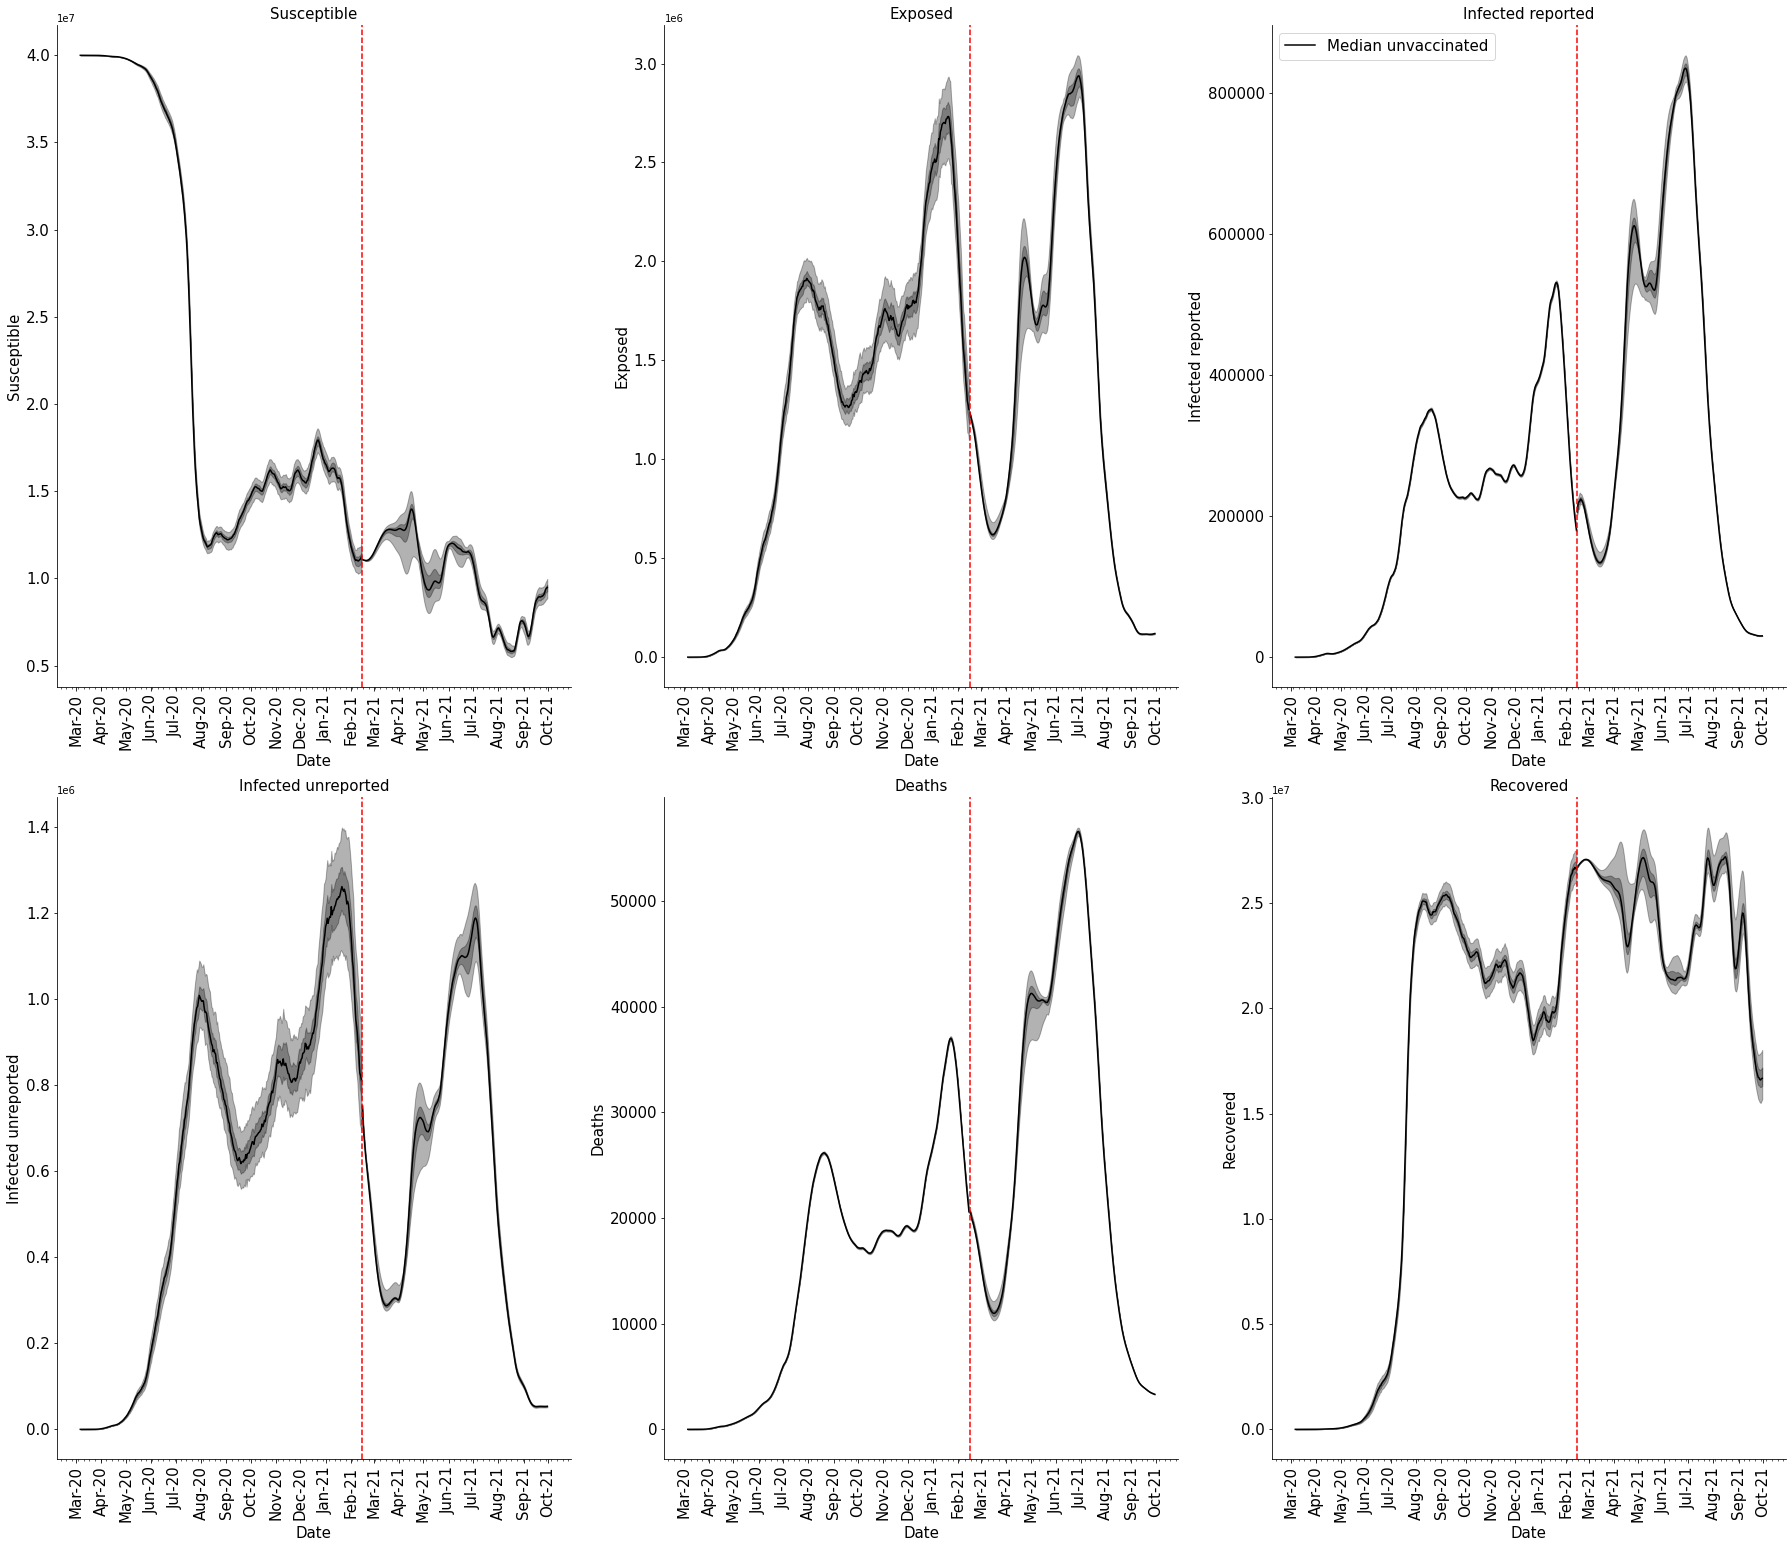

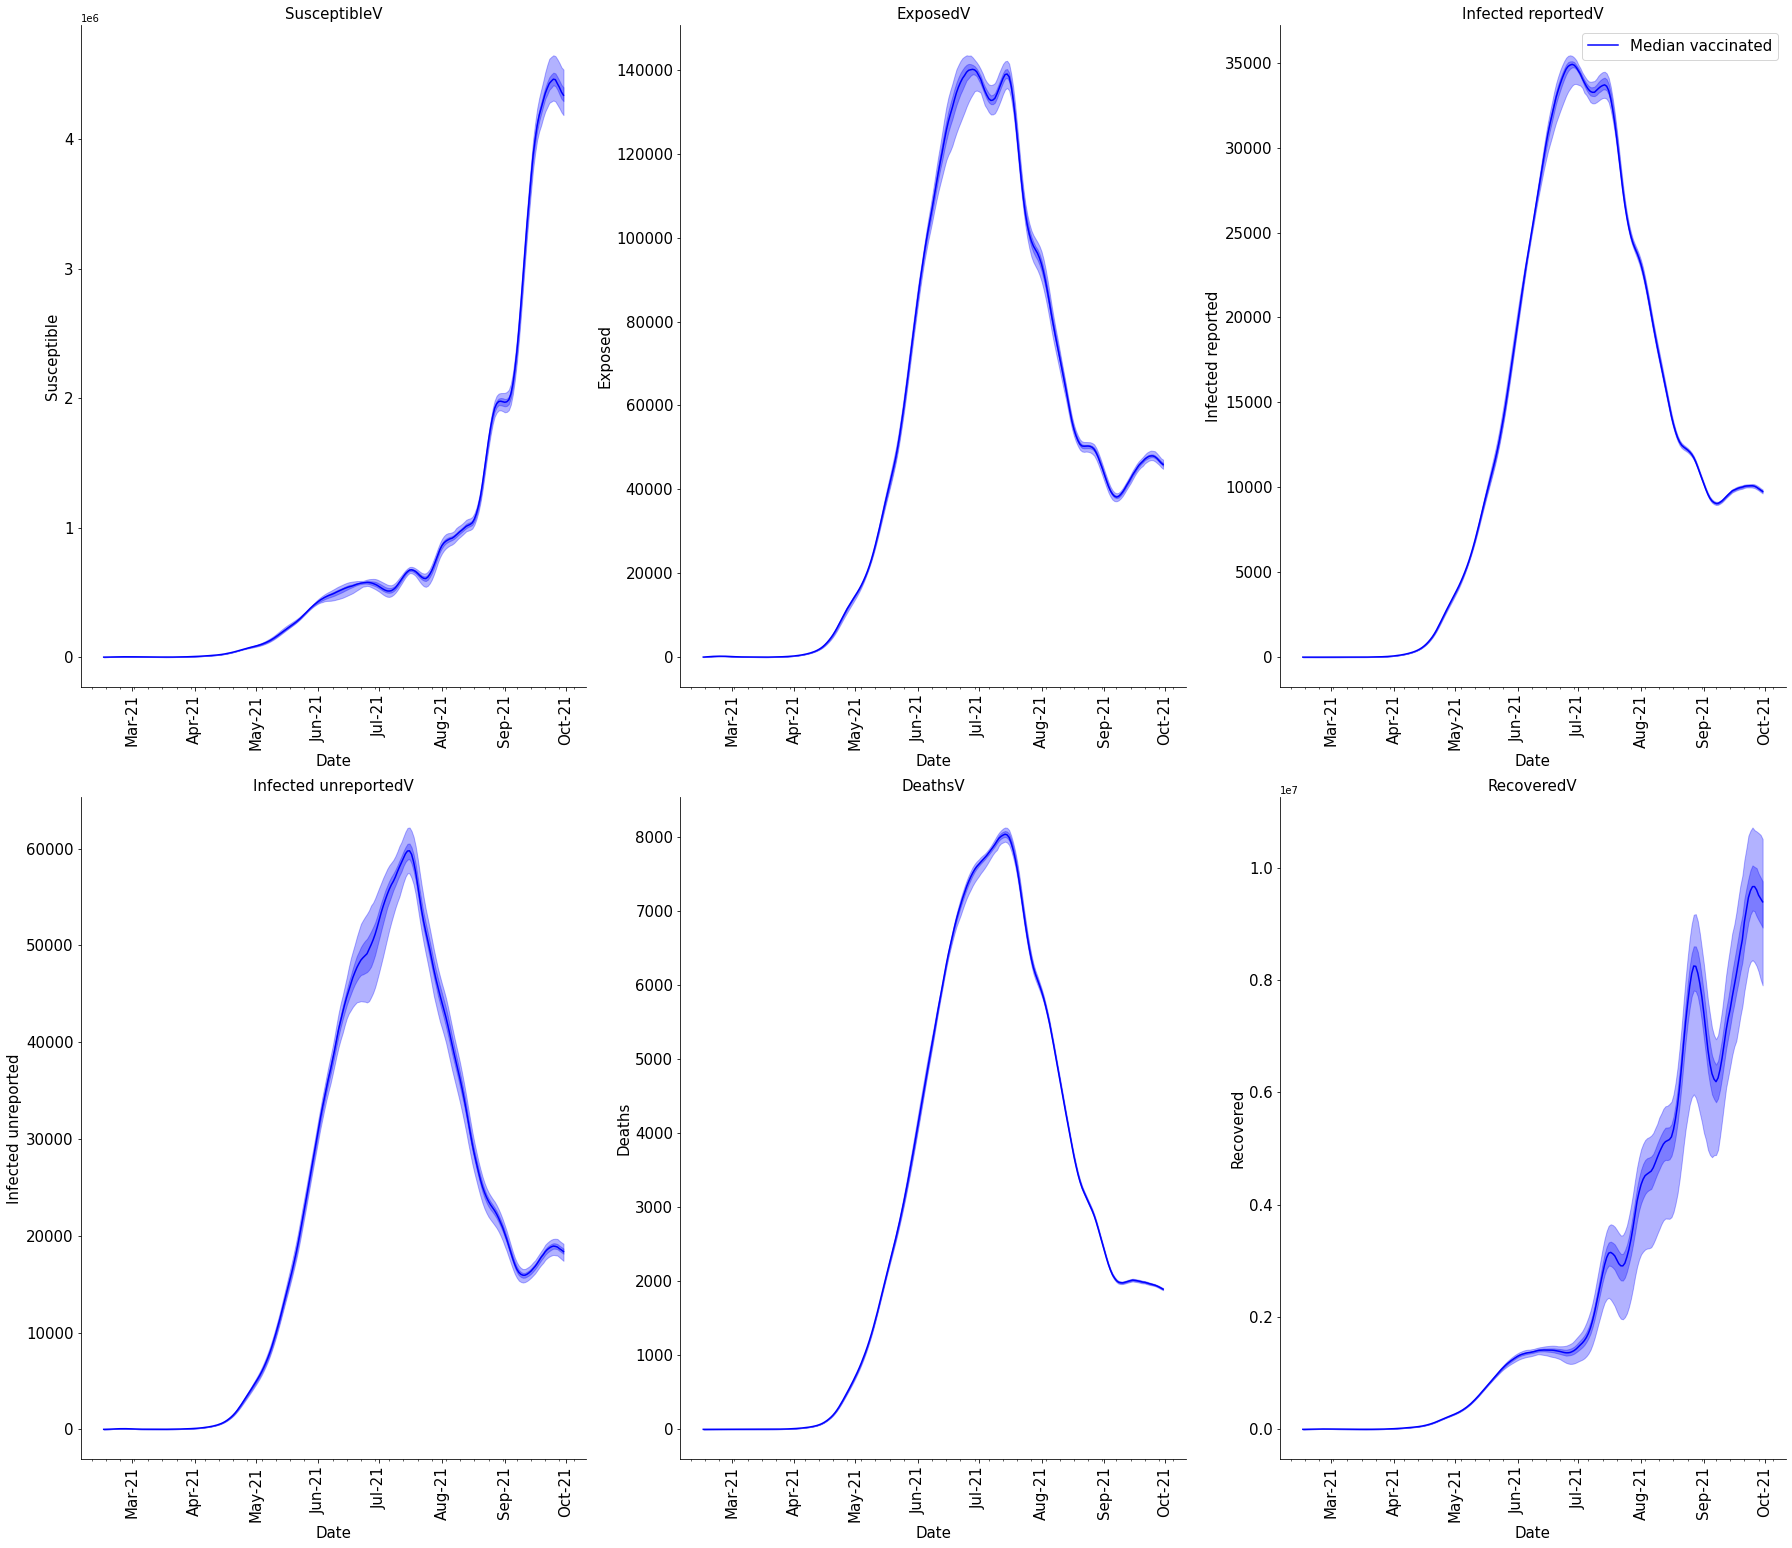

In [23]:
plt.rcParams.update({'axes.facecolor':'white'})
S_time = np.mean(x_post_all[0,:,:,:6], -1)
E_time = np.mean(x_post_all[1,:,:,:6], -1)
Ir_time = np.mean(x_post_all[2,:,:,:6], -1)
Iu_time = np.mean(x_post_all[3,:,:,:6], -1)
Ih_time = np.mean(x_post_all[4,:,:,:6], -1)
R_time = np.mean(x_post_all[5,:,:,:6], -1)
# H_time = np.mean(x_post_all[6,:,:,:6], -1)
C_time = np.mean(x_post_all[6,:,:,:6], -1)
D_time = np.mean(x_post_all[7,:,:,:6], -1)

df_S  = create_df_response(S_time, time=num_steps, dates =dates_assimilation)
df_E  = create_df_response(E_time, time=num_steps, dates =dates_assimilation)
df_Ir  = create_df_response(Ir_time, time=num_steps, dates =dates_assimilation)
df_Iu  = create_df_response(Iu_time, time=num_steps, dates =dates_assimilation)
df_Ih  = create_df_response(Ih_time, time=num_steps, dates =dates_assimilation)
df_R  = create_df_response(R_time, time=num_steps, dates =dates_assimilation)
# df_H  = create_df_response(H_time, time=num_steps, dates =dates_assimilation)
df_C  = create_df_response(C_time, time=num_steps, dates =dates_assimilation)
df_D  = create_df_response(D_time, time=num_steps, dates =dates_assimilation)

#---------------------------------------------------------------

fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='k')#, label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("Susceptible", fontsize=15)
# ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='k')#, label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("Exposed", fontsize=15)
# ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='k', label='Median unvaccinated')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='k', alpha=0.3)#)#, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='k', alpha=0.3)#)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reported", fontsize=15)
ax[0,2].legend(fontsize=15, loc='best')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='k')#, label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreported", fontsize=15)
# ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='k')#, label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Deaths", fontsize=15)
ax[1,1].set_title("Deaths", fontsize=15)
# ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='k')#, label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("Recovered", fontsize=15)
# ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

S_time = np.mean(x_post_allV[0,:,:228,:6], -1)
E_time = np.mean(x_post_allV[1,:,:228,:6], -1)
Ir_time = np.mean(x_post_allV[2,:,:228,:6], -1)
Iu_time = np.mean(x_post_allV[3,:,:228,:6], -1)
Ih_time = np.mean(x_post_allV[4,:,:228,:6], -1)
R_time = np.mean(x_post_allV[5,:,:228,:6], -1)
# H_time = np.mean(x_post_allV[6,:,:228,:6], -1)
C_time = np.mean(x_post_allV[6,:,:228,:6], -1)
D_time = np.mean(x_post_allV[7,:,:228,:6], -1)

df_S  = create_df_response(S_time, time=num_stepsV, dates =dates_assimilationV)
df_E  = create_df_response(E_time, time=num_stepsV, dates =dates_assimilationV)
df_Ir  = create_df_response(Ir_time, time=num_stepsV, dates =dates_assimilationV)
df_Iu  = create_df_response(Iu_time, time=num_stepsV, dates =dates_assimilationV)
df_Ih  = create_df_response(Ih_time, time=num_stepsV, dates =dates_assimilationV)
df_R  = create_df_response(R_time, time=num_stepsV, dates =dates_assimilationV)
df_H  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_C  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_D  = create_df_response(D_time, time=num_stepsV, dates =dates_assimilationV)

#---------------------------------------------------------------

# fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='k')#, label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("Susceptible", fontsize=15)
# ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='k')#, label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("Exposed", fontsize=15)
# ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='k')#, label='Median')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reported", fontsize=15)
# ax[0,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='k')#, label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreported", fontsize=15)
# ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='k')#, label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Deaths", fontsize=15)
ax[1,1].set_title("Deaths", fontsize=15)
# ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='k')#, label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='k', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("Recovered", fontsize=15)
# ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

ax[0,0].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[0,1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[1,0].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[1,1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[0,2].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')
ax[1,2].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')

S_time = np.mean(x_post_allV[8,:,:228,:6], -1)
E_time = np.mean(x_post_allV[9,:,:228,:6], -1)
Ir_time = np.mean(x_post_allV[10,:,:228,:6], -1)
Iu_time = np.mean(x_post_allV[11,:,:228,:6], -1)
Ih_time = np.mean(x_post_allV[12,:,:228,:6], -1)
R_time = np.mean(x_post_allV[13,:,:228,:6], -1)
# H_time = np.mean(x_post_allV[15,:,:228,:6], -1)
C_time = np.mean(x_post_allV[14,:,:228,:6], -1)
D_time = np.mean(x_post_allV[15,:,:228,:6], -1)

df_S  = create_df_response(S_time, time=num_stepsV, dates =dates_assimilationV)
df_E  = create_df_response(E_time, time=num_stepsV, dates =dates_assimilationV)
df_Ir  = create_df_response(Ir_time, time=num_stepsV, dates =dates_assimilationV)
df_Iu  = create_df_response(Iu_time, time=num_stepsV, dates =dates_assimilationV)
df_Ih  = create_df_response(Ih_time, time=num_stepsV, dates =dates_assimilationV)
df_R  = create_df_response(R_time, time=num_stepsV, dates =dates_assimilationV)
df_H  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_C  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_D  = create_df_response(D_time, time=num_stepsV, dates =dates_assimilationV)

#---------------------------------------------------------------

fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='b')#, label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='b', alpha=0.3)#, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='b', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("SusceptibleV", fontsize=15)
# ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='b')#, label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='b', alpha=0.3)#, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='b', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("ExposedV", fontsize=15)
# ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='b', label='Median vaccinated')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='b', alpha=0.3)#)#, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='b', alpha=0.3)#)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reportedV", fontsize=15)
ax[0,2].legend(fontsize=15, loc='best')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='b')#, label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='b', alpha=0.3)#, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='b', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreportedV", fontsize=15)
# ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='b')#, label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='b', alpha=0.3)#, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='b', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Deaths", fontsize=15)
ax[1,1].set_title("DeathsV", fontsize=15)
# ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='b')#, label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='b', alpha=0.3)#, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='b', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("RecoveredV", fontsize=15)
# ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

In [21]:
E_time = np.mean(np.sum(x_post_allV[8:,:,:228,:6],0), -1)

df_T  = create_df_response(E_time, time=num_stepsV, dates =dates_assimilationV)

In [22]:
df_T

mean        median            std        low_50  \
date                                                                  
2021-02-15  1.230468e+03  1.230502e+03       2.105644  1.229146e+03   
2021-02-16  2.459777e+03  2.459793e+03       4.328462  2.457103e+03   
2021-02-17  3.682073e+03  3.682259e+03       6.963420  3.677277e+03   
2021-02-18  4.891670e+03  4.891634e+03      10.018343  4.885850e+03   
2021-02-19  6.081925e+03  6.081502e+03      13.657576  6.073752e+03   
...                  ...           ...            ...           ...   
2021-09-26  1.909881e+07  1.908736e+07  767212.787351  1.864629e+07   
2021-09-27  1.851063e+07  1.850097e+07  758247.115160  1.805626e+07   
2021-09-28  1.788673e+07  1.788032e+07  748002.497361  1.744425e+07   
2021-09-29  1.733660e+07  1.731245e+07  738040.213484  1.691969e+07   
2021-09-30  1.689796e+07  1.689921e+07  730900.432421  1.647201e+07   

                 high_50        low_80       high_80        low_95  \
date                                                                 
2021-02-15  1.231622e+03  1.227836e+03  1.232914e+03  1.226098e+03   
2021-02-16  2.462504e+03  2.454626e+03  2.465495e+03  2.450940e+03   
2021-02-17  3.686603e+03  3.673256e+03  3.691527e+03  3.668047e+03   
2021-02-18  4.898995e+03  4.878085e+03  4.904257e+03  4.871026e+03   
2021-02-19  6.090278e+03  6.064256e+03  6.099907e+03  6.053531e+03   
...                  ...           ...           ...           ...   
2021-09-26  1.957551e+07  1.811832e+07  2.014491e+07  1.752593e+07   
2021-09-27  1.898368e+07  1.750610e+07  1.957359e+07  1.701031e+07   
2021-09-28  1.836845e+07  1.687112e+07  1.893939e+07  1.644582e+07   
2021-09-29  1.779565e+07  1.633681e+07  1.835665e+07  1.595292e+07   
2021-09-30  1.735433e+07  1.594752e+07  1.791204e+07  1.560292e+07   

                 high_95      type  
date                                
2021-02-15  1.235176e+03  estimate  
2021-02-16  2.469053e+03  estimate  
2021-02-17  3.695576e+03  estimate  
2021-02-18  4.911326e+03  estimate  
2021-02-19  6.109093e+03  estimate  
...                  ...       ...  
2021-09-26  2.046198e+07  estimate  
2021-09-27  1.989131e+07  estimate  
2021-09-28  1.928427e+07  estimate  
2021-09-29  1.873103e+07  estimate  
2021-09-30  1.830305e+07  estimate  

[228 rows x 10 columns]

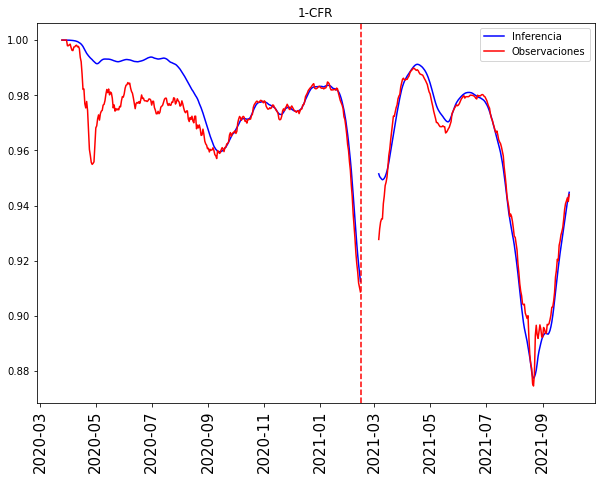

In [10]:
D_To = np.array((obs_df['MuertesNoVacunados']).groupby('Dates').sum())[:-19]
C_To = np.array((obs_df['InfectadosNoVacunados']).groupby('Dates').sum())[19:]
y1 = 1-(D_To/C_To)
D_ToV = np.array((obs_dfV['M_NV+PD']+obs_dfV['MuertesEsquemaCompleto']).groupby('Dates').sum())[:-19]
C_ToV = np.array((obs_dfV['I_NV+PD']+obs_dfV['InfectadosEsquemaCompleto']).groupby('Dates').sum())[19:]
y1V = 1-(D_ToV/C_ToV)
dat=np.unique(obs_df.index.get_level_values(0))[19:]
datV=np.unique(obs_dfV.index.get_level_values(0))[19:]
fig, ax = plt.subplots(figsize=[10,7])
D_T = np.median(np.mean(x_post_all[7,:,:-19,:], -1),0)
C_T = np.median(np.mean(x_post_all[6,:,19:,:], -1),0)
y = 1-(D_T/C_T)
D_TV = np.median(np.mean(x_post_allV[15,:,:228-19,:], -1),0)+np.median(np.sum(x_post_allV[7,:,:228-19,:], -1),0)
C_TV = np.median(np.mean(x_post_allV[14,:,19:228,:], -1),0)+np.median(np.sum(x_post_allV[6,:,19:228,:], -1),0)
yV = 1-(D_TV/C_TV)
plt.plot(dat,y,'b', label='Inferencia')
plt.plot(dat,y1,'r', label='Observaciones')
plt.plot(datV,yV, 'b')
plt.plot(datV,y1V,'r')
plt.legend()
plt.title("1-CFR")
ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax.axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')

<ipython-input-26-f8d3c39b07c2>:3: RuntimeWarning: invalid value encountered in true_divide
  y1 = (D_To/C_To)


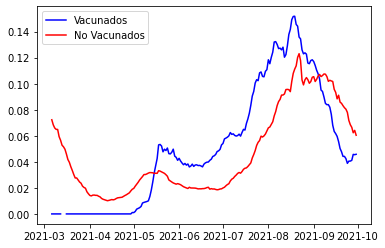

In [26]:
D_To = np.array((obs_dfV['MuertesEsquemaCompleto']).groupby('Dates').sum())[:-19]
C_To = np.array((obs_dfV['InfectadosEsquemaCompleto']).groupby('Dates').sum())[19:]
y1 = (D_To/C_To)
D_ToV = np.array((obs_dfV['M_NV+PD']).groupby('Dates').sum())[:-19]
C_ToV = np.array((obs_dfV['I_NV+PD']).groupby('Dates').sum())[19:]
y1V = (D_ToV/C_ToV)

plt.plot(datV,y1,'b', label='Vacunados')
plt.plot(datV,y1V,'r', label='No Vacunados')
plt.legend()

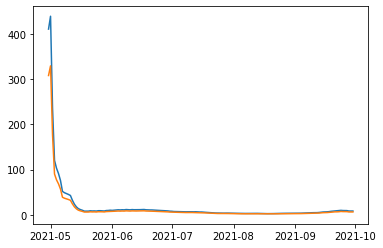

In [43]:
D_To = np.array((obs_df['MuertesNoVacunados']).groupby('Dates').sum())[:-19]
C_To = np.array((obs_df['InfectadosNoVacunados']).groupby('Dates').sum())[19:]

D_ToV = np.array((obs_dfV['MuertesEsquemaCompleto']).groupby('Dates').sum())[:-19]
C_ToV = np.array((obs_dfV['InfectadosEsquemaCompleto']).groupby('Dates').sum())[19:]

D_ToVV = np.array((obs_dfV['M_NV+PD']).groupby('Dates').sum())[:-19]
C_ToVV = np.array((obs_dfV['I_NV+PD']).groupby('Dates').sum())[19:]

IFR = (C_ToV*(df_alphaV['mean'][19:]))/D_ToV
IFRV = IFR*(1-0.25)
plt.plot(IFR)
plt.plot(IFRV)

In [52]:
np.mean(np.nan_to_num(l, posinf=0))

0.7119776642841189

date
2021-03-06         inf
2021-03-07         inf
2021-03-08         inf
2021-03-09         inf
2021-03-10         inf
                ...   
2021-09-26    1.267129
2021-09-27    1.212353
2021-09-28    1.022649
2021-09-29    1.057685
2021-09-30    0.989498
Name: mean, Length: 209, dtype: float64

In [65]:
np.mean(b)

0.46707923027364917

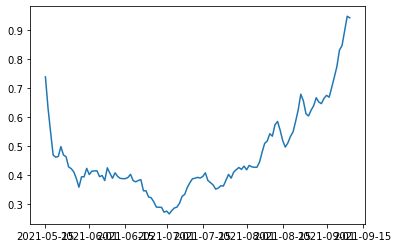

In [64]:
l = ((0.75*C_ToV*df_alphaV['mean'][19:]*D_ToVV)/(D_ToV*C_ToVV*df_alphaV['mean'][19:]))
b = l[70:-20]
plt.plot(b)
# plt.ylim(0,2)

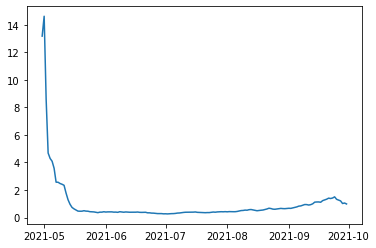

In [47]:
a =((IFRV*D_ToVV))/(C_ToVV*df_alphaV['mean'][19:])
plt.plot(a)

In [34]:
df_alpha['median'].mean()

0.3905688872652097

In [21]:
y1V.mean()

0.046819546667031677

In [25]:
y1V.mean()/np.nan_to_num(y1, posinf=0).mean()

0.9212470781464956

<ipython-input-19-ffd246357ae1>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y1V/y1)


(0.0, 2.0)

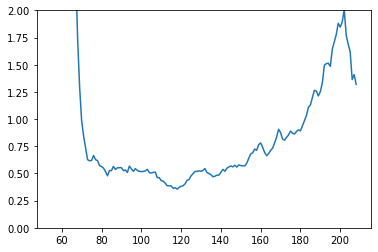

In [19]:
plt.plot(y1V/y1)
plt.ylim(0,2)

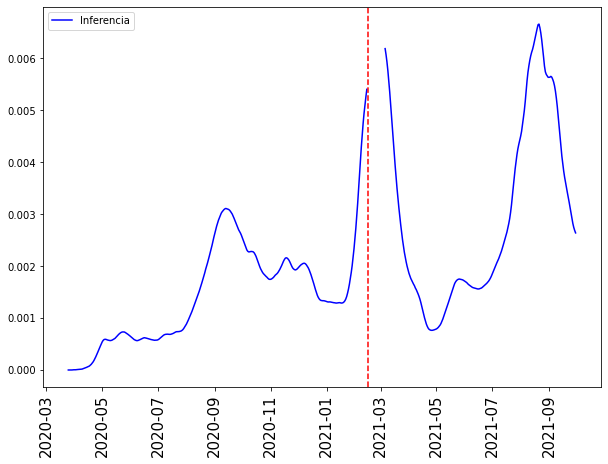

In [24]:
D_To = np.array((obs_df['MuertesNoVacunados']).groupby('Dates').sum())[:-19]
C_To = np.array((obs_df['InfectadosNoVacunados']).groupby('Dates').sum())[19:]

y1 = 1-(D_To/C_To)
D_ToV = np.array((obs_dfV['M_NV+PD']+obs_dfV['MuertesEsquemaCompleto']).groupby('Dates').sum())[:-19]
C_ToV = np.array((obs_dfV['I_NV+PD']+obs_dfV['InfectadosEsquemaCompleto']).groupby('Dates').sum())[19:]
y1V = 1-(D_ToV/C_ToV)
dat=np.unique(obs_df.index.get_level_values(0))[19:]
datV=np.unique(obs_dfV.index.get_level_values(0))[19:]
fig, ax = plt.subplots(figsize=[10,7])
D_T = np.median(np.mean(x_post_all[7,:,:-19,:], -1),0)
C_T = np.median(np.mean(x_post_all[6,:,19:,:], -1),0)+np.median(np.mean(x_post_all[3,:,19:,:], -1),0)
y = (D_T/C_T)
D_TV = np.median(np.mean(x_post_allV[15,:,:228-19,:], -1),0)+np.median(np.sum(x_post_allV[7,:,:228-19,:], -1),0)
C_TV = np.median(np.mean(x_post_allV[14,:,19:228,:], -1),0)+np.median(np.sum(x_post_allV[6,:,19:228,:], -1),0)+np.median(np.sum(x_post_allV[3,:,19:228,:], -1),0)++np.median(np.sum(x_post_allV[11,:,19:228,:], -1),0)
yV = (D_TV/C_TV)
plt.plot(dat,y,'b', label='Inferencia')
# plt.plot(dat,y1,'r', label='Observaciones')
plt.plot(datV,yV, 'b')
# plt.plot(datV,y1V,'r')
plt.legend()
ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax.axvline(x=pd.to_datetime('2021-02-15'), linestyle='--', color='r')

In [25]:
confirmed_post_all   = np.mean(obs_all[0,:,:,:],-1)
deaths_post_all      = np.mean(obs_all[1,:,:,:],-1)
confirmed_post_allV  = np.mean(obs_allV[0,:,:228,:],-1)
deaths_post_allV     = np.mean(obs_allV[1,:,:228,:],-1)
confirmedVV_post_all = np.mean(obs_allV[2,:,:228,:],-1)
deathsVV_post_all    = np.mean(obs_allV[3,:,:228,:],-1)
D_Time               = deaths_post_allV+deathsVV_post_all
C_Time               = confirmed_post_allV+confirmedVV_post_all

df_confirmed   = create_df_response(confirmed_post_all, time=num_steps, dates =dates_assimilation)
df_deaths      = create_df_response(deaths_post_all, time=num_steps, dates =dates_assimilation)
df_confirmedV  = create_df_response(confirmed_post_allV, time=num_stepsV, dates =dates_assimilationV)
df_deathsV     = create_df_response(deaths_post_allV, time=num_stepsV, dates =dates_assimilationV)
df_confirmedVV = create_df_response(confirmedVV_post_all, time=num_stepsV, dates =dates_assimilationV)
df_deathsVV    = create_df_response(deathsVV_post_all, time=num_stepsV, dates =dates_assimilationV)
df_D    = create_df_response(D_Time, time=num_stepsV, dates =dates_assimilationV)
df_C    = create_df_response(C_Time, time=num_stepsV, dates =dates_assimilationV)

S_time   = np.mean(x_post_all[0,:,:,:], -1)
R_time   = np.mean(x_post_all[5,:,:,:], -1)
S_timeV  = np.mean(x_post_allV[0,:,:228,:], -1)
R_timeV  = np.mean(x_post_allV[5,:,:228,:], -1)
SV_timeV = np.mean(x_post_allV[8,:,:228,:], -1)
RV_timeV = np.mean(x_post_allV[13,:,:228,:], -1)
S_Time   = S_timeV+SV_timeV
R_Time   = R_timeV+RV_timeV
T_Time   = S_Time+R_Time

df_S  = create_df_response(S_time, time=num_steps, dates =dates_assimilation)
df_R  = create_df_response(R_time, time=num_steps, dates =dates_assimilation)
df_SV  = create_df_response(S_timeV, time=num_stepsV, dates =dates_assimilationV)
df_RV  = create_df_response(R_timeV, time=num_stepsV, dates =dates_assimilationV)
df_SVV  = create_df_response(SV_timeV, time=num_stepsV, dates =dates_assimilationV)
df_RVV  = create_df_response(RV_timeV, time=num_stepsV, dates =dates_assimilationV)
df_ST  = create_df_response(S_Time, time=num_stepsV, dates =dates_assimilationV)
df_RT  = create_df_response(R_Time, time=num_stepsV, dates =dates_assimilationV)
df_T  = create_df_response(T_Time, time=num_stepsV, dates =dates_assimilationV)

S_timeR = np.mean(x_post_allV[0,:,:228,:6], -1)
E_timeR = np.mean(x_post_allV[1,:,:228,:6], -1)
Ir_timeR = np.mean(x_post_allV[2,:,:228,:6], -1)
Iu_timeR = np.mean(x_post_allV[3,:,:228,:6], -1)
Ih_timeR = np.mean(x_post_allV[4,:,:228,:6], -1)
R_timeR = np.mean(x_post_allV[5,:,:228,:6], -1)
C_timeR = np.mean(x_post_allV[6,:,:228,:6], -1)
D_timeR = np.mean(x_post_allV[7,:,:228,:6], -1)

In [26]:
def format_axis(ax, week=True):
    ax.tick_params(which='both', axis='x', labelrotation=90)
    ax.xaxis.set_major_locator(mdates.YearLocator() )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

Text(0.5, 1.0, 'RT')

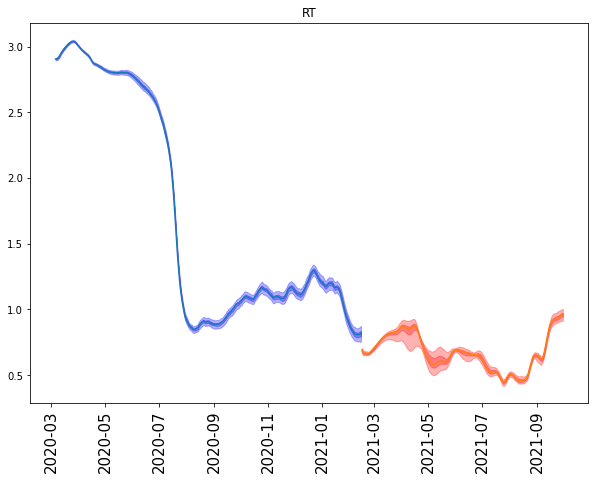

In [27]:
k = 1/6.4
sigma = 0.5
IFR = 0.024749977542727945
IVFR = 0.0808581766320922
gamma = 0.25
VEI = 0.762
V_timeV = (E_timeR/(S_timeR+E_timeR+R_timeR))

Rt_time = ((alpha_time*beta_time*sigma*0*0 - alpha_time*beta_time*sigma*0 - beta_time*sigma*0*0 + beta_time*sigma*0 + 
            alpha_time*beta_time*0*0*0 - alpha_time*beta_time*0*0 - alpha_time*beta_time*0*0 + alpha_time*beta_time*0 - 
            alpha_time*k*beta_time*sigma + k*beta_time*sigma - alpha_time*IFR*k*beta_time + alpha_time*k*beta_time)/
           (gamma*0 + gamma*k))*((S_time)/pop)
#(1/gamma)*(beta_time*sigma*(1-alpha_time) + beta_time*alpha_time*(1-IFR))*(S_time/pop)
df_Rt=create_df_response(Rt_time, time=num_steps, dates =dates_assimilation)

Rt_timeV =((alpha_timeV*beta_timeV*sigma*V_timeV*VEI - alpha_timeV*beta_timeV*sigma*V_timeV - beta_timeV*sigma*V_timeV*VEI + 
           beta_timeV*sigma*V_timeV + alpha_timeV*beta_timeV*V_timeV*VEI*IVFR - alpha_timeV*beta_timeV*V_timeV*IVFR - 
           alpha_timeV*beta_timeV*V_timeV*VEI + alpha_timeV*beta_timeV*V_timeV - alpha_timeV*k*beta_timeV*sigma + 
           k*beta_timeV*sigma - alpha_timeV*IFR*k*beta_timeV + alpha_timeV*k*beta_timeV)/(gamma*V_timeV + gamma*k))*(S_Time/pop)
df_RtV = create_df_response(Rt_timeV, time=num_stepsV, dates =dates_assimilationV)

df_RT = pd.concat([df_Rt, df_RtV])

fig, ax = plt.subplots(1,1, figsize=[10,7])
ax.plot(df_Rt['median'])
ax.plot(df_RtV['median'])
ax.fill_between(df_Rt.index.values, df_Rt["high_95"], df_Rt["low_95"], color='b', alpha=0.3)#, label='95% CI')
ax.fill_between(df_Rt.index.values, df_Rt["high_50"], df_Rt["low_50"], color='b', alpha=0.3)#, label='50% CI')
ax.fill_between(df_RtV.index.values, df_RtV["high_95"], df_RtV["low_95"], color='r', alpha=0.3)#, label='95% CI')
ax.fill_between(df_RtV.index.values, df_RtV["high_50"], df_RtV["low_50"], color='r', alpha=0.3)#, label='50% CI')
ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
# format_axis(ax)
# plt.plot(b['median'])
plt.title('RT')

Text(0.5, 1.0, 'RT')

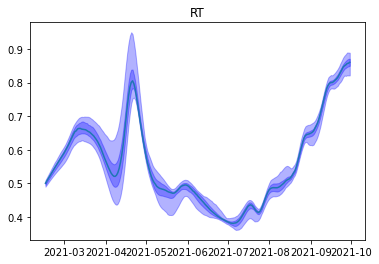

In [28]:

# Rt_timeV =((-beta_timeV*0.5*Vr_timeV*(alpha_timeV-1)*(-0.762+1) - alpha_timeV*beta_timeV*Vr_timeV*(0.008-1)*(-0.762+1) - beta_timeV*0.5*(alpha_timeV*k - k) - beta_timeV*(alpha_timeV*0.007*k - alpha_timeV*k))/(0.25*(Vr_timeV+k)))*((S_timeV+SV_timeV)/pop)
# df_RtV = create_df_response(Rt_timeV, time=num_stepsV, dates =dates_assimilationV)
plt.plot(df_RtV['median'])
plt.fill_between(df_RtV.index.values, df_RtV["high_95"], df_RtV["low_95"], color='b', alpha=0.3)#, label='95% CI')
plt.fill_between(df_RtV.index.values, df_RtV["high_50"], df_RtV["low_50"], color='b', alpha=0.3)#, label='50% CI')
plt.title('RT')


In [28]:
# df_confirmedV = create_df_response(C_Time, time=num_stepsV, dates =dates_assimilationV)
# df_deathsV = create_df_response(D_Time, time=num_stepsV, dates =dates_assimilationV)
df_S  = df_S.groupby(pd.Grouper(freq='W')).mean()
df_S['delta'] = (df_S['median'].diff(periods=1).fillna(0))
df_SV = df_SV.groupby(pd.Grouper(freq='W')).mean()
df_SV['delta'] = (df_SV['median'].diff(periods=1).fillna(0))
df_confirmed2  = df_confirmed.groupby(pd.Grouper(freq='W')).sum()
df_deaths2 = df_deaths.groupby(pd.Grouper(freq='W')).sum()
df_confirmedV2  = df_confirmedV.groupby(pd.Grouper(freq='W')).sum()
df_deathsV2 = df_deathsV.groupby(pd.Grouper(freq='W')).sum()
df_confirmed1  = df_confirmed.groupby(pd.Grouper(freq='W')).sum()
df_deaths1 = df_deaths.groupby(pd.Grouper(freq='W')).sum()
df_confirmedV1  = df_confirmedV.groupby(pd.Grouper(freq='W')).sum()
df_deathsV1 = df_deathsV.groupby(pd.Grouper(freq='W')).sum()
df_Rt1 = df_Rt.groupby(pd.Grouper(freq='W')).mean()
df_RtV1 = df_RtV.groupby(pd.Grouper(freq='W')).mean()

In [29]:
df_confirmed = df_confirmed2#/max(df_confirmedV1['median'])
df_deaths = df_deaths2#/max(df_deathsV1['median'])
df_confirmedV = df_confirmedV2#/max(df_confirmedV1['median'])
df_deathsV = df_deathsV2#/max(df_deathsV1['median'])

In [30]:
df1 = pd.DataFrame(columns=["Dates", "DeltaS", "Beta", "Deaths", "Cases"])
df1["Dates"]            = df_S.index.values
df1                     = df1.set_index("Dates")
df1["Cases"]    = (df_confirmed['median'])
df1["DeltaS"]    = df_S['delta']
df1["Rt"]    = df_Rt1['median']
df1["Beta"]    = df_beta['median']
df1["Deaths"]    = (df_deaths['median'])
df1['Beta'][-1] = 1.139224
df1 = df1.round(3)
df11 = df1.copy()
df1

DeltaS   Beta     Deaths       Cases     Rt
Dates                                                       
2020-03-08        0.000  1.058     -0.000       1.039  2.907
2020-03-15      -43.312  1.066      0.070      19.106  2.948
2020-03-22     -393.367  1.074      1.584     120.288  3.010
2020-03-29    -2790.319  1.068     13.407     759.997  3.037
2020-04-05   -13112.315  1.047     48.564    3370.116  2.996
2020-04-12   -27759.401  1.043    114.978    8247.277  2.950
2020-04-19   -26583.808  1.048    190.821   10949.986  2.893
2020-04-26   -29308.977  1.047    237.733   11354.743  2.856
2020-05-03   -77958.466  1.046    326.668   16706.332  2.827
2020-05-10  -136826.937  1.045    447.426   25209.277  2.807
2020-05-17  -183095.093  1.043    604.630   36183.736  2.802
2020-05-24  -166200.161  1.043    764.977   45620.380  2.804
2020-05-31  -332739.076  1.045    972.110   60920.974  2.795
2020-06-07  -570843.347  1.046   1301.012   85501.430  2.760
2020-06-14  -786230.141  1.049   1571.618   99332.130  2.712
2020-06-21  -807613.849  1.051   1935.339  128413.981  2.666
2020-06-28  -793117.147  1.052   2646.956  187139.248  2.600
2020-07-05 -1489981.333  1.054   3484.033  236282.260  2.485
2020-07-12 -2376264.443  1.051   4308.042  285059.066  2.307
2020-07-19 -4739801.361  1.049   6147.327  391062.719  1.960
2020-07-26 -8813018.073  1.050   8273.650  408610.224  1.325
2020-08-02 -4991435.698  1.050  10706.730  449725.901  0.970
2020-08-09 -1537087.542  1.049  12844.410  483758.328  0.867
2020-08-16   -89860.789  1.048  14154.249  505041.658  0.864
2020-08-23   525399.054  1.051  14659.487  527816.588  0.905
2020-08-30   -80872.996  1.054  14255.877  485048.924  0.901
2020-09-06  -202798.277  1.058  13091.378  415171.146  0.889
2020-09-13   256211.498  1.060  11753.780  368071.478  0.907
2020-09-20   811163.594  1.059  10691.732  350834.428  0.962
2020-09-27   765240.484  1.060  10016.694  348979.262  1.019
2020-10-04   656960.417  1.061   9673.298  352209.367  1.064
2020-10-11   459787.869  1.062   9558.968  363146.995  1.094
2020-10-18   -89996.989  1.061   9391.869  348821.136  1.087
2020-10-25   781862.057  1.060   9692.683  395989.633  1.144
2020-11-01    86253.342  1.062  10313.115  422440.441  1.150
2020-11-08  -609335.052  1.064  10541.992  407537.377  1.105
2020-11-15  -164255.278  1.067  10467.834  402120.853  1.095
2020-11-22   -14598.303  1.066  10299.568  389386.880  1.095
2020-11-29   881409.832  1.065  10572.072  425684.697  1.161
2020-12-06  -340670.878  1.069  10691.939  409510.136  1.131
2020-12-13    -4360.967  1.066  10578.465  409754.378  1.134
2020-12-20  1325776.808  1.061  11402.463  510256.181  1.231
2020-12-27   627474.093  1.062  13294.374  610228.111  1.280
2021-01-03 -1012439.963  1.062  14745.184  631298.714  1.212
2021-01-10  -430162.759  1.058  16324.699  711633.186  1.188
2021-01-17  -240150.252  1.056  18632.181  797729.127  1.182
2021-01-24  -844677.180  1.059  20441.370  791554.854  1.130
2021-01-31 -2251849.148  1.068  19979.385  621314.318  0.962
2021-02-07 -1487295.977  1.075  17011.446  412094.265  0.843
2021-02-14  -330000.566  1.139  13427.423  270643.051  0.811

df1 = df1.drop(df1.index[[0,4,5,-1]])

In [31]:
df2 = pd.DataFrame(columns=["Dates", "DeltaS", "Beta", "Deaths", "Cases"])
df2["Dates"]            = df_SV.index.values
df2                     = df2.set_index("Dates")
df2["Cases"]    = (df_confirmedV['median'])
df2["DeltaS"]    = df_SV['delta']
df2["Rt"]    = df_RtV['median']
df2["Beta"]    = df_betaV['median']
df2["Deaths"]    = (df_deathsV['median'])
df2["DeltaS"].iloc[0] = 720749.0
df2 = df2.round(2).iloc[:-1]
df2

DeltaS  Beta    Deaths       Cases    Rt
Dates                                                   
2021-02-21   720749.00  1.04  11218.31   396661.21  0.66
2021-02-28   142584.53  1.05   9892.05   315775.95  0.70
2021-03-07   566231.68  1.05   8075.04   255522.91  0.76
2021-03-14   654959.15  1.05   6694.08   218479.28  0.81
2021-03-21   358572.64  1.05   6255.86   219819.08  0.82
2021-03-28     5759.16  1.05   6812.65   263333.35  0.84
2021-04-04    48800.63  1.05   8540.71   369296.00  0.87
2021-04-11    10537.73  1.05  11279.07   512654.38  0.85
2021-04-18   881238.82  1.05  15512.18   756468.28  0.86
2021-04-25 -1011453.27  1.05  20254.14   922630.35  0.71
2021-05-02 -2186426.64  1.05  22845.20   893593.06  0.61
2021-05-09 -1095710.88  1.05  23114.80   781566.62  0.58
2021-05-16   268844.44  1.05  22919.09   769869.61  0.61
2021-05-23   123960.52  1.05  22858.14   774141.89  0.61
2021-05-30  1231036.07  1.05  23666.43   903854.28  0.69
2021-06-06   913316.94  1.05  25874.11  1095931.46  0.69
2021-06-13   -95149.40  1.05  28049.42  1204159.15  0.67
2021-06-20  -256190.03  1.05  29834.12  1257556.88  0.66
2021-06-27  -105139.87  1.05  30896.93  1299325.28  0.65
2021-07-04  -638837.72  1.05  30916.15  1292610.61  0.58
2021-07-11 -1619135.13  1.05  28641.17  1072506.53  0.52
2021-07-18  -682755.40  1.05  24683.95   843854.90  0.52
2021-07-25 -1265094.66  1.05  20258.21   613045.60  0.45
2021-08-01  -382625.66  1.05  15347.83   412652.31  0.51
2021-08-08  -172959.69  1.05  11507.70   286343.72  0.48
2021-08-15  -768609.03  1.05   8286.83   185040.78  0.46
2021-08-22   -91786.60  1.05   6021.14   122165.32  0.52
2021-08-29  1176220.13  1.05   4539.61    89542.59  0.65
2021-09-05   240277.45  1.05   3550.60    70240.02  0.62
2021-09-12  -260252.92  1.05   2757.56    52283.22  0.78
2021-09-19  1548652.44  1.05   2350.48    46542.84  0.92
2021-09-26   397156.25  1.05   2103.78    45041.60  0.94

In [32]:
dat = pd.concat([df1,df2])

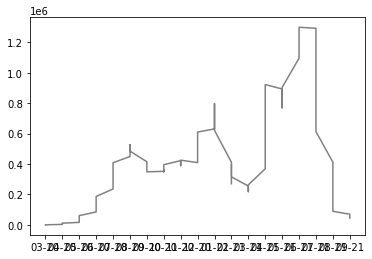

In [33]:
df_T = pd.concat([df1,df2])
df_O1 = obs_df.groupby(pd.Grouper(freq='M')).sum()
df_O2 = obs_dfV.groupby(pd.Grouper(freq='M')).sum()
plt.plot(df1.index.strftime("%m-%y").values, df1["Cases"], color='gray')#, label='Median')
plt.plot(df2.index.strftime("%m-%y").values, df2["Cases"], color='gray')#, label='Median')

In [64]:
np.sort(df1['Cases'].values)

array([7.53000000e-01, 1.20730000e+01, 6.87210000e+01, 4.08892000e+02,
       2.08347500e+03, 6.98585200e+03, 1.07317180e+04, 1.14201850e+04,
       1.65965590e+04, 2.50229510e+04, 3.58441540e+04, 4.55672400e+04,
       6.05968280e+04, 8.49863320e+04, 9.97446880e+04, 1.27229178e+05,
       1.84031131e+05, 2.34534245e+05, 2.69333568e+05, 2.79194587e+05,
       3.44495435e+05, 3.46410133e+05, 3.46619956e+05, 3.48853491e+05,
       3.60870753e+05, 3.63991336e+05, 3.73542350e+05, 3.86871312e+05,
       3.88913629e+05, 3.90698168e+05, 4.00956408e+05, 4.04090015e+05,
       4.07235891e+05, 4.11709474e+05, 4.13143467e+05, 4.16299635e+05,
       4.21284599e+05, 4.22345438e+05, 4.39644270e+05, 4.84079691e+05,
       4.84098040e+05, 4.96906327e+05, 5.03894434e+05, 5.24201776e+05,
       6.09499458e+05, 6.24821683e+05, 6.26935554e+05, 6.94143594e+05,
       7.85803073e+05, 7.88178057e+05])

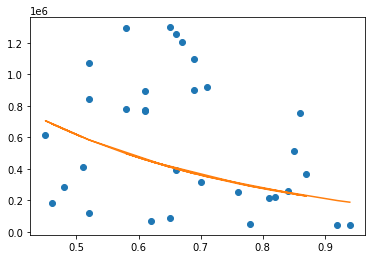

In [36]:
y = (df2['Cases'].values)
X = (df2['Rt'].values)
log_x = np.log(X)
log_y = np.log(y)
coefficients = np.polyfit(X, log_y, 1)

c = np.exp(coefficients[1]) * np.exp(coefficients[0]*X)
# c = coefficients[0] * log_x - coefficients[1]
plt.plot(X, y, "o")
plt.plot(X, c)

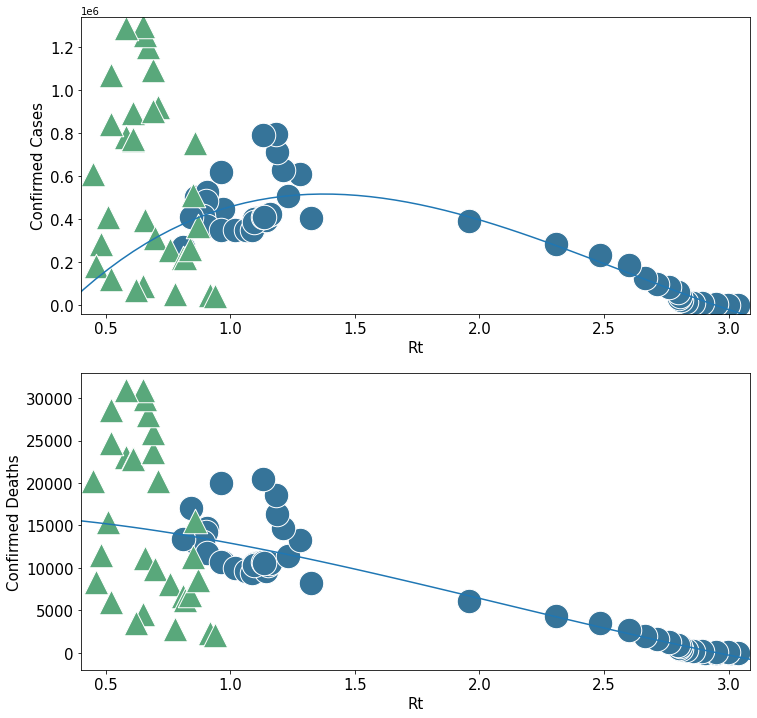

In [41]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
y = (df1['Cases'].values)
X = (df1['Rt'].values)
pf = PolynomialFeatures(degree = 3)
X = pf.fit_transform(X.reshape(-1,1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y)
def eqd1(x):
    return regresion_lineal.intercept_ + regresion_lineal.coef_[1]*x + regresion_lineal.coef_[2]*(x**2) + regresion_lineal.coef_[3]*(x**3)
df1x=np.arange(min(df1['Rt'])-0.8, max(df1['Rt'])+0.2, 0.05)

y2 = (df2['Cases'].values)
X2 = (df2['Rt'].values)
pf = PolynomialFeatures(degree = 3)
X2 = pf.fit_transform(X2.reshape(-1,1))
regresion_lineal2 = LinearRegression()
regresion_lineal2.fit(X2, y2)
def eqd2(x):
    return regresion_lineal2.intercept_ + regresion_lineal2.coef_[1]*x + regresion_lineal2.coef_[2]*(x**2) + regresion_lineal2.coef_[3]*(x**3)
df2x=np.arange(min(df2['Rt'])-0.2, max(df2['Rt'])+0.8, 0.01)

fig, ax = plt.subplots(2,1,figsize=[12,12])

ax[0].scatter(x=df1['Rt'], y=df1['Cases'], color = '#367499', s=600, label='Unvaccinated', edgecolors='white')
ax[0].plot(df1x, [eqd1(i) for i in df1x])
ax[0].scatter(x=df2['Rt'], y=df2['Cases'], color = '#59A87B', s=600, marker='^', label='Vaccinated', edgecolors='white')
# ax[0].plot(df2x, [eqd2(i) for i in df2x], color ='g')

# lgnd = ax[0].legend(fontsize=15, loc='best')
# lgnd.legendHandles[0]._sizes = [300]
# lgnd.legendHandles[1]._sizes = [300]
# ax[0].set_title('Confirmed Cases', fontsize=15)
ax[0].set_xlabel('Rt', fontsize=15)
ax[0].set_ylabel('Confirmed Cases', fontsize=15)
ax[0].tick_params(labelsize=15)
ax[0].set_xlim(min(df2['Rt'])-0.05,max(df1['Rt'])+0.05)
ax[0].set_ylim(min(df1['Cases'])-4e4,max(df2['Cases'])+4e4)

y = (df1['Deaths'].values)
X = (df1['Rt'].values)
pf = PolynomialFeatures(degree = 3)
X = pf.fit_transform(X.reshape(-1,1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y)
def eqd1(x):
    return regresion_lineal.intercept_ + regresion_lineal.coef_[1]*x + regresion_lineal.coef_[2]*(x**2) + regresion_lineal.coef_[3]*(x**3)
df1x=np.arange(min(df1['Rt'])-0.8, max(df1['Rt'])+0.2, 0.05)

y2 = (df2['Deaths'].values)
X2 = (df2['Rt'].values)
pf = PolynomialFeatures(degree = 3)
X2 = pf.fit_transform(X2.reshape(-1,1))
regresion_lineal2 = LinearRegression()
regresion_lineal2.fit(X2, y2)
def eqd2(x):
    return regresion_lineal2.intercept_ + regresion_lineal2.coef_[1]*x + regresion_lineal2.coef_[2]*(x**2) + regresion_lineal2.coef_[3]*(x**3)
df2x=np.arange(min(df2['Rt'])-0.2, max(df2['Rt'])+0.8, 0.01)


ax[1].scatter(x=df1['Rt'], y=df1['Deaths'], color = '#367499', s=600, label='Unvaccinated', edgecolors='white')
ax[1].plot(df1x, [eqd1(i) for i in df1x])
ax[1].scatter(x=df2['Rt'], y=df2['Deaths'], color = '#59A87B', s=600, marker='^', label='Vaccinated', edgecolors='white')
# ax[1].plot(df2x, [eqd2(i) for i in df2x], color ='g')

# ax[1].set_title('Confirmed Deaths', fontsize=15)
ax[1].set_xlabel('Rt', fontsize=15)
ax[1].set_ylabel('Confirmed Deaths', fontsize=15)
ax[1].tick_params(labelsize=15)
ax[1].set_xlim(min(df2['Rt'])-0.05,max(df1['Rt'])+0.05)
ax[1].set_ylim(min(df1['Deaths'])-2e3,max(df2['Deaths'])+2e3)
plt.show()

(-2000.0, 32916.15)

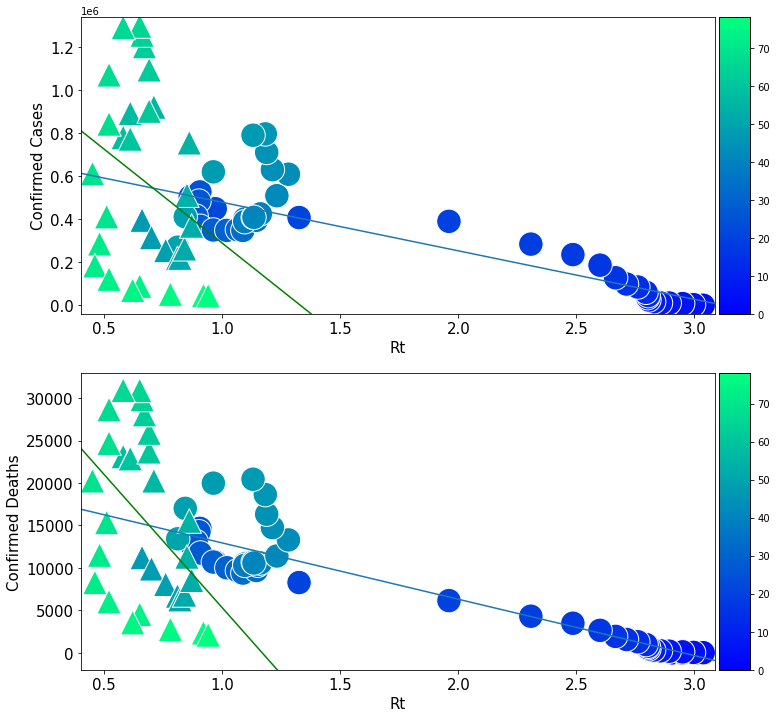

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(2,1,figsize=[12,12])
y = (df1['Cases'].values)
X = (df1['Rt'].values)
pf = PolynomialFeatures(degree = 1)
X = pf.fit_transform(X.reshape(-1,1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y)
def eqd1(x):
    return regresion_lineal.intercept_ + regresion_lineal.coef_[1]*x #+ regresion_lineal.coef_[2]*(x**2) + regresion_lineal.coef_[3]*(x**3)
df1x=np.arange(min(df1['Rt'])-0.7, max(df1['Rt'])+0.3, 0.05)

y2 = (df2['Cases'].values)
X2 = (df2['Rt'].values)
pf = PolynomialFeatures(degree = 1)
X2 = pf.fit_transform(X2.reshape(-1,1))
regresion_lineal2 = LinearRegression()
regresion_lineal2.fit(X2, y2)
def eqd2(x):
    return regresion_lineal2.intercept_ + regresion_lineal2.coef_[1]*x #+ regresion_lineal2.coef_[2]*(x**2) + regresion_lineal2.coef_[3]*(x**3)
df2x=np.arange(min(df2['Rt'])-0.2, max(df2['Rt'])+0.5, 0.01)

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
a = ax[0].scatter(x=df1['Rt'], y=df1['Cases'], c=np.array(list(enumerate(map(int,df1.index.strftime("%d%m").values))))[:,0]+1, cmap='winter', s=600, label='Unvaccinated', edgecolors='white')
quad = fig.colorbar(a, cax=cax, orientation='vertical')
a.set_clim(0,78)
ax[0].plot(df1x, [eqd1(i) for i in df1x])
b = ax[0].scatter(x=df2['Rt'], y=df2['Cases'], s=600, c=np.array(list(enumerate(map(int,df2.index.strftime("%d%m").values))))[:,0]+47, marker='^', cmap='winter', label='Vaccinated', edgecolors='white')
quad = fig.colorbar(b, cax=cax, orientation='vertical')
b.set_clim(0,78)
ax[0].plot(df2x, [eqd2(i) for i in df2x], color ='g')

ax[0].set_xlabel('Rt', fontsize=15)
ax[0].set_ylabel('Confirmed Cases', fontsize=15)
ax[0].tick_params(labelsize=15)
ax[0].set_xlim(min(df2['Rt'])-0.05,max(df1['Rt'])+0.05)
ax[0].set_ylim(min(df1['Cases'])-4e4,max(df2['Cases'])+4e4)

y = (df1['Deaths'].values)
X = (df1['Rt'].values)
pf = PolynomialFeatures(degree = 1)
X = pf.fit_transform(X.reshape(-1,1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y)
def eqd1(x):
    return regresion_lineal.intercept_ + regresion_lineal.coef_[1]*x #+ regresion_lineal.coef_[2]*(x**2) + regresion_lineal.coef_[3]*(x**3)
df1x=np.arange(min(df1['Rt'])-0.7, max(df1['Rt'])+0.2, 0.05)

y2 = (df2['Deaths'].values)
X2 = (df2['Rt'].values)
pf = PolynomialFeatures(degree = 1)
X2 = pf.fit_transform(X2.reshape(-1,1))
regresion_lineal2 = LinearRegression()
regresion_lineal2.fit(X2, y2)
def eqd2(x):
    return regresion_lineal2.intercept_ + regresion_lineal2.coef_[1]*x #+ regresion_lineal2.coef_[2]*(x**2) + regresion_lineal2.coef_[3]*(x**3)
df2x=np.arange(min(df2['Rt'])-0.2, max(df2['Rt'])+0.5, 0.01)

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
a = ax[1].scatter(x=df1['Rt'], y=df1['Deaths'], c=np.array(list(enumerate(map(int,df1.index.strftime("%d%m").values))))[:,0]+1, cmap='winter', s=600, label='Unvaccinated', edgecolors='white')
quad = fig.colorbar(a, cax=cax, orientation='vertical')
a.set_clim(0,78)
ax[1].plot(df1x, [eqd1(i) for i in df1x])
b = ax[1].scatter(x=df2['Rt'], y=df2['Deaths'], s=600, c=np.array(list(enumerate(map(int,df2.index.strftime("%d%m").values))))[:,0]+47, marker='^', cmap='winter', label='Vaccinated', edgecolors='white')
quad = fig.colorbar(b, cax=cax, orientation='vertical')
b.set_clim(0,78)
ax[1].plot(df2x, [eqd2(i) for i in df2x], color ='g')

ax[1].set_xlabel('Rt', fontsize=15)
ax[1].set_ylabel('Confirmed Deaths', fontsize=15)
ax[1].tick_params(labelsize=15)
ax[1].set_xlim(min(df2['Rt'])-0.05,max(df1['Rt'])+0.05)
ax[1].set_ylim(min(df1['Deaths'])-2e3,max(df2['Deaths'])+2e3)

In [50]:
from statsmodels.formula.api import wls
import statsmodels.api as sm
param_search = (df2['Cases'].values)
loglik_values = (df2['Rt'].values)
lambda_sm=0.9
lowess_sm  = sm.nonparametric.lowess
param_grid =  np.linspace(min(param_search), max(param_search), 1000)
loglik_sm  = lowess_sm(loglik_values, param_search, frac=1-lambda_sm, it=3, return_sorted = False, xvals=param_grid)

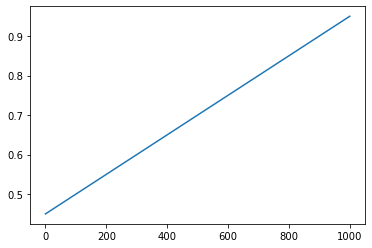

In [49]:
plt.plot(param_grid)

(3569.6500000000015, 1044815.87)

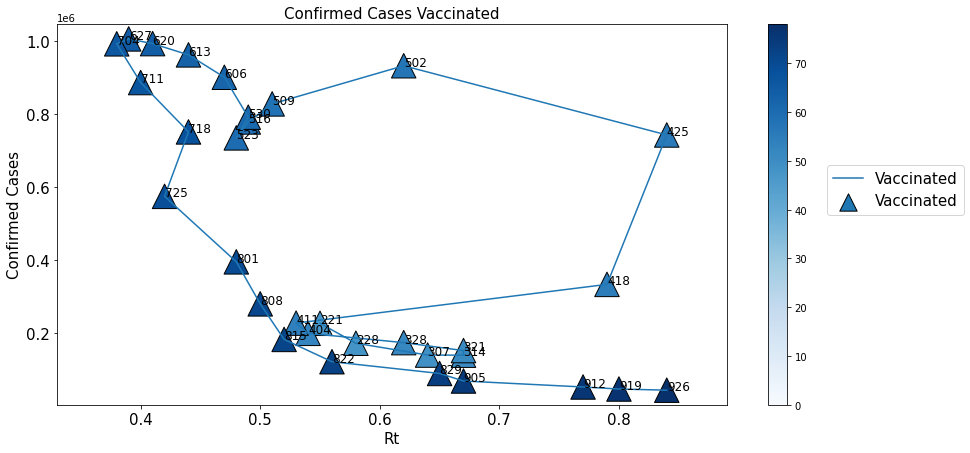

In [113]:
# from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=[15,7])
# plt.subplot(1,2,1)
plt.rcParams.update({'axes.facecolor':'white'})
# plt.scatter(x=df1['Rt'], y=df1['Cases'], c=np.array(list(enumerate(map(int,df1.index.strftime("%d%m").values))))[:,0]+1, cmap='winter', s=600, label='Unvaccinated', edgecolors='white')#winter
# plt.plot(df1['Rt'], df1['Cases'], label='Unvaccinated')
# # plt.colorbar()
# plt.clim(0,78)
# # plt.plot(df1x, [eqd1(i) for i in df1x], marker='o')
# plt.title('Confirmed Cases Unvaccinated', fontsize=15)
# plt.xlabel('Rt', fontsize=15)
# plt.ylabel('Confirmed Cases', fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# lgnd = plt.legend(fontsize=15, loc=[2.25,0.425])
# lgnd.legendHandles[0]._sizes = [300]
# plt.grid()

# plt.subplot(1,2,2)
plt.scatter(x=df2['Rt'], y=df2['Cases'], s=600, c=np.array(list(enumerate(map(int,df2.index.strftime("%d%m").values))))[:,0]+47, marker='^', cmap='Blues', label='Vaccinated', edgecolors='black')
plt.plot(df2['Rt'], df2['Cases'], label='Vaccinated')

# plt.plot(df2x, [eqd2(i) for i in df2x], marker='^', color ='g')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Cases'][i]), fontsize=12)
for i in range(len(df2)):
    plt.annotate(np.array(list(enumerate(map(int,df2.index.strftime("%m%d").values))))[i,1], (df2['Rt'][i], df2['Cases'][i]), fontsize=12)
    
plt.colorbar()
plt.clim(0,78)
lgnd = plt.legend(fontsize=15, loc=[1.15,0.5])
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
plt.title('Confirmed Cases Vaccinated', fontsize=15)
plt.xlabel('Rt', fontsize=15)
plt.ylabel('Confirmed Cases', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.xlim(min(df2['Rt'])-0.05,max(df2['Rt'])+0.05)
plt.ylim(min(df2['Cases'])-4e4,max(df2['Cases'])+4e4)
# plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) 
# plt.axhline(y = 0, color = 'k', linestyle = '--')
# plt.show()

In [78]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
y = df1['Deaths']
X = df1['Rt']
pf = PolynomialFeatures(degree = 1)
X = pf.fit_transform(X.values.reshape(-1,1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y)
def eqd1(x):
    return regresion_lineal.intercept_ + regresion_lineal.coef_[1]*x #+ regresion_lineal.coef_[2]*(x**2) #+ regresion_lineal.coef_[3]*(x**3)
df1x=np.arange(min(df1['Rt'])-0.2, max(df1['Rt'])+0.2, 0.1)

y2 = df2['Deaths']
X2 = df2['Rt']
pf = PolynomialFeatures(degree = 1)
X2 = pf.fit_transform(X2.values.reshape(-1,1))
regresion_lineal2 = LinearRegression()
regresion_lineal2.fit(X2, y2)
def eqd2(x):
    return regresion_lineal2.intercept_ + regresion_lineal2.coef_[1]*x #+ regresion_lineal2.coef_[2]*(x**2) #+ regresion_lineal2.coef_[3]*(x**3)
df2x=np.arange(min(df2['Rt'])-0.2, max(df2['Rt'])+0.2, 0.1)

(-1999.953, 34262.86)

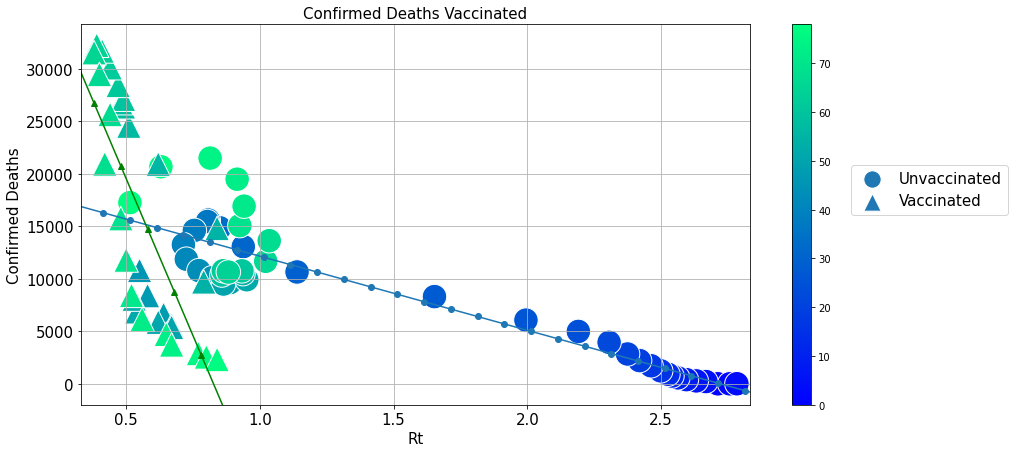

In [79]:
# from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=[15,7])
# plt.subplot(1,2,1)
plt.rcParams.update({'axes.facecolor':'white'})
plt.scatter(x=df1['Rt'], y=df1['Deaths'], c=np.array(list(enumerate(map(int,df1.index.strftime("%d%m").values))))[:,0]+1, cmap='winter', s=600, label='Unvaccinated', edgecolors='white')#winter
# plt.colorbar()
# plt.clim(min(list(map(int,df1.index.strftime("%y%m").values))),max(list(map(int,df1.index.strftime("%y%m").values))[:-8]))
plt.plot(df1x, [eqd1(i) for i in df1x], marker='o')
plt.title('Confirmed Deaths Unvaccinated', fontsize=15)
plt.xlabel('Rt', fontsize=15)
plt.ylabel('Confirmed Deaths', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# lgnd = plt.legend(fontsize=15, loc=[2.25,0.425])
# lgnd.legendHandles[0]._sizes = [300]
# plt.grid()

# plt.subplot(1,2,2)
plt.scatter(x=df2['Rt'], y=df2['Deaths'], s=600, c=np.array(list(enumerate(map(int,df2.index.strftime("%d%m").values))))[:,0]+46, marker='^', cmap='winter', label='Vaccinated', edgecolors='white')

plt.plot(df2x, [eqd2(i) for i in df2x], marker='^', color ='g')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Deaths'][i]), fontsize=12)
# for i in range(len(df2)):
#     plt.annotate(df2.index[i].strftime("%m/%y"), (df2['DeltaS'][i], df2['Deaths'][i]), fontsize=12)
    
plt.colorbar()
plt.clim(0,78)
lgnd = plt.legend(fontsize=15, loc=[1.15,0.5])
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
plt.title('Confirmed Deaths Vaccinated', fontsize=15)
plt.xlabel('Rt', fontsize=15)
plt.ylabel('Confirmed Deaths', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.xlim(min(df2['Rt'])-0.05,max(df1['Rt'])+0.05)
plt.ylim(min(df1['Deaths'])-2e3,max(df2['Deaths'])+2e3)
# plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) 
# plt.axhline(y = 0, color = 'k', linestyle = '--')
# plt.show()

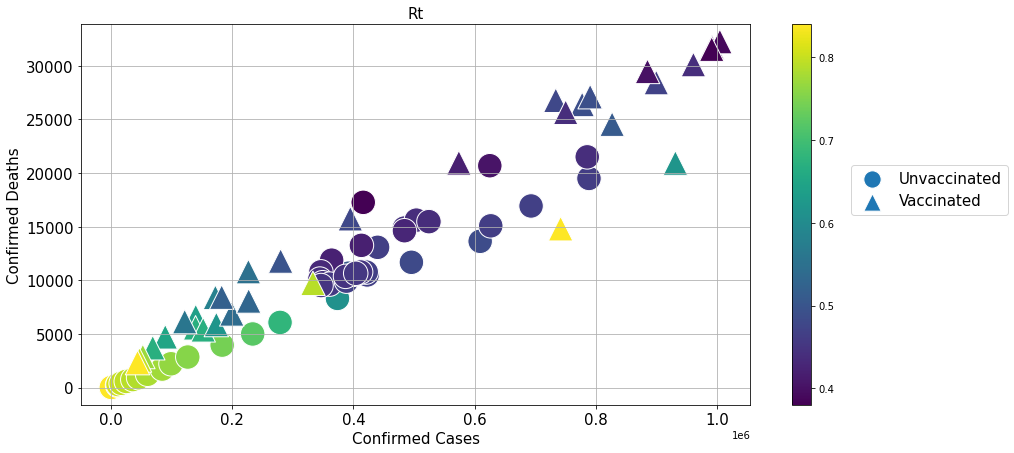

In [46]:
plt.figure(figsize=[15,7])
# plt.subplot(2,1,1)
# plt.rcParams.update({'axes.facecolor':'white'})
# plt.scatter(x=df1['Rt'], y=df1['Cases'], c=list(map(int,df1.index.strftime("%y%m%d").values)), cmap = 'winter', s=600, label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Cases']),max(dat['Cases']))
plt.scatter(x=df1['Cases'], y=df1['Deaths'], s=600, c=df1['Rt'], cmap = 'viridis', label='Unvaccinated', edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
# plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Cases'][i]), fontsize=12)
# for i in range(len(df2)):
#     plt.annotate(df2.index[i].strftime("%m/%y"), (df2['DeltaS'][i], df2['Cases'][i]), fontsize=12)
    
# plt.colorbar()
# plt.clim(min(dat['Cases']),max(dat['Cases']))
# lgnd = plt.legend(fontsize=15, loc=[1.05,0.5])
# lgnd.legendHandles[0]._sizes = [300]
# lgnd.legendHandles[1]._sizes = [300]
# plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
# plt.xscale('log')
# plt.title('Unvaccinated', fontsize=15)
plt.xlabel('Confirmed Cases', fontsize=15)
plt.ylabel('Confirmed Deaths', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()

# plt.subplot(2,1,2)
# plt.rcParams.update({'axes.facecolor':'white'})
# plt.scatter(x=df1['Rt'], y=df1['Cases'], c=list(map(int,df1.index.strftime("%y%m%d").values)), cmap = 'winter', s=600, label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Cases']),max(dat['Cases']))
plt.scatter(x=df2['Cases'], y=df2['Deaths'], s=600, marker='^', c=df2['Rt'], cmap = 'viridis', label='Vaccinated', edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
# plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Cases'][i]), fontsize=12)
# for i in range(len(df2)):
#     plt.annotate(df2.index[i].strftime("%m/%y"), (df2['DeltaS'][i], df2['Cases'][i]), fontsize=12)
    
plt.colorbar()
# plt.clim(min(dat['Cases']),max(dat['Cases']))
lgnd = plt.legend(fontsize=15, loc=[1.15,0.5])
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
plt.title('Rt', fontsize=15)
plt.xlabel('Confirmed Cases', fontsize=15)
plt.ylabel('Confirmed Deaths', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
# plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.show()

In [72]:
max(df1['Rt'])

2.784

In [47]:
labs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,1.75,2,2.5,3]
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,1.75,2,2.5,2.9]
df1['Rt_C'] = pd.cut(df1['Rt'], bins=bins, labels=labs)
df2['Rt_C'] = pd.cut(df2['Rt'], bins=bins, labels=labs)

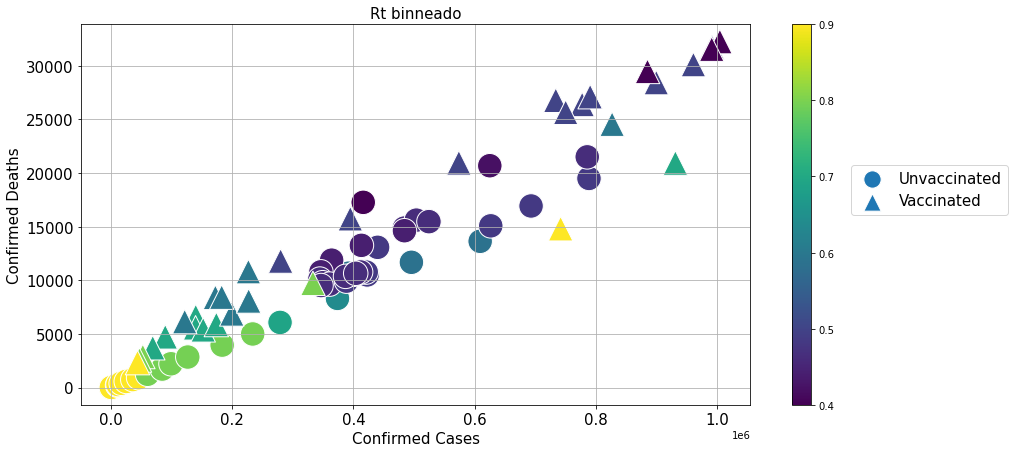

In [48]:
plt.figure(figsize=[15,7])
# plt.subplot(2,1,1)
# plt.rcParams.update({'axes.facecolor':'white'})
# plt.scatter(x=df1['Rt'], y=df1['Cases'], c=list(map(int,df1.index.strftime("%y%m%d").values)), cmap = 'winter', s=600, label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Cases']),max(dat['Cases']))
plt.scatter(x=df1['Cases'], y=df1['Deaths'], s=600, c=df1['Rt_C'], cmap = 'viridis', label='Unvaccinated', edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
# plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Cases'][i]), fontsize=12)
# for i in range(len(df2)):
#     plt.annotate(df2.index[i].strftime("%m/%y"), (df2['DeltaS'][i], df2['Cases'][i]), fontsize=12)
    
# plt.colorbar()
# plt.clim(min(dat['Cases']),max(dat['Cases']))
# lgnd = plt.legend(fontsize=15, loc=[1.05,0.5])
# lgnd.legendHandles[0]._sizes = [300]
# lgnd.legendHandles[1]._sizes = [300]
# plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
# plt.xscale('log')
# plt.title('Unvaccinated', fontsize=15)
plt.xlabel('Confirmed Cases', fontsize=15)
plt.ylabel('Confirmed Deaths', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()

# plt.subplot(2,1,2)
# plt.rcParams.update({'axes.facecolor':'white'})
# plt.scatter(x=df1['Rt'], y=df1['Cases'], c=list(map(int,df1.index.strftime("%y%m%d").values)), cmap = 'winter', s=600, label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Cases']),max(dat['Cases']))
plt.scatter(x=df2['Cases'], y=df2['Deaths'], s=600, marker = '^', c=df2['Rt_C'], cmap = 'viridis', label='Vaccinated', edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
# plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Cases'][i]), fontsize=12)
# for i in range(len(df2)):
#     plt.annotate(df2.index[i].strftime("%m/%y"), (df2['DeltaS'][i], df2['Cases'][i]), fontsize=12)
    
plt.colorbar()
# plt.clim(min(dat['Cases']),max(dat['Cases']))
lgnd = plt.legend(fontsize=15, loc=[1.15,0.5])
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
plt.title('Rt binneado', fontsize=15)
plt.xlabel('Confirmed Cases', fontsize=15)
plt.ylabel('Confirmed Deaths', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
# plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.show()

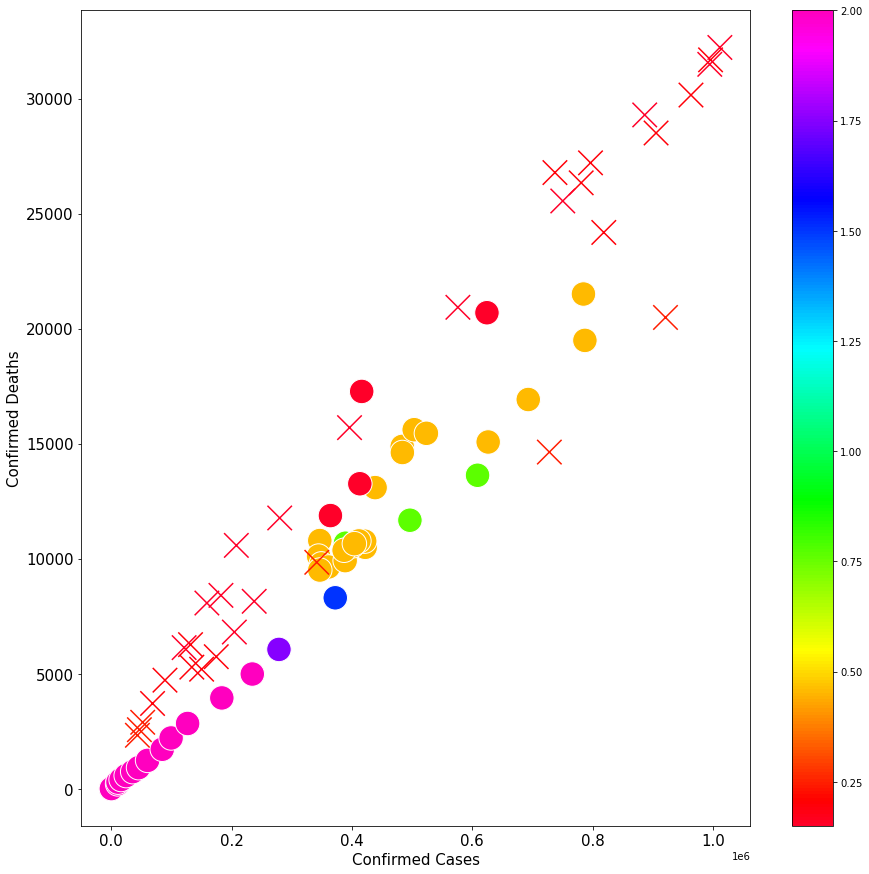

In [190]:
plt.figure(figsize=[15,15])
# plt.subplot(2,1,1)
# plt.rcParams.update({'axes.facecolor':'white'})
# plt.scatter(x=df1['Rt'], y=df1['Cases'], c=list(map(int,df1.index.strftime("%y%m%d").values)), cmap = 'winter', s=600, label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Cases']),max(dat['Cases']))
plt.scatter(x=df1['Cases'], y=df1['Deaths'], s=600, c=df1['Rt_C'], cmap = 'gist_rainbow', label='Vaccinated', edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
# plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Cases'][i]), fontsize=12)
# for i in range(len(df2)):
#     plt.annotate(df2.index[i].strftime("%m/%y"), (df2['DeltaS'][i], df2['Cases'][i]), fontsize=12)
    
# plt.colorbar()
# plt.clim(min(dat['Cases']),max(dat['Cases']))
# lgnd = plt.legend(fontsize=15, loc=[1.05,0.5])
# lgnd.legendHandles[0]._sizes = [300]
# lgnd.legendHandles[1]._sizes = [300]
# plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
# plt.xscale('log')
# plt.title('Unvaccinated', fontsize=15)
plt.xlabel('Confirmed Cases', fontsize=15)
plt.ylabel('Confirmed Deaths', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

# plt.subplot(2,1,2)
# plt.rcParams.update({'axes.facecolor':'white'})
# plt.scatter(x=df1['Rt'], y=df1['Cases'], c=list(map(int,df1.index.strftime("%y%m%d").values)), cmap = 'winter', s=600, label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Cases']),max(dat['Cases']))
plt.scatter(x=df2['Cases'], y=df2['Deaths'], s=600, c=df2['Rt_C'], cmap = 'gist_rainbow', label='Vaccinated', edgecolors='white', marker='x')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
# plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Cases'][i]), fontsize=12)
# for i in range(len(df2)):
#     plt.annotate(df2.index[i].strftime("%m/%y"), (df2['DeltaS'][i], df2['Cases'][i]), fontsize=12)
    
plt.colorbar()
plt.clim(min(df2['Rt_C']),max(df1['Rt_C']))
# lgnd = plt.legend(fontsize=15, loc=[1.05,0.5])
# lgnd.legendHandles[0]._sizes = [300]
# lgnd.legendHandles[1]._sizes = [300]
# plt.title('Vaccinated', fontsize=15)
plt.xlabel('Confirmed Cases', fontsize=15)
plt.ylabel('Confirmed Deaths', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
# plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.show()

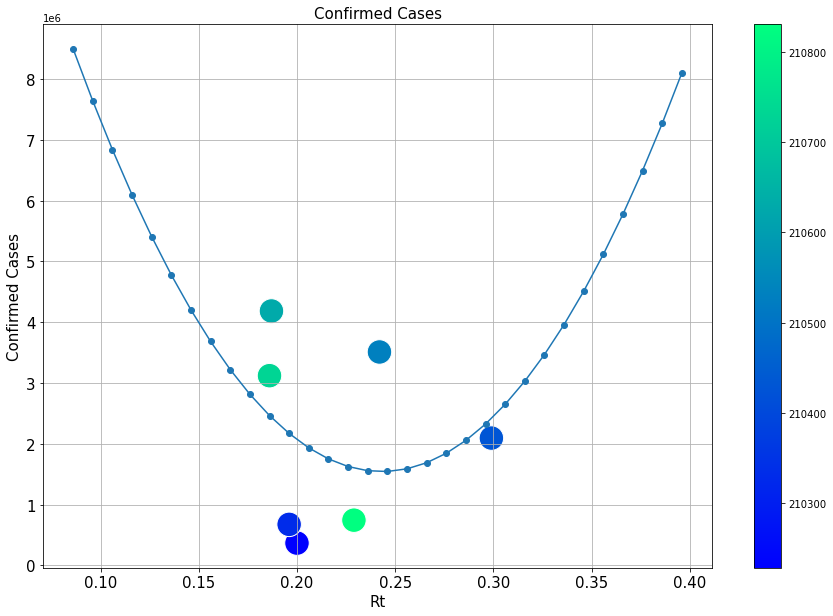

In [73]:
plt.figure(figsize=[15,10])
plt.rcParams.update({'axes.facecolor':'white'})
# plt.scatter(x=df1['Rt'], y=df1['Cases'], c=list(map(int,df1.index.strftime("%y%m%d").values)), cmap = 'winter', s=600, label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Cases']),max(dat['Cases']))
plt.scatter(x=df2['Rt'], y=df2['Cases'], s=600, c=list(map(int,df2.index.strftime("%y%m%d").values)), cmap = 'winter', label='Vaccinated', edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Cases'][i]), fontsize=12)
# for i in range(len(df2)):
#     plt.annotate(df2.index[i].strftime("%m/%y"), (df2['DeltaS'][i], df2['Cases'][i]), fontsize=12)
    
plt.colorbar()
# plt.clim(min(dat['Cases']),max(dat['Cases']))
# lgnd = plt.legend(fontsize=15, loc=[1.05,0.5])
# lgnd.legendHandles[0]._sizes = [300]
# lgnd.legendHandles[1]._sizes = [300]
plt.title('Confirmed Cases', fontsize=15)
plt.xlabel('Rt', fontsize=15)
plt.ylabel('Confirmed Cases', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
# plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=[15,10])
plt.rcParams.update({'axes.facecolor':'white'})
ax[0].scatter(x=df1['DeltaS'], y=df1['Cases'], s=600,color='#367499', label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Cases']),max(dat['Cases']))
ax[0].scatter(x=df2['DeltaS'], y=df2['Cases'], s=600,color='#59A87B', label='Vaccinated', edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
# # plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
for i in range(len(df1)):
    ax[0].annotate(df1.index[i].strftime("%m"), (df1['DeltaS'][i], df1['Cases'][i]), fontsize=12)
for i in range(len(df2)):
    ax[0].annotate(df2.index[i].strftime("%m"), (df2['DeltaS'][i], df2['Cases'][i]), fontsize=12)
    
# plt.colorbar()
# plt.clim(min(dat['Cases']),max(dat['Cases']))
# lgnd = ax[0].legend(fontsize=15, loc=[1.05,0.5])
# lgnd.legendHandles[0]._sizes = [300]
# lgnd.legendHandles[1]._sizes = [300]
ax[0].set_title('Confirmed Cases', fontsize=15)
ax[0].set_xlabel('Delta S', fontsize=15)
ax[0].set_ylabel('Confirmed Cases', fontsize=15)
ax[0].tick_params( which='both', axis='y', labelsize=15)
ax[0].tick_params( which='both', axis='x', labelsize=15)
ax[0].grid()
ax[0].set_xscale('symlog')

ax[1].plot(df11.index.values, df11['Cases'], color = "#367499")
ax[1].scatter(df_O1.index.values, df_O1['I_NV+PD'], color ="#367499")
ax[1].plot(df2.index.values, df2['Cases'], color = "#59A87B")
ax[1].scatter(df_O2.index.values, df_O2['I_NV+PD']+df_O2["InfectadosEsquemaCompleto"], color ="#59A87B")
ax[1].set_ylabel('Confirmed Cases', fontsize=15)
ax[1].tick_params( which='both', axis='x', labelsize=15, labelrotation = 90)
ax[1].axvline(x=pd.to_datetime('2020-05-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-06-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-07-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-08-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-09-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-10-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-11-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-12-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-01-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-02-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-03-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-04-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-05-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-06-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-07-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-08-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-09-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-10-01'), linestyle='--', color='r', alpha=0.4)

# plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.show()

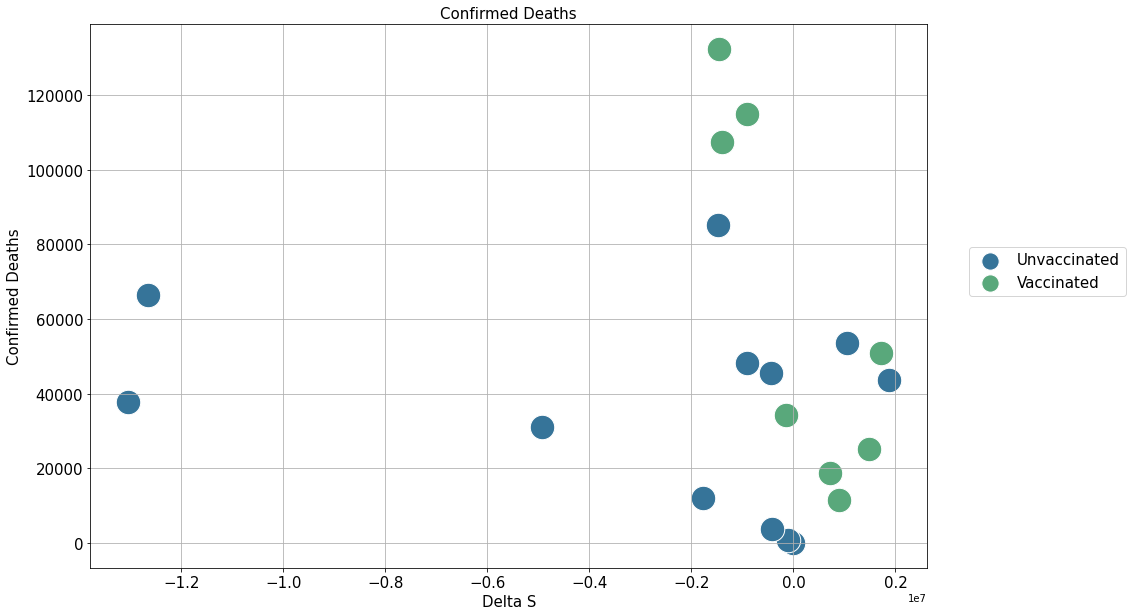

In [204]:
plt.figure(figsize=[15,10])
plt.rcParams.update({'axes.facecolor':'white'})
plt.scatter(x=df1['DeltaS'], y=df1['Deaths'], s=600,color='#367499', label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Deaths']),max(dat['Deaths']))
plt.scatter(x=df2['DeltaS'], y=df2['Deaths'], s=600,color='#59A87B', label='Vaccinated', edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
# # plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
# for i in range(len(df1)):
#     plt.annotate(df1.index[i].strftime("%m/%y"), (df1['DeltaS'][i], df1['Deaths'][i]), fontsize=12)
# for i in range(len(df2)):
#     plt.annotate(df2.index[i].strftime("%m/%y"), (df2['DeltaS'][i], df2['Deaths'][i]), fontsize=12)
    
# plt.colorbar()
# plt.clim(min(dat['Deaths']),max(dat['Deaths']))
lgnd = plt.legend(fontsize=15, loc=[1.05,0.5])
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
plt.title('Confirmed Deaths', fontsize=15)
plt.xlabel('Delta S', fontsize=15)
plt.ylabel('Confirmed Deaths', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
# plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=[15,10])
plt.rcParams.update({'axes.facecolor':'white'})
ax[0].scatter(x=df1['DeltaS'], y=df1['Deaths'], s=600,color='#367499', label='Unvaccinated', edgecolors='white')#winter
# plt.clim(min(dat['Deaths']),max(dat['Deaths']))
ax[0].scatter(x=df2['DeltaS'], y=df2['Deaths'], s=600,color='#59A87B', label='Vaccinated', edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='^')
# # plt.plot(df2x, [eqd2(i) for i in df2x], marker='o')
for i in range(len(df1)):
    ax[0].annotate(df1.index[i].strftime("%m"), (df1['DeltaS'][i], df1['Deaths'][i]), fontsize=12)
for i in range(len(df2)):
    ax[0].annotate(df2.index[i].strftime("%m"), (df2['DeltaS'][i], df2['Deaths'][i]), fontsize=12)
    
# plt.colorbar()
# plt.clim(min(dat['Deaths']),max(dat['Deaths']))
# lgnd = ax[0].legend(fontsize=15, loc=[1.05,0.5])
# lgnd.legendHandles[0]._sizes = [300]
# lgnd.legendHandles[1]._sizes = [300]
ax[0].set_title('Confirmed Deaths', fontsize=15)
ax[0].set_xlabel('Delta S', fontsize=15)
ax[0].set_ylabel('Confirmed Deaths', fontsize=15)
ax[0].tick_params( which='both', axis='y', labelsize=15)
ax[0].tick_params( which='both', axis='x', labelsize=15)
ax[0].grid()

ax[1].plot(df11.index.values, df11['Deaths'], color = "#367499")
ax[1].scatter(df_O1.index.values, df_O1['M_NV+PD'], color ="#367499")
ax[1].plot(df2.index.values, df2['Deaths'], color = "#59A87B")
ax[1].scatter(df_O2.index.values, df_O2['M_NV+PD']+df_O2["MuertesEsquemaCompleto"], color ="#59A87B")
ax[1].set_ylabel('Confirmed Deaths', fontsize=15)
ax[1].tick_params( which='both', axis='x', labelsize=15, labelrotation = 90)
ax[1].axvline(x=pd.to_datetime('2020-05-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-06-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-07-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-08-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-09-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-10-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-11-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-12-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-01-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-02-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-03-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-04-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-05-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-06-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-07-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-08-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-09-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-10-01'), linestyle='--', color='r', alpha=0.4)

# plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.show()

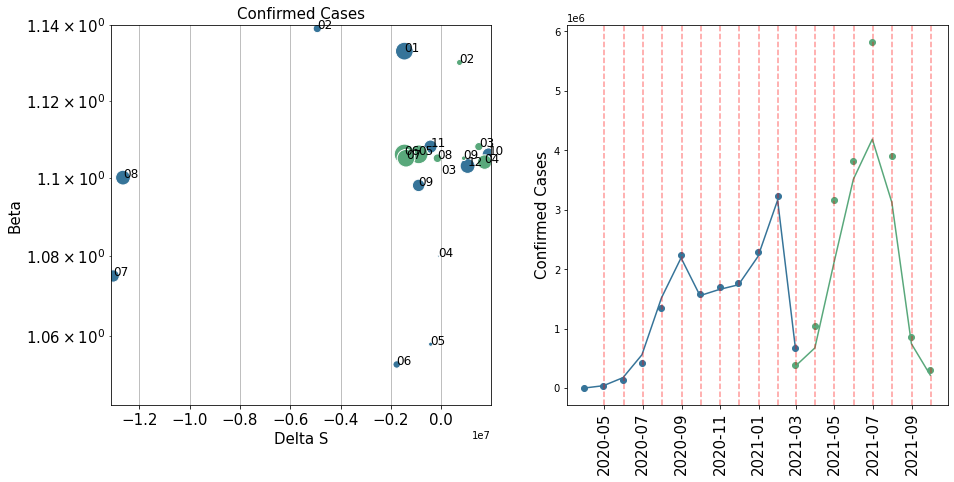

In [194]:
fig, ax = plt.subplots(1,2,figsize=[15,7])
plt.rcParams.update({'axes.facecolor':'white'})

s1 = ax[0].scatter(y=df1['Beta'], x=df1['DeltaS'], s=df1['Cases'].values*1e-4, color='#367499', label='Unvaccinated',edgecolors='white')#winter
# plt.clim(min(dat['Cases']),max(dat['Cases']))
s2 = ax[0].scatter(y=df2['Beta'], x=df2['DeltaS'], s=df2['Cases'].values*1e-4, color='#59A87B', label='Vaccinated',edgecolors='white')


# plt.plot(df1x, [eqd1(i) for i in df1x], marker='o', color = "#367499", alpha=0.7)
# plt.plot(df2x, [eqd2(i) for i in df2x], marker='o', color ="#59A87B", alpha=0.7)
for i in range(len(df1)):
    ax[0].annotate(df1.index[i].strftime("%m"), (df1['DeltaS'][i], df1['Beta'][i]), fontsize=12)
for i in range(len(df2)):
    ax[0].annotate(df2.index[i].strftime("%m"), (df2['DeltaS'][i], df2['Beta'][i]), fontsize=12)
    
# cbar = plt.colorbar()
# cbar.ax.tick_params(labelsize=15)
# plt.clim(min(dat['Cases']),max(dat['Cases']))
# lgnd = ax[0].legend(fontsize=15, loc=[1.05,0.5])
# lgnd.legendHandles[0]._sizes = [300]
# lgnd.legendHandles[1]._sizes = [300]
ax[0].set_title('Confirmed Cases', fontsize=15)
ax[0].set_ylabel('Beta', fontsize=15)
ax[0].set_xlabel('Delta S', fontsize=15)
ax[0].axhline(y = 0, color = 'k', linestyle = '--')
ax[0].tick_params( which='both', axis='y', labelsize=15)
ax[0].tick_params( which='both', axis='x', labelsize=15)
ax[0].set_ylim(min(df1['Beta'])-0.01,max(df2['Beta'])+0.01)
ax[0].set_xlim(min(df1['DeltaS'])-1e5,max(df1['DeltaS'])+1e5)
# plt.(fontsize=15)
ax[0].grid()

ax[0].set_yscale('log')


ax[1].plot(df11.index.values, df11['Cases'], color = "#367499")
ax[1].scatter(df_O1.index.values, df_O1['I_NV+PD'], color ="#367499")
ax[1].plot(df2.index.values, df2['Cases'], color = "#59A87B")
ax[1].scatter(df_O2.index.values, df_O2['I_NV+PD']+df_O2["InfectadosEsquemaCompleto"], color ="#59A87B")
ax[1].set_ylabel('Confirmed Cases', fontsize=15)
ax[1].tick_params( which='both', axis='x', labelsize=15, labelrotation = 90)
ax[1].axvline(x=pd.to_datetime('2020-05-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-06-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-07-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-08-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-09-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-10-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-11-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2020-12-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-01-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-02-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-03-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-04-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-05-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-06-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-07-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-08-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-09-01'), linestyle='--', color='r', alpha=0.4)
ax[1].axvline(x=pd.to_datetime('2021-10-01'), linestyle='--', color='r', alpha=0.4)

# ax[1].plot(df_T.index.values, df2['Cases'])

plt.show()

In [127]:
df_O

InfectadosNoVacunados  InfectadosPrimeraDosis  \
Dates                                                       
2020-03-31                   4052                       0   
2020-04-30                  33581                       0   
2020-05-31                 133737                       0   
2020-06-30                 428570                       0   
2020-07-31                1340990                       0   
2020-08-31                2235377                       5   
2020-09-30                1587559                       2   
2020-10-31                1694208                      28   
2020-11-30                1762484                       7   
2020-12-31                2279501                       0   
2021-01-31                3231321                       0   
2021-02-28                 665624                       0   
2021-02-28                 381190                       0   
2021-03-31                1048116                    2267   
2021-04-30                3124025                   26569   
2021-05-31                3701093                   38940   
2021-06-30                5420014                  167639   
2021-07-31                3521317                  151578   
2021-08-31                 696018                   49825   
2021-09-30                 179647                   35058   

            InfectadosEsquemaCompleto  InfectadosDosisRefuerzo  \
Dates                                                            
2020-03-31                          0                        0   
2020-04-30                          0                        0   
2020-05-31                          0                        0   
2020-06-30                          7                        0   
2020-07-31                          7                        0   
2020-08-31                          0                        0   
2020-09-30                          0                        0   
2020-10-31                          0                        0   
2020-11-30                          5                        0   
2020-12-31                         23                        3   
2021-01-31                         87                        4   
2021-02-28                         24                        0   
2021-02-28                          1                        0   
2021-03-31                        138                        0   
2021-04-30                      12473                        0   
2021-05-31                      85115                        0   
2021-06-30                     230148                        0   
2021-07-31                     224861                        0   
2021-08-31                     112676                        0   
2021-09-30                      84307                        7   

            InfectadosTotal  HospitalizadosNoVacunados  \
Dates                                                    
2020-03-31             4052                       1873   
2020-04-30            33581                       8597   
2020-05-31           133737                      20427   
2020-06-30           428577                      50064   
2020-07-31          1340997                     137405   
2020-08-31          2235382                     140828   
2020-09-30          1587561                      95766   
2020-10-31          1694236                      97526   
2020-11-30          1762496                      89297   
2020-12-31          2279527                     130873   
2021-01-31          3231412                     173590   
2021-02-28           665648                      37202   
2021-02-28           381191                      24568   
2021-03-31          1050521                      65802   
2021-04-30          3163067                     159079   
2021-05-31          3825148                     190335   
2021-06-30          5817801                     154472   
2021-07-31          3897756                      90839   
2021-08-31           858519                      21548  

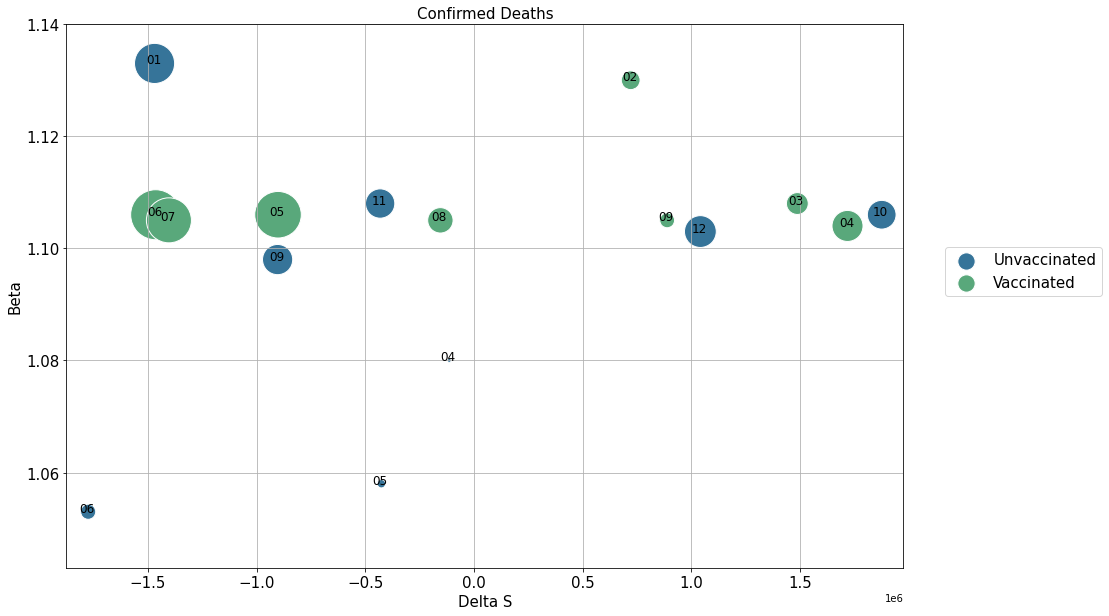

In [67]:
plt.figure(figsize=[15,10])
plt.rcParams.update({'axes.facecolor':'white'})

s1 = plt.scatter(y=df1['Beta'], x=df1['DeltaS'], s=df1['Deaths'].values*2500, color='#367499', label='Unvaccinated',edgecolors='white')#winter
plt.clim(min(dat['Deaths']),max(dat['Deaths']))
s2 = plt.scatter(y=df2['Beta'], x=df2['DeltaS'], s=df2['Deaths'].values*2500, color='#59A87B', label='Vaccinated',edgecolors='white')
# plt.plot(df1x, [eqd1(i) for i in df1x], marker='o', color = "#367499", alpha=0.7)
# plt.plot(df2x, [eqd2(i) for i in df2x], marker='o', color ="#59A87B", alpha=0.7)
for i in range(len(df1)):
    plt.annotate(df1.index[i].strftime("%m"), (df1['DeltaS'][i]-40000, df1['Beta'][i]), fontsize=12)
for i in range(len(df2)):
    plt.annotate(df2.index[i].strftime("%m"), (df2['DeltaS'][i]-40000, df2['Beta'][i]), fontsize=12)
    
# cbar = plt.colorbar()
# cbar.ax.tick_params(labelsize=15)
plt.clim(min(dat['Deaths']),max(dat['Deaths']))
lgnd = plt.legend(fontsize=15, loc=[1.05,0.5])
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
plt.title('Confirmed Deaths', fontsize=15)
plt.ylabel('Beta', fontsize=15)
plt.xlabel('Delta S', fontsize=15)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(min(df1['Beta'])-0.01,max(df2['Beta'])+0.01)
plt.xlim(min(df1['DeltaS'])-1e5,max(df1['DeltaS'])+1e5)
# plt.(fontsize=15)
plt.grid()
plt.show()

In [30]:
df_SF=df_SF.groupby(pd.Grouper(freq='M')).mean()
df_BF=df_BF.groupby(pd.Grouper(freq='M')).mean()
df_DF=df_DF.groupby(pd.Grouper(freq='M')).mean()
df_CF=df_CF.groupby(pd.Grouper(freq='M')).mean()

In [31]:
df_SF['delta'] = abs(df_SF['median'].diff(periods=1).fillna(0))
df_SF

mean    median           std    low_50   high_50    low_80  \
date                                                                         
2020-03-31  0.999952  0.999952  6.151183e-07  0.999951  0.999952  0.999951   
2020-04-30  0.997360  0.997361  2.527383e-05  0.997343  0.997377  0.997327   
2020-05-31  0.987937  0.987938  1.176184e-04  0.987855  0.988020  0.987789   
2020-06-30  0.945439  0.945423  1.166869e-03  0.944716  0.946329  0.943901   
2020-07-31  0.641228  0.641219  5.997623e-03  0.636945  0.645468  0.633504   
2020-08-31  0.421320  0.420702  1.065547e-02  0.414138  0.427382  0.408409   
2020-09-30  0.376492  0.376036  1.214267e-02  0.368256  0.384026  0.361501   
2020-10-31  0.339377  0.339173  9.605130e-03  0.332705  0.346044  0.326841   
2020-11-30  0.332132  0.331748  1.115409e-02  0.324424  0.339799  0.317812   
2020-12-31  0.339201  0.338319  1.274052e-02  0.330634  0.347955  0.323087   
2021-01-31  0.293281  0.294235  1.226327e-02  0.285897  0.300576  0.278103   
2021-02-28  0.221500  0.222003  6.359293e-03  0.217954  0.225312  0.213379   
2021-03-31  0.251932  0.251935  1.449759e-04  0.251841  0.252029  0.251750   
2021-04-30  0.277386  0.277345  9.748349e-04  0.276748  0.277984  0.276179   
2021-05-31  0.270035  0.269773  2.329914e-03  0.268389  0.271519  0.267332   
2021-06-30  0.225624  0.225446  3.688831e-03  0.223239  0.227768  0.220947   
2021-07-31  0.152119  0.151884  6.758678e-03  0.147332  0.156579  0.143548   
2021-08-31  0.144737  0.144514  9.397769e-03  0.138100  0.151513  0.132485   
2021-09-30  0.198493  0.198222  1.148034e-02  0.190407  0.206162  0.184013   

             high_80    low_95   high_95     delta  
date                                                
2020-03-31  0.999952  0.999950  0.999953  0.000000  
2020-04-30  0.997391  0.997311  0.997406  0.002591  
2020-05-31  0.988076  0.987717  0.988165  0.009423  
2020-06-30  0.946797  0.943108  0.947562  0.042515  
2020-07-31  0.648982  0.630100  0.652248  0.304204  
2020-08-31  0.435423  0.402703  0.443701  0.220517  
2020-09-30  0.392150  0.354085  0.400207  0.044665  
2020-10-31  0.351967  0.321721  0.357167  0.036864  
2020-11-30  0.346173  0.312537  0.354446  0.007425  
2020-12-31  0.355058  0.316481  0.365193  0.006571  
2021-01-31  0.307811  0.266195  0.316833  0.044084  
2021-02-28  0.228567  0.206898  0.233808  0.072232  
2021-03-31  0.252110  0.251649  0.252199  0.029932  
2021-04-30  0.278614  0.275613  0.279305  0.025411  
2021-05-31  0.273133  0.266139  0.274848  0.007572  
2021-06-30  0.230542  0.218902  0.233476  0.044327  
2021-07-31  0.160902  0.140034  0.165857  0.073562  
2021-08-31  0.156342  0.127847  0.163410  0.007370  
2021-09-30  0.212882  0.178372  0.221981  0.053708

In [32]:
df1 = pd.DataFrame(columns=["Dates", "DeltaS", "Beta", "Deaths", "Cases"])
df1["Dates"]            = df_SF.index.values
df1                     = df1.set_index("Dates")
df1["Cases"]    = df_CF['median']
df1["DeltaS"]    = df_SF['delta']
df1["Beta"]    = df_BF['median']
df1["Deaths"]    = df_DF['median']
df1 = df1.round(3)

In [33]:
df1

DeltaS   Beta    Deaths       Cases
Dates                                          
2020-03-31   0.000  0.771     0.460      52.807
2020-04-30   0.003  0.781    36.007    1194.554
2020-05-31   0.009  0.767   129.738    5054.818
2020-06-30   0.043  0.765   417.396   16929.222
2020-07-31   0.304  0.762  1202.382   45117.421
2020-08-31   0.221  0.752  2056.794   69797.470
2020-09-30   0.045  0.750  1538.448   48443.434
2020-10-31   0.037  0.759  1284.372   48739.431
2020-11-30   0.007  0.755  1401.594   54523.179
2020-12-31   0.007  0.755  1553.822   65639.140
2021-01-31   0.044  0.752  2371.150   90233.541
2021-02-28   0.072  0.892  1671.481   37901.437
2021-03-31   0.030  1.047   741.618   20403.265
2021-04-30   0.025  1.067  1292.164   56334.270
2021-05-31   0.008  1.068  2907.892  114911.242
2021-06-30   0.044  1.067  4137.484  175218.762
2021-07-31   0.074  1.041  3601.536  116160.858
2021-08-31   0.007  1.021  1309.459   25753.452
2021-09-30   0.054  0.996   483.338    8882.395

In [52]:
df2 = df1.copy()
df1 = df1.sort_values(['DeltaS'])
df2 = df2.sort_values(['Beta'], ascending=False)
# df1 = df1.sort_index(ascending=True)
# df2 = df2.sort_index(ascending=False)

df3 = np.zeros((len(df1), len(df2)))
df4 = np.zeros((len(df1), len(df2)))

df5 = np.array([["P"] * len(df1)] * len(df2), dtype=object)
for i in range(len(df1)):
    for j in range(len(df2)):
        df3[j,i] = (df1['Deaths'].iloc[i]+df2['Deaths'].iloc[j])/2
        df4[j,i] = (df1['Cases'].iloc[i]+df2['Cases'].iloc[j])/2
        if df1.index[i]<pd.to_datetime('15/02/2021') and df2.index[j]<pd.to_datetime('15/02/2021'):
            df5[j,i] = "U"
        elif df1.index[i]>pd.to_datetime('15/02/2021') and df2.index[j]>pd.to_datetime('15/02/2021'):
            df5[j,i] = "V"
        else:
            df5[j,i] = ""



In [45]:
a= np.ma.masked_equal(df5, "U")

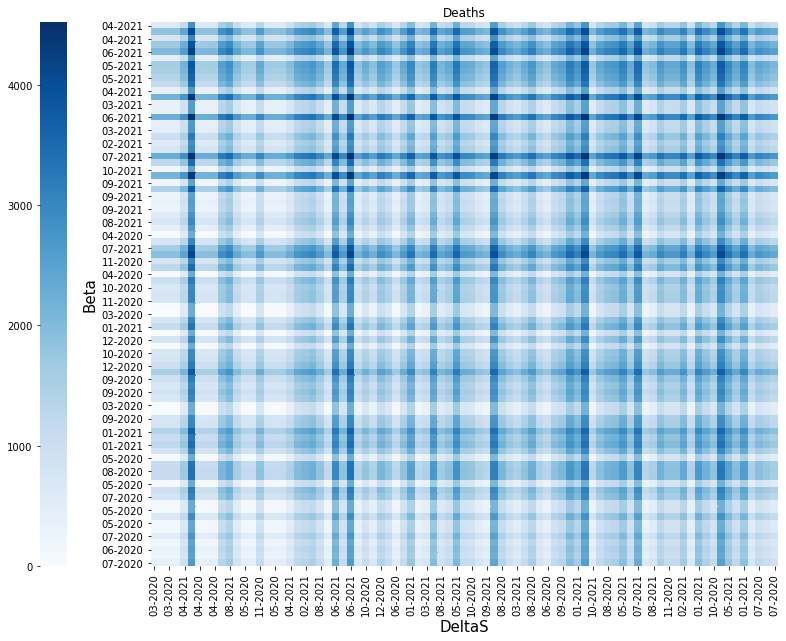

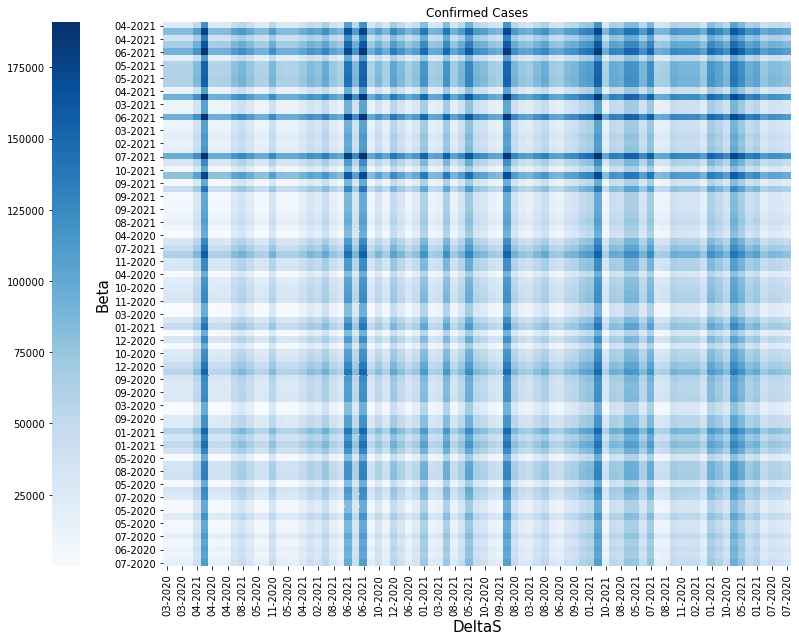

In [56]:
import seaborn as sns
heatD = pd.DataFrame(df3, index=df2.index.strftime('%m-%Y').values, columns=df1.index.strftime('%m-%Y').values)
heatD1 = pd.DataFrame(df3, index=df2['Beta'].values, columns=df1['DeltaS'].values)
fig, ax = plt.subplots(figsize=[15,10])
sns.heatmap(heatD, cmap='Blues', cbar=True,cbar_kws = dict(use_gridspec=False,location="left"), hatch='//')
ax.set_ylabel('Beta', fontsize=15)
ax.set_xlabel('DeltaS', fontsize=15)
plt.title("Deaths")
# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
# sns.heatmap(heatD1, cmap='Blues', cbar_kws = dict(use_gridspec=False,location="left"))
# ax2.set_xticks(ax2.get_xticks())
# ax2.set_xticklabels(df2.index.strftime('%m-%Y').values, fontsize=16)
# ax2.set_ylabel('Beta', fontsize=15)
# ax2.tick_params(axis='y')

plt.show()

heatC = pd.DataFrame(df4, index=df2.index.strftime('%m-%Y').values, columns=df1.index.strftime('%m-%Y').values)
heatC1 = pd.DataFrame(df4, index=df2['Beta'].values, columns=df1['DeltaS'].values)
fig, ax = plt.subplots(figsize=[15,10])
sns.heatmap(heatC, cmap='Blues', cbar=True,cbar_kws = dict(use_gridspec=False,location="left"))
ax.set_ylabel('Beta', fontsize=15)
ax.set_xlabel('DeltaS', fontsize=15)
plt.title("Confirmed Cases")
# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
# sns.heatmap(heatC1, cmap='Blues', linewidths=0.5, cbar_kws = dict(use_gridspec=False,location="left"))
# ax2.set_xticks(ax2.get_xticks())
# ax2.set_xticklabels(df2.index.strftime('%m-%Y').values, fontsize=16)
# ax2.tick_params(axis='y')
# ax2.set_ylabel('Beta', fontsize=15)
plt.show()

In [119]:
x_post_all[:6,:,:,:].shape

(6, 200, 346, 5)

In [18]:
sum(x_post_allV[:6,:,:,:].mean(-1).mean(1)) + sum(x_post_allV[7,:,:,:].mean(-1).mean(1)) + sum(x_post_allV[8:14,:,:,:].mean(-1).mean(1)) + sum(x_post_allV[-1,:,:,:].mean(-1).mean(1))

array([39988531.90114028, 40001075.01211911, 40013585.13641183,
       40025884.45220162, 40037002.52984299, 40048411.37804455,
       40059554.83340178, 40070463.55254363, 40081487.26442986,
       40092394.25302973, 40103567.21231095, 40113846.64773934,
       40126111.82495034, 40137543.45713852, 40149877.80680612,
       40161352.55683969, 40172444.87131684, 40183829.80823343,
       40194829.79029816, 40205308.89121559, 40215030.24182095,
       40223498.52371171, 40230645.85008302, 40237002.00871851,
       40241660.32606886, 40245509.29086298, 40248996.04899638,
       40251525.21393316, 40253882.64345179, 40255888.40377565,
       40257572.48324417, 40258944.26268014, 40260290.65842912,
       40261459.745212  , 40262473.43296523, 40263439.3298261 ,
       40264275.41791706, 40265119.52941328, 40265903.015517  ,
       40266560.47320357, 40267244.80045167, 40267881.22511941,
       40268523.00937164, 40269155.23548951, 40269667.30023161,
       40270341.21036786, 40271005.55329

In [41]:
D_TV

array([ 6775.94045874,  6515.95757479,  6274.92709874,  6042.24792543,
        5809.44303211,  5587.65040442,  5371.67333326,  5160.13269357,
        4957.11482829,  4748.77738307,  4521.36766824,  4320.24064141,
        4130.22075065,  3918.73572701,  3712.53598749,  3496.69769696,
        3301.30050978,  3101.68060526,  2906.57698789,  2717.60799771,
        2533.23883648,  2366.49232346,  2210.08642418,  2069.9727865 ,
        1942.95040754,  1832.34111165,  1735.61205187,  1658.53414822,
        1594.86951439,  1542.14361305,  1489.64172278,  1452.42981484,
        1416.00914313,  1386.71143067,  1360.46088937,  1340.15723201,
        1321.09528057,  1304.88086227,  1290.27964999,  1275.90026684,
        1262.08536397,  1250.36375138,  1239.31561741,  1229.21207936,
        1216.26959713,  1206.93917622,  1196.00843517,  1187.80940025,
        1177.07841848,  1166.27823279,  1156.26234534,  1145.32610384,
        1131.65445765,  1120.06264448,  1112.61563557,  1105.11877915,
      

In [42]:
C_TV

array([ 16540.52739697,  14494.08277344,  12531.04764932,  10635.16618387,
         8919.38597319,   7290.96702245,   5923.02327055,   4709.08324574,
         3713.57120324,   2897.92281523,   2219.76176427,   1680.88209594,
         1265.80965076,    993.29116584,    830.09443524,    695.65397775,
          626.88699085,    597.21022963,    593.54333102,    631.81602699,
          660.65509706,    708.59687579,    805.97714556,    937.51848446,
         1067.85621756,   1222.63324089,   1391.40870615,   1593.17336495,
         1817.52517379,   2057.79636744,   2325.66760566,   2616.85793433,
         2936.98861457,   3286.76216002,   3663.79633894,   4100.01647233,
         4594.45160615,   5165.1720462 ,   5810.00515666,   6553.2607175 ,
         7404.27157476,   8365.13583469,   9419.5634126 ,  10563.9144494 ,
        11841.60269543,  13237.71662373,  14785.16694695,  16468.50553712,
        18297.83626889,  20316.36539691,  22337.51014884,  24344.45990314,
        26387.14568086,  

In [43]:
yV

array([ 0.59034314,  0.55044016,  0.4992496 ,  0.43186145,  0.34867231,
        0.23362012,  0.0930859 , -0.09578286, -0.33486462, -0.63868318,
       -1.03687069, -1.5702223 , -2.26290825, -2.94520344, -3.47242606,
       -4.02648991, -4.26618124, -4.193616  , -3.89699207, -3.30126474,
       -2.83443471, -2.33968777, -1.74212046, -1.20792744, -0.81948691,
       -0.49868419, -0.2473776 , -0.04102553,  0.12250486,  0.25058493,
        0.3594778 ,  0.44497185,  0.5178704 ,  0.57809194,  0.62867453,
        0.6731337 ,  0.71245855,  0.74736933,  0.77792108,  0.80530299,
        0.82954632,  0.85052678,  0.86843173,  0.88364047,  0.89728843,
        0.90882573,  0.91910755,  0.92787388,  0.93567117,  0.94259415,
        0.94823674,  0.95295332,  0.95711342,  0.96091272,  0.96455985,
        0.96821366,  0.97181028,  0.97547281,  0.97925843,  0.98294729,
        0.98648382,  0.98958075,  0.99216398,  0.99414075,  0.99560277,
        0.99655916,  0.99713768,  0.99745896,  0.99763486,  0.99

In [28]:
sum(np.median(np.mean(x_post_all[:,:,-1,:6], -1),1))

39690084.15507849

In [50]:
df_R

mean        median           std        low_50  \
date                                                                 
2020-03-06  5.167087e-01  5.181711e-01  3.236820e-02  4.947632e-01   
2020-03-09  1.086971e+00  1.081899e+00  4.554171e-02  1.057835e+00   
2020-03-11  1.763242e+00  1.762479e+00  5.915347e-02  1.720975e+00   
2020-03-12  2.916846e+00  2.915715e+00  7.838657e-02  2.870169e+00   
2020-03-13  4.975180e+00  4.982295e+00  9.751271e-02  4.917399e+00   
...                  ...           ...           ...           ...   
2021-02-10  2.502783e+07  2.500736e+07  1.396944e+06  2.412592e+07   
2021-02-11  2.518857e+07  2.518601e+07  1.384213e+06  2.427319e+07   
2021-02-12  2.514245e+07  2.513139e+07  1.385969e+06  2.424340e+07   
2021-02-13  2.528106e+07  2.525789e+07  1.376324e+06  2.436730e+07   
2021-02-14  2.533684e+07  2.534997e+07  1.368232e+06  2.443952e+07   

                 high_50        low_80       high_80        low_95  \
date                                                                 
2020-03-06  5.367895e-01  4.747561e-01  5.557991e-01  4.534312e-01   
2020-03-09  1.113775e+00  1.036318e+00  1.144058e+00  1.010433e+00   
2020-03-11  1.800616e+00  1.682283e+00  1.837328e+00  1.644302e+00   
2020-03-12  2.968548e+00  2.820935e+00  3.013426e+00  2.750716e+00   
2020-03-13  5.029291e+00  4.854950e+00  5.086719e+00  4.764363e+00   
...                  ...           ...           ...           ...   
2021-02-10  2.603424e+07  2.308252e+07  2.669914e+07  2.219503e+07   
2021-02-11  2.622307e+07  2.326582e+07  2.682875e+07  2.236158e+07   
2021-02-12  2.615570e+07  2.323276e+07  2.682141e+07  2.227361e+07   
2021-02-13  2.634893e+07  2.339987e+07  2.694963e+07  2.239992e+07   
2021-02-14  2.634982e+07  2.345583e+07  2.699263e+07  2.247974e+07   

                 high_95      type  
date                                
2020-03-06  5.758708e-01  estimate  
2020-03-09  1.181845e+00  estimate  
2020-03-11  1.877949e+00  estimate  
2020-03-12  3.064178e+00  estimate  
2020-03-13  5.196122e+00  estimate  
...                  ...       ...  
2021-02-10  2.750245e+07  estimate  
2021-02-11  2.761788e+07  estimate  
2021-02-12  2.755001e+07  estimate  
2021-02-13  2.775600e+07  estimate  
2021-02-14  2.779335e+07  estimate  

[344 rows x 10 columns]

In [ ]:
100950.002884
20472.168114

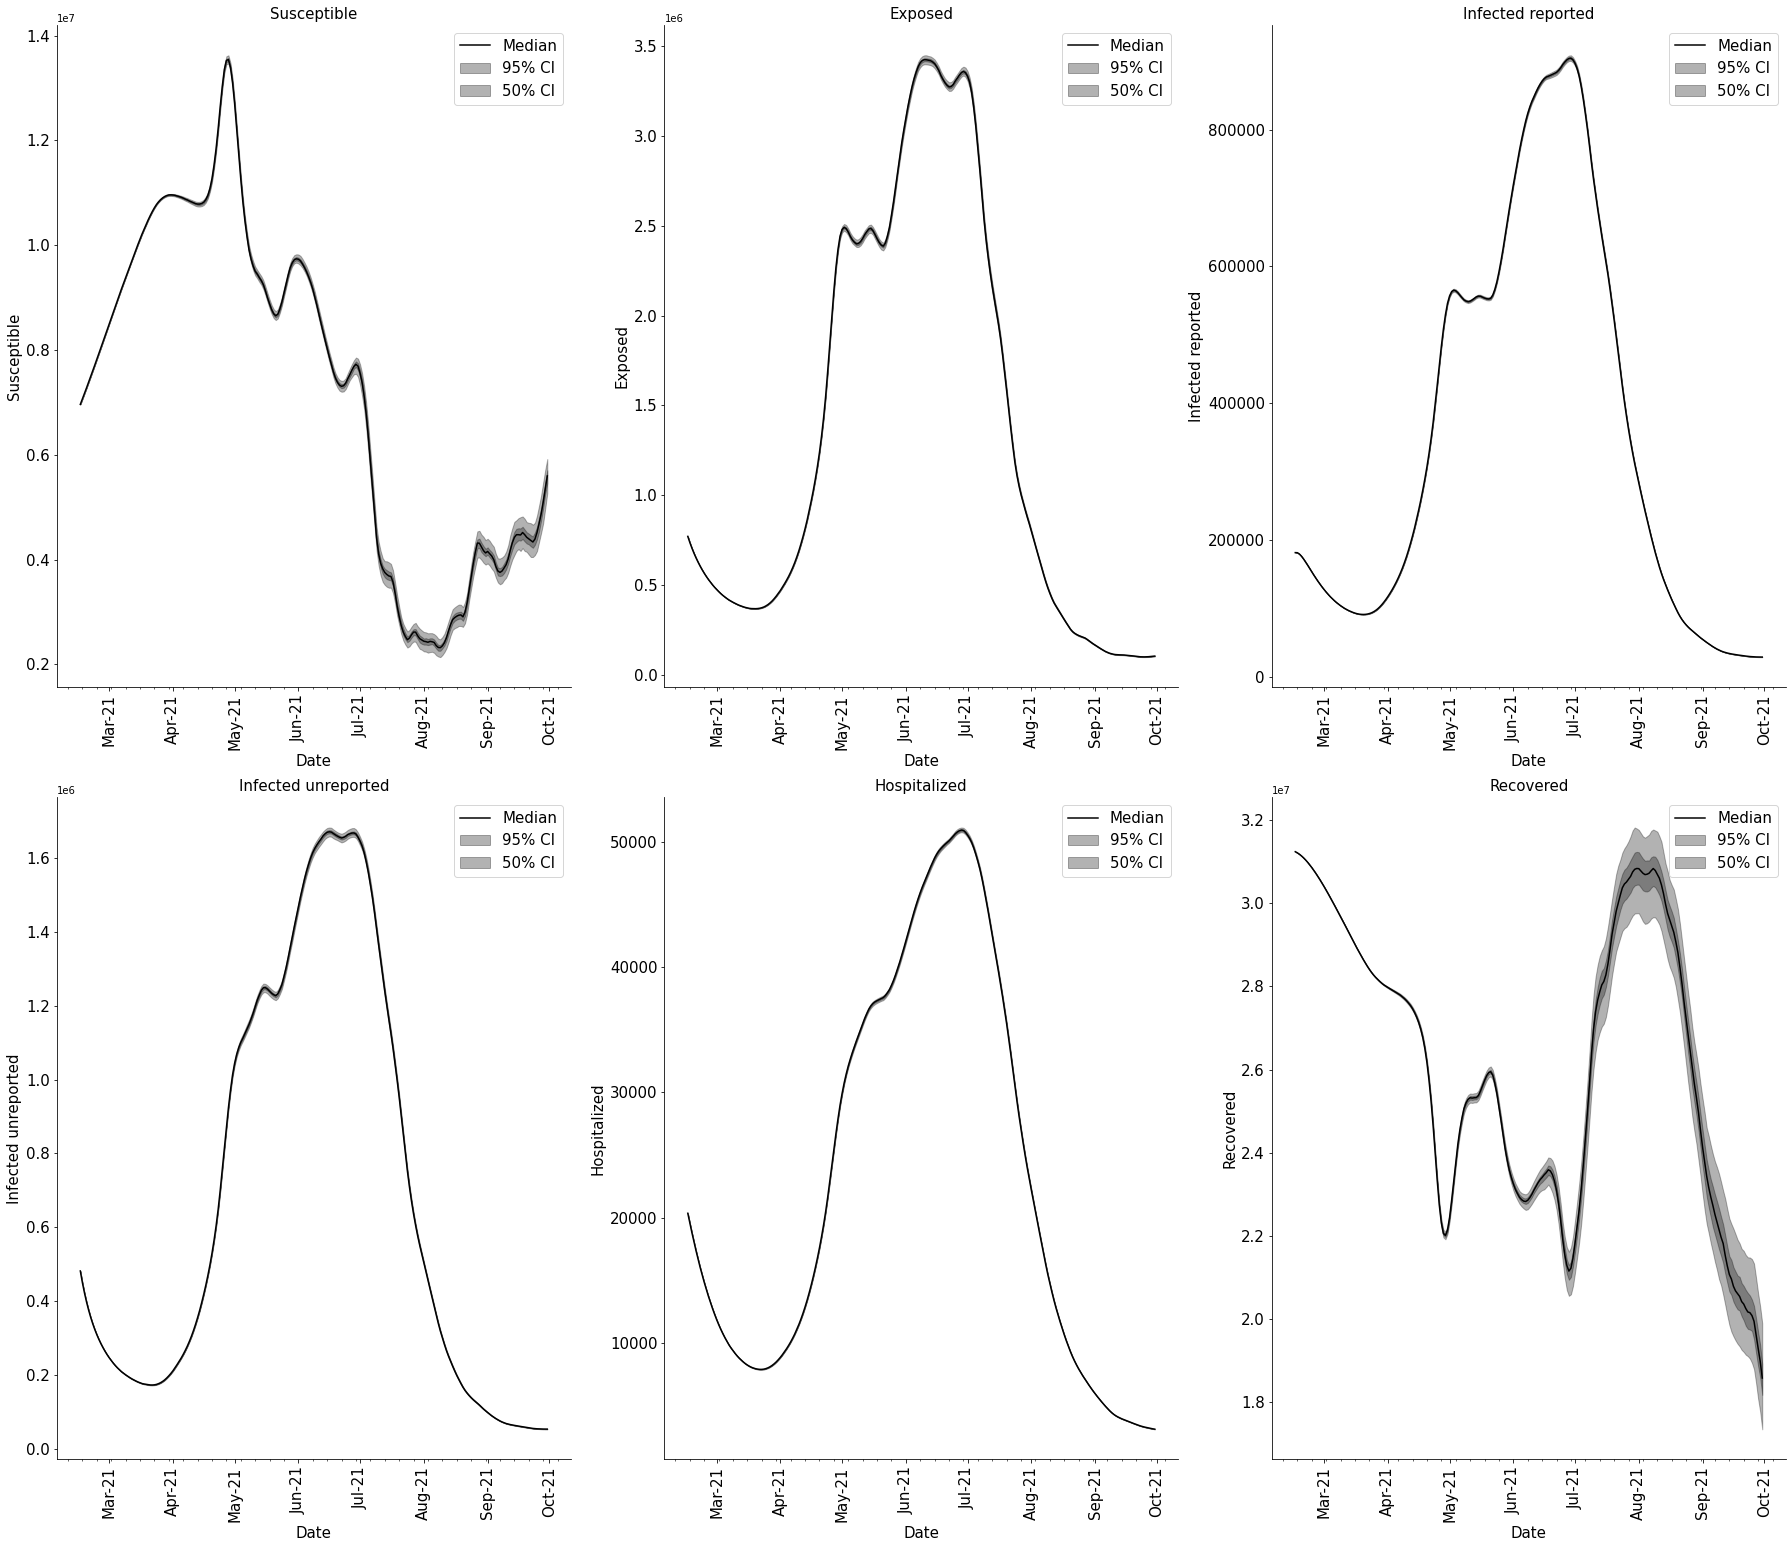

In [426]:
S_time = np.mean(x_post_allV[0,:,:228,:6], -1)
E_time = np.mean(x_post_allV[1,:,:228,:6], -1)
Ir_time = np.mean(x_post_allV[2,:,:228,:6], -1)
Iu_time = np.mean(x_post_allV[3,:,:228,:6], -1)
Ih_time = np.mean(x_post_allV[4,:,:228,:6], -1)
R_time = np.mean(x_post_allV[5,:,:228,:6], -1)
H_time = np.mean(x_post_allV[6,:,:228,:6], -1)
C_time = np.mean(x_post_allV[7,:,:228,:6], -1)
D_time = np.mean(x_post_allV[8,:,:228,:6], -1)

df_S  = create_df_response(S_time, time=num_stepsV, dates =dates_assimilationV)
df_E  = create_df_response(E_time, time=num_stepsV, dates =dates_assimilationV)
df_Ir  = create_df_response(Ir_time, time=num_stepsV, dates =dates_assimilationV)
df_Iu  = create_df_response(Iu_time, time=num_stepsV, dates =dates_assimilationV)
df_Ih  = create_df_response(Ih_time, time=num_stepsV, dates =dates_assimilationV)
df_R  = create_df_response(R_time, time=num_stepsV, dates =dates_assimilationV)
df_H  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_C  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_D  = create_df_response(D_time, time=num_stepsV, dates =dates_assimilationV)

#---------------------------------------------------------------

fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='k', label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("Susceptible", fontsize=15)
ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='k', label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("Exposed", fontsize=15)
ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='k', label='Median')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reported", fontsize=15)
ax[0,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='k', label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreported", fontsize=15)
ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='k', label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Deaths", fontsize=15)
ax[1,1].set_title("Deaths", fontsize=15)
ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='k', label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("Recovered", fontsize=15)
ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

In [422]:
x_post_allV[9,:,:,:6].shape

(200, 255, 4)

In [425]:
num_stepsV

228

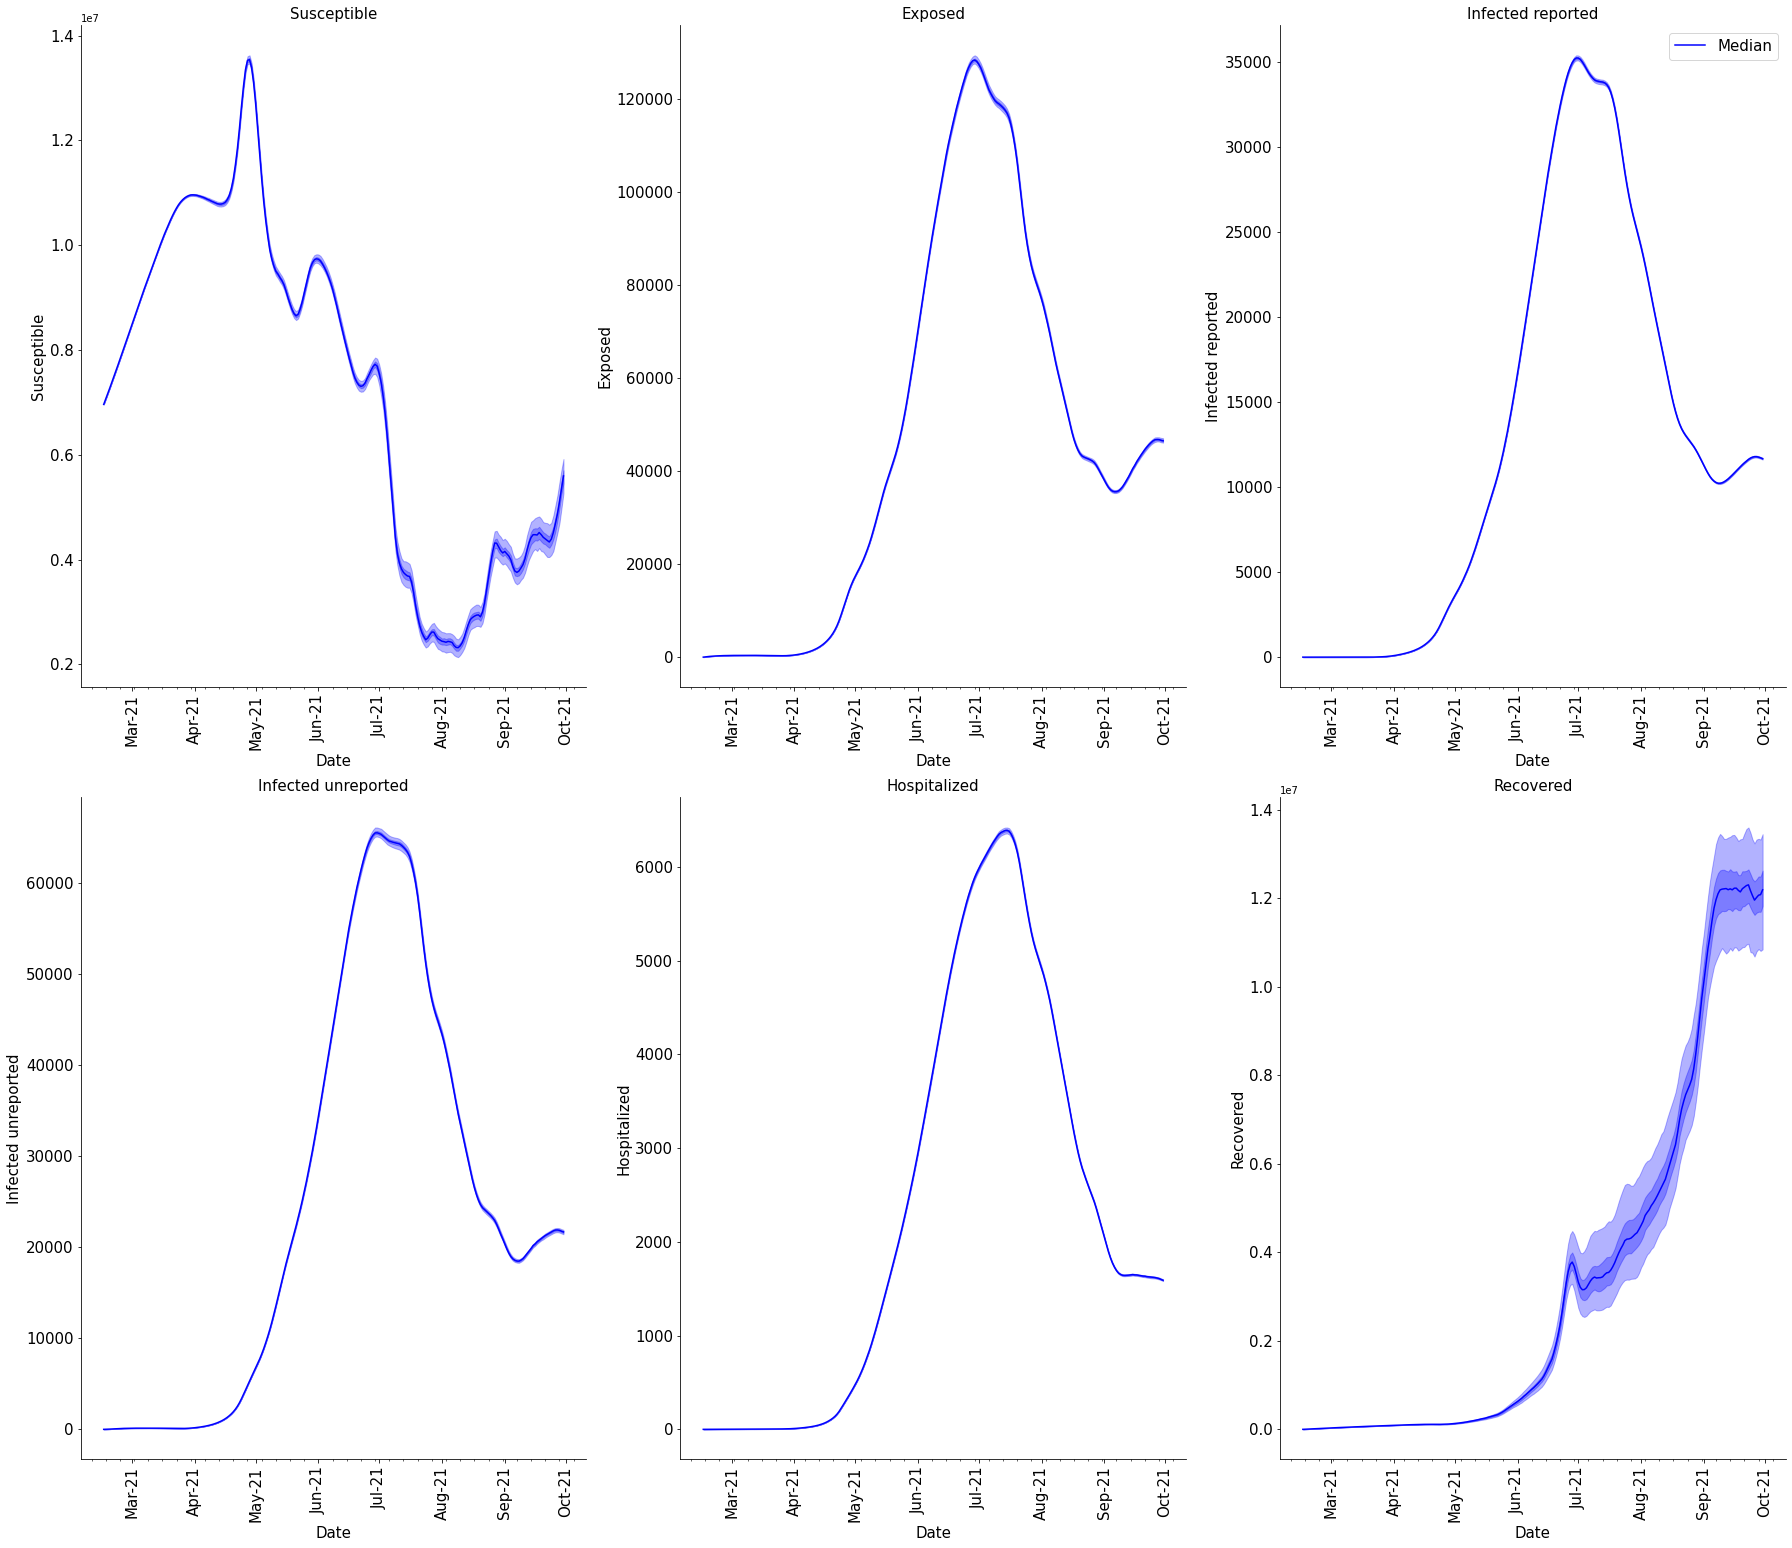

In [434]:
S_time = np.mean(x_post_allV[8,:,:228,:6], -1)
E_time = np.mean(x_post_allV[9,:,:228,:6], -1)
Ir_time = np.mean(x_post_allV[10,:,:228,:6], -1)
Iu_time = np.mean(x_post_allV[11,:,:228,:6], -1)
Ih_time = np.mean(x_post_allV[12,:,:228,:6], -1)
R_time = np.mean(x_post_allV[13,:,:228,:6], -1)
# H_time = np.mean(x_post_allV[15,:,:228,:6], -1)
C_time = np.mean(x_post_allV[14,:,:228,:6], -1)
D_time = np.mean(x_post_allV[15,:,:228,:6], -1)

df_SV  = create_df_response(S_time, time=num_stepsV, dates =dates_assimilationV)
df_E  = create_df_response(E_time, time=num_stepsV, dates =dates_assimilationV)
df_Ir  = create_df_response(Ir_time, time=num_stepsV, dates =dates_assimilationV)
df_Iu  = create_df_response(Iu_time, time=num_stepsV, dates =dates_assimilationV)
df_Ih  = create_df_response(Ih_time, time=num_stepsV, dates =dates_assimilationV)
df_R  = create_df_response(R_time, time=num_stepsV, dates =dates_assimilationV)
df_H  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_C  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_D  = create_df_response(D_time, time=num_stepsV, dates =dates_assimilationV)

#---------------------------------------------------------------

fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='b', label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='b', alpha=0.3, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='b', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("Susceptible", fontsize=15)
# ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='b', label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='b', alpha=0.3, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='b', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("Exposed", fontsize=15)
# ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='b', label='Median')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='b', alpha=0.3)#, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='b', alpha=0.3)#, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reported", fontsize=15)
ax[0,2].legend(fontsize=15, loc='best')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='b', label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='b', alpha=0.3, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='b', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreported", fontsize=15)
# ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='b', label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='b', alpha=0.3, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='b', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Hospitalized", fontsize=15)
ax[1,1].set_title("Hospitalized", fontsize=15)
# ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='b', label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='b', alpha=0.3, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='b', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("Recovered", fontsize=15)
# ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

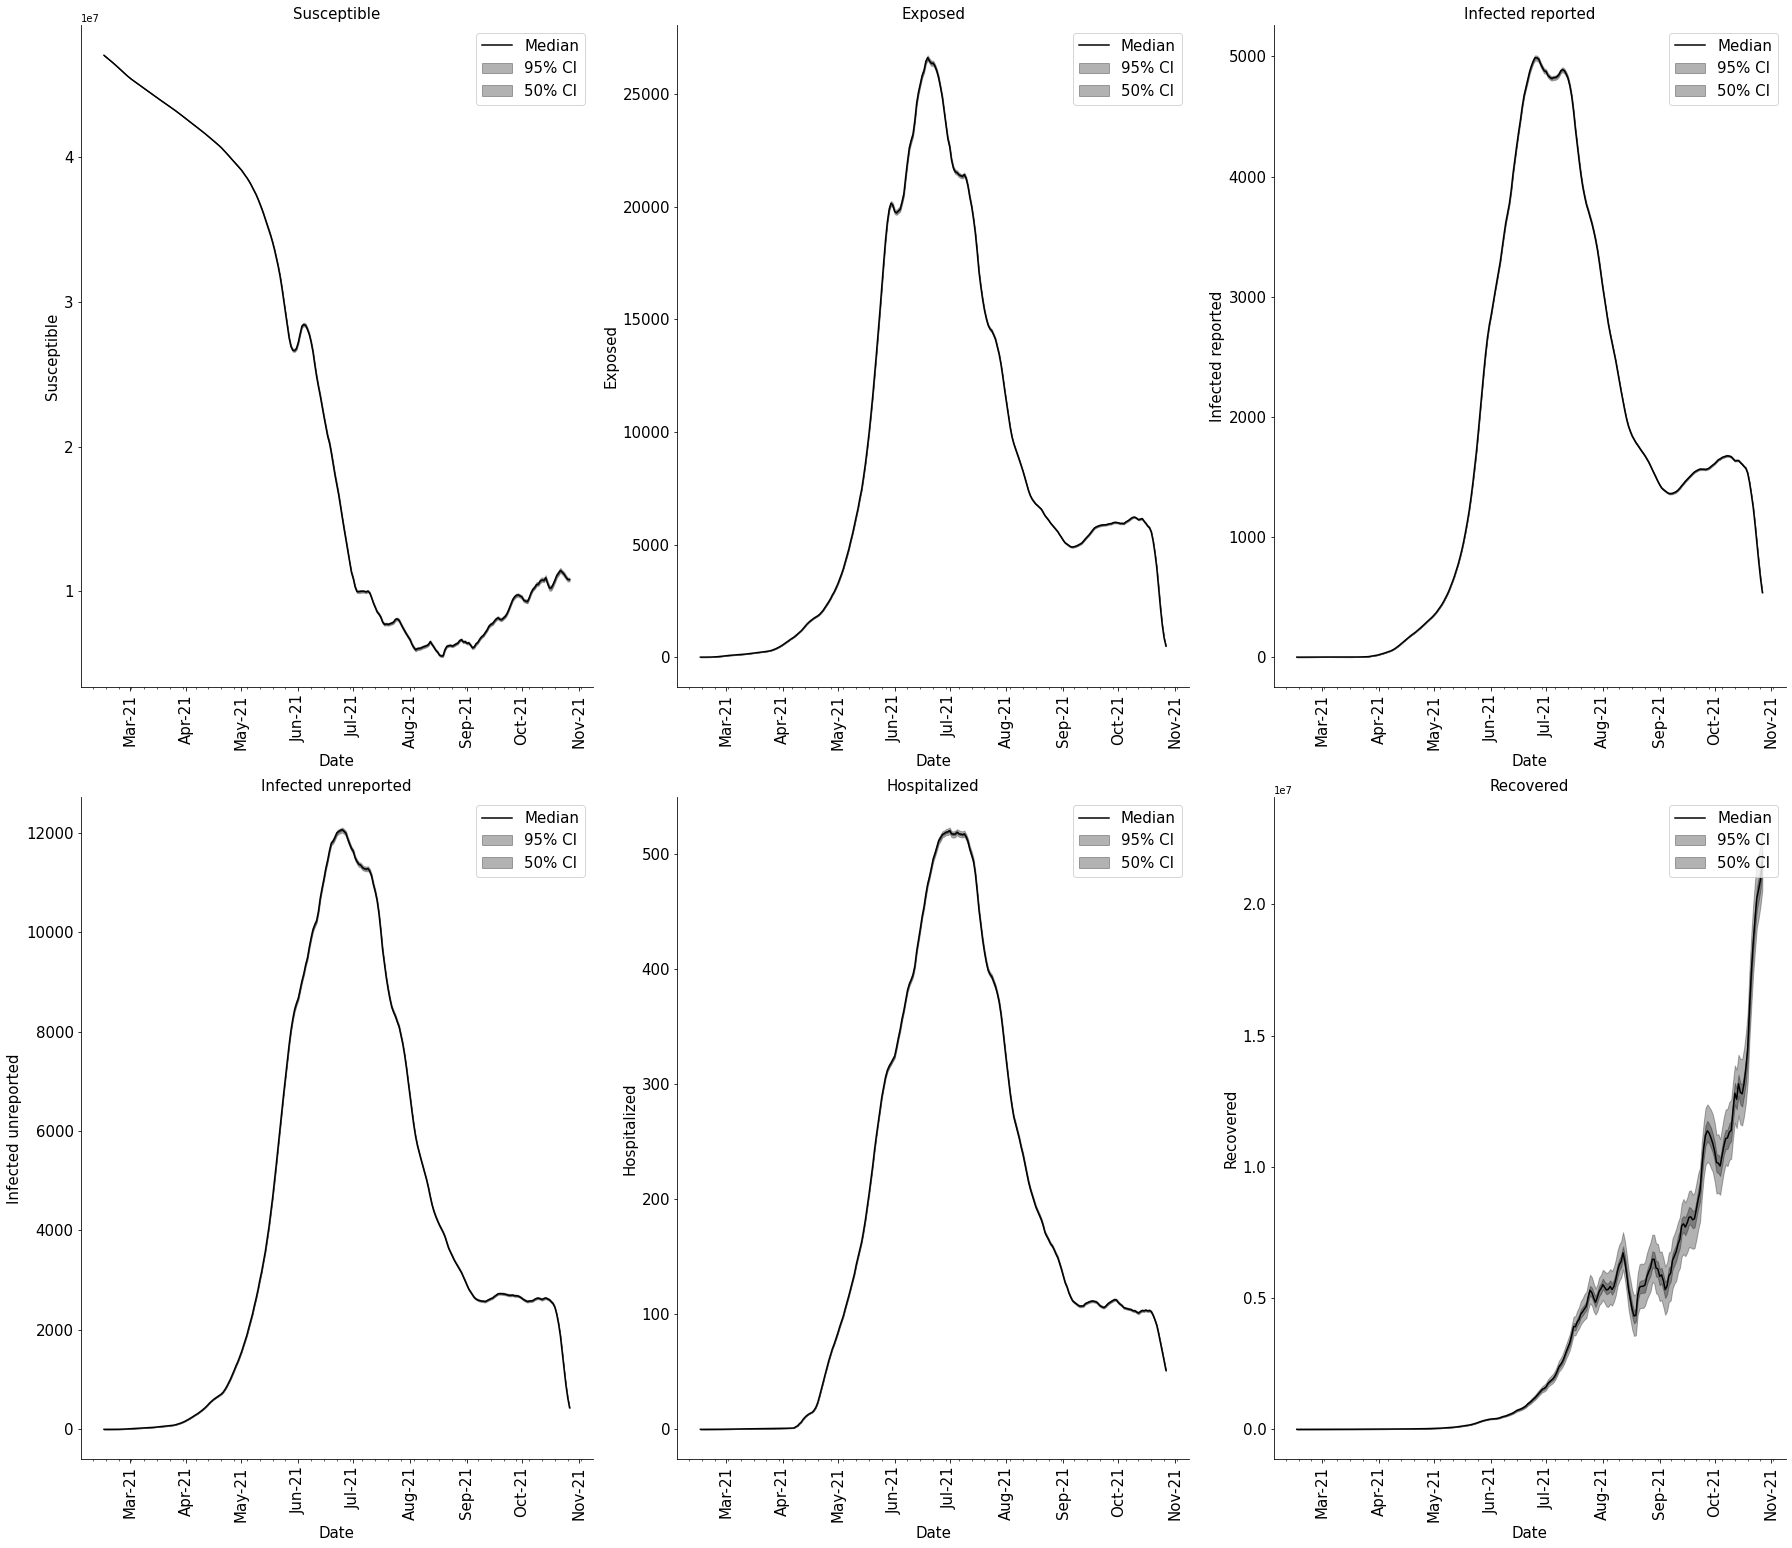

In [44]:
S_time = np.mean(x_post_allV[18,:,:,:6], -1)
E_time = np.mean(x_post_allV[19,:,:,:6], -1)
Ir_time = np.mean(x_post_allV[20,:,:,:6], -1)
Iu_time = np.mean(x_post_allV[21,:,:,:6], -1)
Ih_time = np.mean(x_post_allV[22,:,:,:6], -1)
R_time = np.mean(x_post_allV[23,:,:,:6], -1)
H_time = np.mean(x_post_allV[24,:,:,:6], -1)
C_time = np.mean(x_post_allV[25,:,:,:6], -1)
D_time = np.mean(x_post_allV[26,:,:,:6], -1)

df_SV  = create_df_response(S_time, time=num_stepsV, dates =dates_assimilationV)
df_E  = create_df_response(E_time, time=num_stepsV, dates =dates_assimilationV)
df_Ir  = create_df_response(Ir_time, time=num_stepsV, dates =dates_assimilationV)
df_Iu  = create_df_response(Iu_time, time=num_stepsV, dates =dates_assimilationV)
df_Ih  = create_df_response(Ih_time, time=num_stepsV, dates =dates_assimilationV)
df_R  = create_df_response(R_time, time=num_stepsV, dates =dates_assimilationV)
df_H  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_C  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_D  = create_df_response(D_time, time=num_stepsV, dates =dates_assimilationV)

#---------------------------------------------------------------

fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='k', label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("Susceptible", fontsize=15)
ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='k', label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("Exposed", fontsize=15)
ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='k', label='Median')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reported", fontsize=15)
ax[0,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='k', label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreported", fontsize=15)
ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='k', label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Hospitalized", fontsize=15)
ax[1,1].set_title("Hospitalized", fontsize=15)
ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='k', label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("Recovered", fontsize=15)
ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

In [105]:
df_S+df_R+df_SV

mean        median           std        low_50  \
date                                                                 
2021-02-15  3.062279e+07  3.062279e+07  2.459888e+01  3.062278e+07   
2021-02-16  3.062324e+07  3.062324e+07  3.453667e+01  3.062321e+07   
2021-02-17  3.062377e+07  3.062377e+07  4.647155e+01  3.062374e+07   
2021-02-18  3.062443e+07  3.062443e+07  5.471525e+01  3.062439e+07   
2021-02-19  3.062519e+07  3.062519e+07  6.454269e+01  3.062514e+07   
...                  ...           ...           ...           ...   
2021-10-23  5.732677e+07  5.737728e+07  1.738986e+06  5.621888e+07   
2021-10-24  5.715249e+07  5.720500e+07  1.744503e+06  5.602342e+07   
2021-10-25  5.662025e+07  5.668596e+07  1.753468e+06  5.547420e+07   
2021-10-26  5.648719e+07  5.656065e+07  1.753257e+06  5.530442e+07   
2021-10-27  5.582703e+07  5.591283e+07  1.746401e+06  5.464374e+07   

                 high_50        low_80       high_80        low_95  \
date                                                                 
2021-02-15  3.062281e+07  3.062276e+07  3.062283e+07  3.062275e+07   
2021-02-16  3.062326e+07  3.062319e+07  3.062328e+07  3.062317e+07   
2021-02-17  3.062381e+07  3.062371e+07  3.062383e+07  3.062368e+07   
2021-02-18  3.062448e+07  3.062436e+07  3.062451e+07  3.062434e+07   
2021-02-19  3.062524e+07  3.062511e+07  3.062527e+07  3.062508e+07   
...                  ...           ...           ...           ...   
2021-10-23  5.845862e+07  5.509791e+07  5.950773e+07  5.414113e+07   
2021-10-24  5.829331e+07  5.491561e+07  5.937015e+07  5.390780e+07   
2021-10-25  5.775458e+07  5.437698e+07  5.881005e+07  5.338746e+07   
2021-10-26  5.761439e+07  5.423889e+07  5.873312e+07  5.322995e+07   
2021-10-27  5.694714e+07  5.357177e+07  5.805061e+07  5.261934e+07   

                 high_95                      type  
date                                                
2021-02-15  3.062284e+07  estimateestimateestimate  
2021-02-16  3.062330e+07  estimateestimateestimate  
2021-02-17  3.062386e+07  estimateestimateestimate  
2021-02-18  3.062453e+07  estimateestimateestimate  
2021-02-19  3.062531e+07  estimateestimateestimate  
...                  ...                       ...  
2021-10-23  6.057873e+07  estimateestimateestimate  
2021-10-24  6.044867e+07  estimateestimateestimate  
2021-10-25  6.000863e+07  estimateestimateestimate  
2021-10-26  5.984689e+07  estimateestimateestimate  
2021-10-27  5.912891e+07  estimateestimateestimate  

[255 rows x 10 columns]

In [24]:
from scipy.interpolate import UnivariateSpline
IFR_Verity = [ .00161, .00695, .0309, .0844, .161, .595, 1.93, 4.28, 7.80 ]
ifr_log    = np.log(IFR_Verity)

IFR = np.zeros((80))

ages_fit   = [9, 19, 29, 39, 49, 59, 69, 79, 89]
ifr_fitted = UnivariateSpline(ages_fit, ifr_log)

x = np.arange(0, 90, 1)
fitted_ifr = ifr_fitted(x)

ages_models = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
# Create IFR every 5 years
ifr = np.exp([fitted_ifr[0:6].mean(),fitted_ifr[6:11].mean(),fitted_ifr[11:16].mean(),fitted_ifr[16:21].mean(),
       fitted_ifr[21:26].mean(),fitted_ifr[27:31].mean(),fitted_ifr[31:36].mean(),fitted_ifr[37:41].mean(),
       fitted_ifr[41:46].mean(),fitted_ifr[47:51].mean(),fitted_ifr[51:56].mean(),fitted_ifr[56:61].mean(),
       fitted_ifr[61:66].mean(),fitted_ifr[67:71].mean(),fitted_ifr[71:76].mean(),fitted_ifr[76:].mean()])

In [25]:
ifr_age = np.exp([fitted_ifr[0:21].mean(),fitted_ifr[21:41].mean(),fitted_ifr[41:51].mean(),fitted_ifr[51:61].mean(),
       fitted_ifr[61:71].mean(),fitted_ifr[71:].mean()])/100
ifr_age

array([1.94020721e-05, 2.91537150e-04, 1.60945649e-03, 4.46947310e-03,
       1.15454911e-02, 4.10710609e-02])

In [26]:
Rt_age = np.zeros((6,200,346))
for i in range(6):
    Rt_age[i,:,:] =beta_time*(1-ifr_age[i])*(1/0.25)*(alphas_time[i,:,:]+(0.5*(1-alphas_time[i,:,:])))

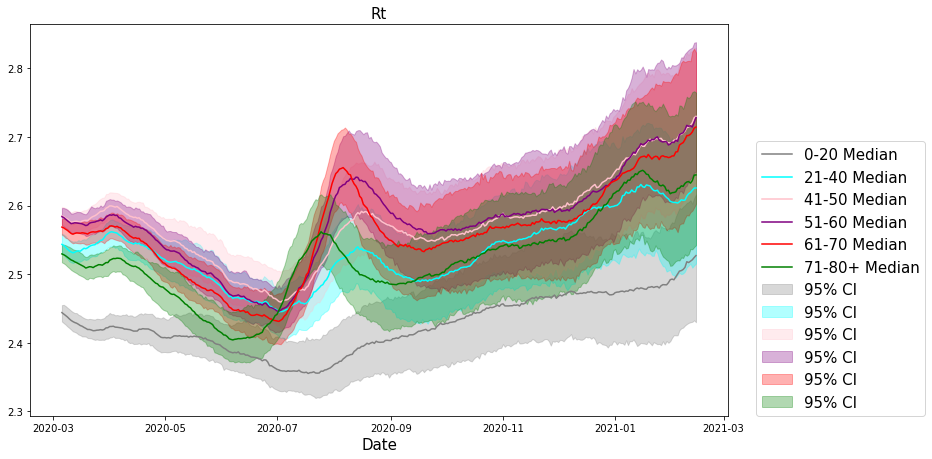

In [27]:
df_Rt0   = create_df_response(Rt_age[0,:,:], time=num_steps, dates =dates_assimilation)
df_Rt1   = create_df_response(Rt_age[1,:,:], time=num_steps, dates =dates_assimilation)
df_Rt2   = create_df_response(Rt_age[2,:,:], time=num_steps, dates =dates_assimilation)
df_Rt3   = create_df_response(Rt_age[3,:,:], time=num_steps, dates =dates_assimilation)
df_Rt4   = create_df_response(Rt_age[4,:,:], time=num_steps, dates =dates_assimilation)
df_Rt5   = create_df_response(Rt_age[5,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))

ax.plot(df_Rt0.index.values, df_Rt0["median"], color='gray', label='0-20 Median')
ax.fill_between(df_Rt0.index.values, df_Rt0["high_95"], df_Rt0["low_95"], color='gray', alpha=0.3, label='95% CI')

ax.plot(df_Rt1.index.values, df_Rt1["median"], color='cyan', label='21-40 Median')
ax.fill_between(df_Rt1.index.values, df_Rt1["high_95"], df_Rt1["low_95"], color='cyan', alpha=0.3, label='95% CI')

ax.plot(df_Rt2.index.values, df_Rt2["median"], color='pink', label='41-50 Median')
ax.fill_between(df_Rt2.index.values, df_Rt2["high_95"], df_Rt2["low_95"], color='pink', alpha=0.3, label='95% CI')

ax.plot(df_Rt3.index.values, df_Rt3["median"], color='purple', label='51-60 Median')
ax.fill_between(df_Rt3.index.values, df_Rt3["high_95"], df_Rt3["low_95"], color='purple', alpha=0.3, label='95% CI')

ax.plot(df_Rt4.index.values, df_Rt4["median"], color='red', label='61-70 Median')
ax.fill_between(df_Rt4.index.values, df_Rt4["high_95"], df_Rt4["low_95"], color='red', alpha=0.3, label='95% CI')

ax.plot(df_Rt5.index.values, df_Rt5["median"], color='green', label='71-80+ Median')
ax.fill_between(df_Rt5.index.values, df_Rt5["high_95"], df_Rt5["low_95"], color='green', alpha=0.3, label='95% CI')

ax.set_xlabel("Date", fontsize=15)
# ax.set_ylabel(r"$\alpha$", fontsize=15)
ax.set_title("Rt", fontsize=15)
ax.legend(fontsize=15, loc=(1.04,0))

# Ultima pasada por eakf

In [13]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker
from scipy.stats import truncnorm
from tqdm import tqdm

import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import math
import sys
import os

sys.path.insert(0, '..')

from functions.adjust_cases_functions import prepare_cases, smooth_1d

In [14]:
# read population
pop_dist_df = pd.read_csv(os.path.join('data/population.csv'))
bog_pop_df = pop_dist_df[pop_dist_df["poly_id"]==11001].dropna()
pop        = bog_pop_df["attr_pop"]

# read contact matrices
ages_keys =["1-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40",
            "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80+"]

contact_matrices_df = pd.read_excel(os.path.join("contact_matrices/MUestimates_all_locations_1.xlsx"), sheet_name="Colombia")
contact_matrices_df = contact_matrices_df.rename(columns={k: ages_keys[idx] for idx, k in enumerate(contact_matrices_df.keys()) })
contact_matrices_df.index = ages_keys
contact_matrices_df = contact_matrices_df.loc[np.flip(ages_keys)]
Cij = contact_matrices_df.loc[ages_keys].T
Cij = Cij.to_numpy()

# normalize contact matrix
for age_idx in range(Cij.shape[0]):
    Cij[age_idx,:] = Cij[age_idx,:] / np.sum(Cij[age_idx,:])

# read cases by age without filtering
# previously group them in the ages of interest.
age_cases_df     = pd.read_csv(os.path.join('data/cases_ages_grouped.csv'), parse_dates=["date_time"]).rename(columns={"date_time": "date", "num_cases": "confirmed", "num_diseased": "deaths"})
bog_age_cases_df = age_cases_df[age_cases_df.poly_id==11001][["age_group", "date", "confirmed", "deaths"]]
bog_cases_df     = bog_age_cases_df.set_index(["age_group", "date"])#bog_age_cases_df[bog_age_cases_df["age_group"]=="agg"].set_index(["age_group", "date"])
bog_cases_df1     = bog_cases_df.unstack([0]).resample('1D').sum().stack().reset_index() # Resample cases at weekly (sunday)

dates_inference = bog_cases_df1["date"].unique()

dict_map = {'0-20': (0, 20), '21-40': (21, 40), '41-50': (41, 50),
           '51-60': (51, 60), '61-70': (60, 69), '71-80+': (71, 200)}

bog_smoothed_df = []
for i in dict_map.keys():
    bog_cases_df =  prepare_cases(bog_cases_df1[bog_cases_df1['age_group']==i], col="confirmed")
    bog_cases_df =  prepare_cases(bog_cases_df[bog_cases_df['age_group']==i], col="deaths")
    bog_smoothed_df.append(bog_cases_df)

bog_smoothed_df = pd.concat(bog_smoothed_df)

C:\Users\Windows\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Windows\OneDrive - Universidad de los Andes\X Semestre\Covid\Covid19_Age\functions\adjust_cases_functions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_cases[out_col] = daily_cases[col].rolling(window=7,
C:\Users\Windows\OneDrive - Universidad de los Andes\X Semestre\Covid\Covid19_Age\functions\adjust_cases_functions.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [15]:
from scipy.interpolate import UnivariateSpline
IFR_Verity = [ .00161, .00695, .0309, .0844, .161, .595, 1.93, 4.28, 7.80 ]
ifr_log    = np.log(IFR_Verity)

IFR = np.zeros((80))

ages_fit   = [9, 19, 29, 39, 49, 59, 69, 79, 89]
ifr_fitted = UnivariateSpline(ages_fit, ifr_log)

x = np.arange(0, 90, 1)
fitted_ifr = ifr_fitted(x)

ages_models = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
# Create IFR every 5 years
ifr = np.exp([fitted_ifr[0:6].mean(),fitted_ifr[6:11].mean(),fitted_ifr[11:16].mean(),fitted_ifr[16:21].mean(),
       fitted_ifr[21:26].mean(),fitted_ifr[27:31].mean(),fitted_ifr[31:36].mean(),fitted_ifr[37:41].mean(),
       fitted_ifr[41:46].mean(),fitted_ifr[47:51].mean(),fitted_ifr[51:56].mean(),fitted_ifr[56:61].mean(),
       fitted_ifr[61:66].mean(),fitted_ifr[67:71].mean(),fitted_ifr[71:76].mean(),fitted_ifr[76:].mean()])/100 #%

In [16]:
priors_range_dict  = {}
priors_range_dict["beta"]  = [0.8, 1.5]        # Contact rate range
priors_range_dict["alpha"] = [0.01, 1]         # Report rate range [1% - 100%]

dict_map = {'0-20': (0, 20), '21-40': (21, 40), '41-50': (41, 50),
           '51-60': (51, 60), '61-70': (60, 69), '71-80+': (71, 200)}

date_init  = pd.to_datetime("2020-03-06")
date_end   = pd.to_datetime("2021-02-14")

dates_week = pd.date_range(start=date_init, end=date_end, freq='1D')
dates      = pd.date_range(start=date_init, end=dates_week[-1], freq='1D')

num_steps = len(dates_week)

lambda_inf    = 1.1
num_iters_mif = 350
alpha_mif     = 0.9 # Variance shrinking factor
num_ensembles = 200
num_age_groups_t = len(ages_keys) # number of total groups
num_age_groups_i = len(dict_map) # number of interest groups

obs_df = bog_smoothed_df
obs_df = obs_df[obs_df["date"].isin(dates)]      # keep only in defined dates
obs_df = obs_df.set_index(["date", "age_group"])

# resample weekly and by age group
obs_w_df = obs_df.groupby([pd.Grouper(level='date', freq='W-Sun'),pd.Grouper(level='age_group')]).sum()

oev_df         = pd.DataFrame(columns=["date", "age_group", "OEV_confirmed", "OEV_deaths"])
oev_df["date"] = obs_df.index.get_level_values(0)
oev_df["age_group"] = obs_df.index.get_level_values(1)
oev_df         = oev_df.set_index(["date", 'age_group'])
oev_df["OEV_confirmed"] = np.maximum(1e-4, obs_df["confirmed"].values**2/100 )
oev_df["OEV_deaths"]    = np.maximum(25, obs_df["deaths"].values**2/100 )


oev_w_df         = pd.DataFrame(columns=["date", "age_group", "OEV_confirmed", "OEV_deaths"])
oev_w_df["date"] = obs_w_df.index.get_level_values(0)
oev_w_df["age_group"] = obs_w_df.index.get_level_values(1)
oev_w_df         = oev_w_df.set_index(["date", 'age_group'])
oev_w_df["OEV_confirmed"] = np.maximum(1e-4, obs_w_df["confirmed"].values**2/100 )
oev_w_df["OEV_deaths"]    = np.maximum(25*7, obs_w_df["deaths"].values**2/100 )

######## INFERENCE  SETTINGS ########
# Range of parameters
beta_prior_dict       = {"beta": priors_range_dict["beta"]}
param_range_beta = np.array([v for k, v in beta_prior_dict.items()])
std_param_beta   = param_range_beta[:,1]-param_range_beta[:,0]
SIG_beta         = std_param_beta ** 2 / 4; #  initial covariance of parameters

alpha_prior_dict       = {f"alpha_{idx_age}": priors_range_dict["alpha"] for idx_age in range(num_age_groups_i)}
param_range_alpha = np.array([v for k, v in alpha_prior_dict.items()])
std_param_alpha   = param_range_alpha[:,1]-param_range_alpha[:,0]
SIG_alpha         = std_param_alpha ** 2 / 4; #  initial covariance of parameters

In [17]:
def eakf_step_age(x_prior, beta_prior, alpha_prior, obs_ens_time, obs_time, oev_time, num_var=8):
    # beta_prior: Prior with the contact rate. Shape [1, num_ensembles]
    # alpha_prior: Prior with the report rates. Shape [num_ages, num_ensembles]
#x_prior, beta_prior, alpha_prior, obs_ens_time, obs_time, oev_time = x_age, beta_post, alpha_post, np.squeeze(deaths_t), deaths_time, oev_deaths_time

    prior_mean_ct = obs_ens_time.mean(-1)
    prior_var_ct  = obs_ens_time.var(-1)

    # Correct degenerate prior
    idx_degenerate_prior = np.where(prior_var_ct==0)[0]
    prior_var_ct[idx_degenerate_prior] = 1e-3

    post_var_ct  = prior_var_ct * oev_time / (prior_var_ct + oev_time)
    post_mean_ct = post_var_ct * (prior_mean_ct/prior_var_ct + obs_time / oev_time)
    alpha        = oev_time / (oev_time+prior_var_ct); alpha = alpha**0.5
    dy           = np.array([post_mean_ct[i] + alpha[i]*(obs_ens_time[i,:]-prior_mean_ct[i]) - obs_ens_time[i,:] for i in range(len(prior_mean_ct))])

    # adjust ascertainment rates (alpha)
    rr_age = []
    for idx_a in range(len(prior_mean_ct)):
        rr = []
        for idx_o in range(len(prior_mean_ct)):
            A = np.cov(alpha_prior[idx_a,:], obs_ens_time[idx_o,:])
            rr.append( A[1,0] / prior_var_ct[idx_o] )
        rr_age.append(rr)

    rr         = np.array(rr_age)
    dx = []
    for idx_age in range(len(prior_mean_ct)):
        dx.append(np.array([np.dot( np.expand_dims(rr[idx_age,idx_obs],-1), np.expand_dims(dy[idx_obs,:], 0)) for idx_obs in range(len(prior_mean_ct))]))

    dx = np.array(dx)
    dx = dx.mean(1) # Average over the observation space (num_ages)

    alpha_post = np.array([alpha_prior[i,:] + dx[i,:] for i in range(len(prior_mean_ct))])

    # adjust contact rate (beta)
    rr = []
    #for idx_p, p in enumerate(dict_params_range.keys()):
    for idx_o in range(len(prior_mean_ct)):
        A = np.cov(beta_prior[0,:], obs_ens_time[idx_o,:])
        rr.append( A[1,0] / prior_var_ct[idx_o] )
    rr         = np.array(rr)

    dx = np.array([np.dot( np.expand_dims(rr[idx_obs],-1), np.expand_dims(dy[idx_obs,:], 0)) for idx_obs in range(len(prior_mean_ct))])
    dx = np.array(dx)
    dx = dx.mean(0) # Average over the observation space (num_ages)
    beta_post = beta_prior + dx

    # adjust variables
    rr_age = []
    for idx_a in range(x_prior.shape[0]):
        rr = []
        for idx_var in range(num_var):
            rr_o = []
            for idx_o in range(len(prior_mean_ct)):
                A = np.cov(x_prior[idx_a,idx_var,:], obs_ens_time[idx_o,:])
                rr_o.append( A[1,0] / prior_var_ct[idx_o] )
            rr.append(rr_o)
        rr_age.append(rr)
    rr       = np.array(rr_age)

    dx = []
    for i in range(x_prior.shape[0]):
        dx.append(np.array([np.dot( np.expand_dims(rr[i,:,j],-1), np.expand_dims(dy[j,:], 0)) for j in range(len(prior_mean_ct))]))
    dx = np.array(dx)

    dx = dx.mean(1)
    x_post   = x_prior + dx

    obs_post    = obs_ens_time + dy

    return x_post, beta_post, alpha_post, obs_post

def checkbound_state_vars_jaime(x, pop):
    x = np.clip(x, 0, np.expand_dims(np.array([pop.values]).T, -1) )
    return x

In [32]:
deaths_post_time = np.zeros_like(deaths_post_time)
cases_post_time  = np.zeros_like(confirmed_post_time)
alpha_post_time  = np.zeros_like(alphas_time)
beta_post_time   = np.zeros_like(beta_time)
x_post_time      = np.zeros_like(x_time)

In [39]:
from models.utils_eakf import inflate_ensembles_age, checkbound_params_age, checkbound_state_vars_age, inflate_ensembles_age_prior, inflate_ensembles, checkbound_params
from models.models_pomp import age_SEIIRD_model, init_age_model
from models.utils_inference import sample_params_uniform_age, get_truncated_normal, sample_params_normal, sample_params_uniform

col_obs_cases  = "smoothed_confirmed"
col_obs_deaths = "smoothed_deaths"

confirmed_t = np.zeros((num_age_groups_i, num_ensembles, 1))
deaths_t    = np.zeros((num_age_groups_i, num_ensembles, 1))
x = init_age_model(pop=pop.to_list(), num_ensembles=num_ensembles, num_age_groups=num_age_groups_t)
for idx_t, date in enumerate(dates):

    # Inflate beta variance
    beta_prior = beta_time[:,:,idx_t]
#     params_var_beta   = SIG_beta * (alpha_mif**350)**2
    beta_prior = sample_params_normal(beta_prior_dict, np.mean(beta_prior,-1), np.std(beta_prior,-1)**2, num_ensembles=num_ensembles)

    # Inflate alpha variance
    alpha_prior = alphas_time[:,:,idx_t]
#     params_var_alpha  = SIG_alpha * (alpha_mif**350)**2
    alpha_prior      = sample_params_normal(alpha_prior_dict, np.mean(alpha_prior,-1), np.std(alpha_prior,-1)**2, num_ensembles=num_ensembles)

#     x = x_time[:,:,:,idx_t]
    
    
#     x = inflate_ensembles_age(x, inflation_value=lambda_inf, num_ensembles=num_ensembles, num_age_groups=num_age_groups_t)
    x = checkbound_state_vars_jaime(x, pop)

    # Inflate beta variance
#     beta_prior = inflate_ensembles(beta_prior, inflation_value=lambda_inf, num_ensembles=num_ensembles)
    beta_prior = checkbound_params(beta_prior_dict, beta_prior, num_ensembles=num_ensembles)

    # Inflate alpha variance
#     alpha_prior = inflate_ensembles(alpha_prior, inflation_value=lambda_inf, num_ensembles=num_ensembles)
    alpha_prior = checkbound_params(alpha_prior_dict, alpha_prior, num_ensembles=num_ensembles)


    x_ens =[]

    for idx_ens in range(num_ensembles):

        beta  = beta_prior[:, idx_ens]

        alpha = np.array([alpha_prior[0,idx_ens], alpha_prior[0,idx_ens], alpha_prior[0,idx_ens], alpha_prior[0,idx_ens],
                          alpha_prior[1,idx_ens], alpha_prior[1,idx_ens], alpha_prior[1,idx_ens], alpha_prior[1,idx_ens],
                          alpha_prior[2,idx_ens], alpha_prior[2,idx_ens], alpha_prior[3,idx_ens], alpha_prior[3,idx_ens],
                          alpha_prior[4,idx_ens], alpha_prior[4,idx_ens], alpha_prior[5,idx_ens], alpha_prior[5,idx_ens]])
        # The model is run with the total age groups.

        x_ens.append(age_SEIIRD_model(x[:,:,idx_ens], age_contact_matrix=Cij, beta=beta,
                                      ifr_s=ifr, alpha_s=alpha, pop_pyramid=pop.to_list(),
                                      num_age_groups=num_age_groups_t))

    x_ens = np.array(x_ens).T
    x_age = x_ens


    # It is grouped into the age groups of interest
    x_age_i = np.zeros((num_age_groups_i, 8, num_ensembles))

    # Sum all variable for each age group
    x_age_i[0,:,:] = np.sum(x_ens[:4,:,:], axis=0)
    x_age_i[1,:,:] = np.sum(x_ens[4:8,:,:], axis=0)
    x_age_i[2,:,:] = np.sum(x_ens[8:10,:,:], axis=0)
    x_age_i[3,:,:] = np.sum(x_ens[10:12,:,:], axis=0)
    x_age_i[4,:,:] = np.sum(x_ens[12:14,:,:], axis=0)
    x_age_i[5,:,:] = np.sum(x_ens[14:16,:,:], axis=0)

    confirmed_t  +=  np.expand_dims(x_age_i[:,-2,:], -1)
    deaths_t     +=  np.expand_dims(x_age_i[:,-1,:], -1)

    # Since the age groups are an index, the arrangement of the age groups remains.
    oev_confirmed_time = oev_df.loc[date]["OEV_confirmed"]
    oev_deaths_time    = oev_df.loc[date]["OEV_deaths"]

    confirmed_time = obs_df.loc[date][col_obs_cases]
    deaths_time    = obs_df.loc[date][col_obs_deaths]

    beta_post  = beta_prior.copy()
    alpha_post = alpha_prior.copy()

    # Update parameters using confirmed deaths
    x_post, beta_post, alpha_post, deaths_obs_post = eakf_step_age(x_age, beta_post, alpha_post, np.squeeze(deaths_t), deaths_time, oev_deaths_time)
    x_post                                         = checkbound_state_vars_jaime(x_post, pop)
    beta_post                                      = checkbound_params(beta_prior_dict, beta_post, num_ensembles=num_ensembles)
    alpha_post                                     = checkbound_params(alpha_prior_dict, alpha_post, num_ensembles=num_ensembles)

    # Update parameters using confirmed cases
    x_post, beta_post, alpha_post, confirmed_obs_post = eakf_step_age(x_post, beta_post, alpha_post, np.squeeze(confirmed_t), confirmed_time, oev_confirmed_time)
    x_post                                            = checkbound_state_vars_jaime(x_post, pop)
    beta_post                                         = checkbound_params(beta_prior_dict, beta_post, num_ensembles=num_ensembles)
    alpha_post                                        = checkbound_params(alpha_prior_dict, alpha_post, num_ensembles=num_ensembles)
    
    x = x_post.copy()

    deaths_post_time[:,:,idx_t] = deaths_obs_post
    cases_post_time[:,:,idx_t]  = confirmed_obs_post
    alpha_post_time[:,:,idx_t]  = alpha_post
    beta_post_time[:,:,idx_t]   = beta_post
    x_post_time[:,:,:,idx_t]    = x_post

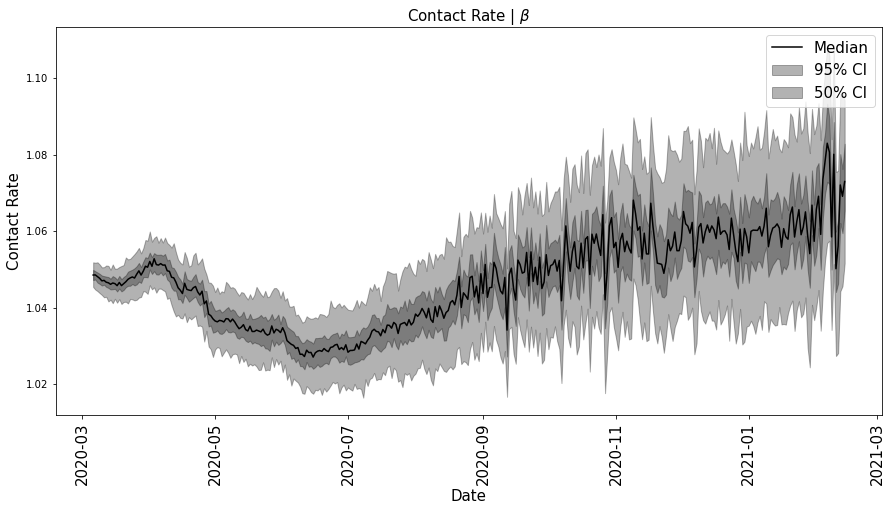

In [40]:
df_beta  = create_df_response(beta_post_time[0,:,:], time=num_steps, dates =dates_assimilation)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))
ax.plot(df_beta.index.values, df_beta["median"], color='k', label='Median')
ax.fill_between(df_beta.index.values, df_beta["high_95"], df_beta["low_95"], color='k', alpha=0.3, label='95% CI')
ax.fill_between(df_beta.index.values, df_beta["high_50"], df_beta["low_50"], color='k', alpha=0.3, label='50% CI')

ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Contact Rate", fontsize=15)
ax.set_title(r"Contact Rate | $\beta$ ", fontsize=15)
ax.legend(fontsize=15, loc='upper right')
plt.tight_layout()
plt.show()

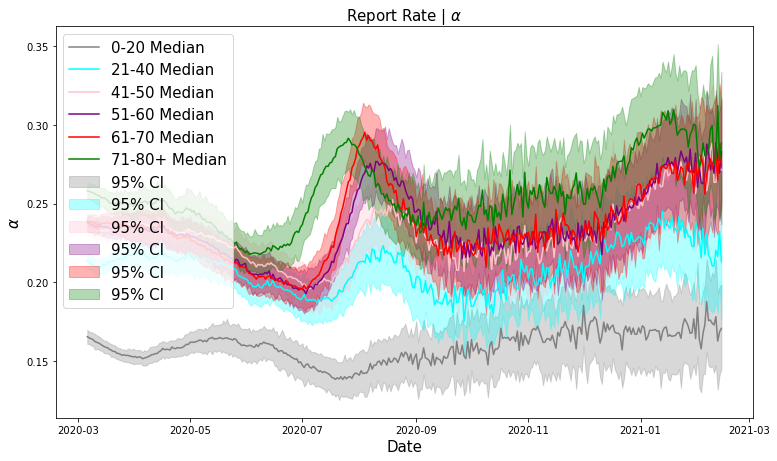

In [41]:
df_alpha0   = create_df_response(alpha_post_time[0,:,:], time=num_steps, dates =dates_assimilation)
df_alpha1   = create_df_response(alpha_post_time[1,:,:], time=num_steps, dates =dates_assimilation)
df_alpha2   = create_df_response(alpha_post_time[2,:,:], time=num_steps, dates =dates_assimilation)
df_alpha3   = create_df_response(alpha_post_time[3,:,:], time=num_steps, dates =dates_assimilation)
df_alpha4   = create_df_response(alpha_post_time[4,:,:], time=num_steps, dates =dates_assimilation)
df_alpha5   = create_df_response(alpha_post_time[5,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))

ax.plot(df_alpha0.index.values, df_alpha0["median"], color='gray', label='0-20 Median')
ax.fill_between(df_alpha0.index.values, df_alpha0["high_95"], df_alpha0["low_95"], color='gray', alpha=0.3, label='95% CI')

ax.plot(df_alpha1.index.values, df_alpha1["median"], color='cyan', label='21-40 Median')
ax.fill_between(df_alpha1.index.values, df_alpha1["high_95"], df_alpha1["low_95"], color='cyan', alpha=0.3, label='95% CI')

ax.plot(df_alpha2.index.values, df_alpha2["median"], color='pink', label='41-50 Median')
ax.fill_between(df_alpha2.index.values, df_alpha2["high_95"], df_alpha2["low_95"], color='pink', alpha=0.3, label='95% CI')

ax.plot(df_alpha3.index.values, df_alpha3["median"], color='purple', label='51-60 Median')
ax.fill_between(df_alpha3.index.values, df_alpha3["high_95"], df_alpha3["low_95"], color='purple', alpha=0.3, label='95% CI')

ax.plot(df_alpha4.index.values, df_alpha4["median"], color='red', label='61-70 Median')
ax.fill_between(df_alpha4.index.values, df_alpha4["high_95"], df_alpha4["low_95"], color='red', alpha=0.3, label='95% CI')

ax.plot(df_alpha5.index.values, df_alpha5["median"], color='green', label='71-80+ Median')
ax.fill_between(df_alpha5.index.values, df_alpha5["high_95"], df_alpha5["low_95"], color='green', alpha=0.3, label='95% CI')

ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel(r"$\alpha$", fontsize=15)
ax.set_title(r"Report Rate | $\alpha$ ", fontsize=15)
ax.legend(fontsize=15, loc='best')

In [42]:
Rt_age = np.zeros((6,200,346))
for i in range(6):
    Rt_age[i,:,:] =beta_post_time*(1-ifr_age[i])*(1/0.25)*(alpha_post_time[i,:,:]+(0.5*(1-alpha_post_time[i,:,:])))

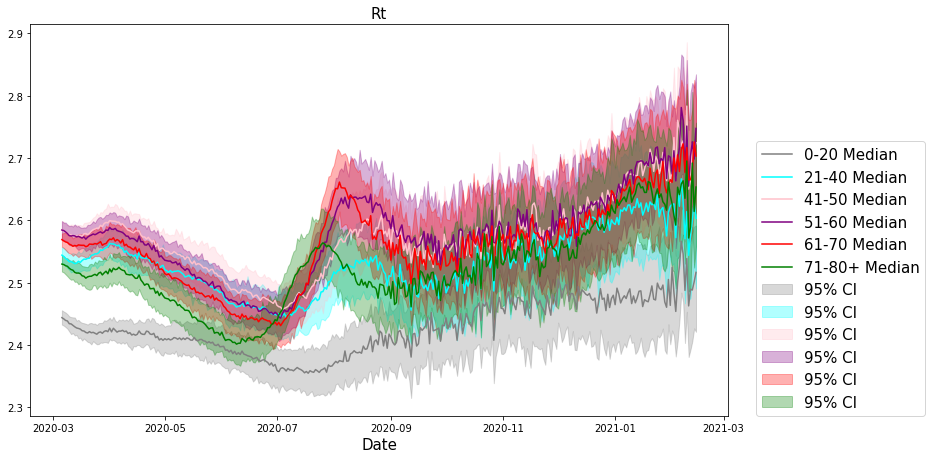

In [43]:
df_Rt0   = create_df_response(Rt_age[0,:,:], time=num_steps, dates =dates_assimilation)
df_Rt1   = create_df_response(Rt_age[1,:,:], time=num_steps, dates =dates_assimilation)
df_Rt2   = create_df_response(Rt_age[2,:,:], time=num_steps, dates =dates_assimilation)
df_Rt3   = create_df_response(Rt_age[3,:,:], time=num_steps, dates =dates_assimilation)
df_Rt4   = create_df_response(Rt_age[4,:,:], time=num_steps, dates =dates_assimilation)
df_Rt5   = create_df_response(Rt_age[5,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))

ax.plot(df_Rt0.index.values, df_Rt0["median"], color='gray', label='0-20 Median')
ax.fill_between(df_Rt0.index.values, df_Rt0["high_95"], df_Rt0["low_95"], color='gray', alpha=0.3, label='95% CI')

ax.plot(df_Rt1.index.values, df_Rt1["median"], color='cyan', label='21-40 Median')
ax.fill_between(df_Rt1.index.values, df_Rt1["high_95"], df_Rt1["low_95"], color='cyan', alpha=0.3, label='95% CI')

ax.plot(df_Rt2.index.values, df_Rt2["median"], color='pink', label='41-50 Median')
ax.fill_between(df_Rt2.index.values, df_Rt2["high_95"], df_Rt2["low_95"], color='pink', alpha=0.3, label='95% CI')

ax.plot(df_Rt3.index.values, df_Rt3["median"], color='purple', label='51-60 Median')
ax.fill_between(df_Rt3.index.values, df_Rt3["high_95"], df_Rt3["low_95"], color='purple', alpha=0.3, label='95% CI')

ax.plot(df_Rt4.index.values, df_Rt4["median"], color='red', label='61-70 Median')
ax.fill_between(df_Rt4.index.values, df_Rt4["high_95"], df_Rt4["low_95"], color='red', alpha=0.3, label='95% CI')

ax.plot(df_Rt5.index.values, df_Rt5["median"], color='green', label='71-80+ Median')
ax.fill_between(df_Rt5.index.values, df_Rt5["high_95"], df_Rt5["low_95"], color='green', alpha=0.3, label='95% CI')

ax.set_xlabel("Date", fontsize=15)
# ax.set_ylabel("", fontsize=15)
ax.set_title("Rt", fontsize=15)
ax.legend(fontsize=15, loc=(1.04,0))

In [46]:
x_post_time.shape

(16, 8, 200, 346)

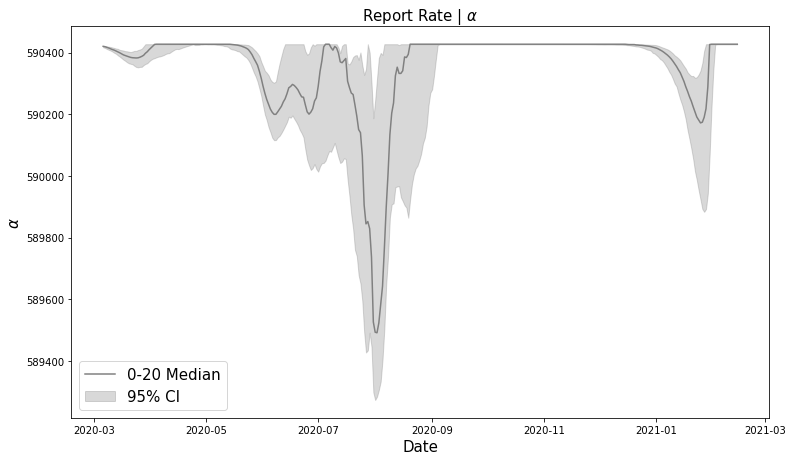

In [49]:

df_alpha0   = create_df_response(x_post_time[0,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha1   = create_df_response(x_post_time[1,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha2   = create_df_response(x_post_time[2,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha3   = create_df_response(x_post_time[3,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha4   = create_df_response(x_post_time[4,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha5   = create_df_response(x_post_time[5,0,:,:], time=num_steps, dates =dates_assimilation)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))

ax.plot(df_alpha0.index.values, df_alpha0["median"], color='gray', label='0-20 Median')
ax.fill_between(df_alpha0.index.values, df_alpha0["high_95"], df_alpha0["low_95"], color='gray', alpha=0.3, label='95% CI')

# ax.plot(df_alpha1.index.values, df_alpha1["median"], color='cyan', label='21-40 Median')
# ax.fill_between(df_alpha1.index.values, df_alpha1["high_95"], df_alpha1["low_95"], color='cyan', alpha=0.3, label='95% CI')

# ax.plot(df_alpha2.index.values, df_alpha2["median"], color='pink', label='41-50 Median')
# ax.fill_between(df_alpha2.index.values, df_alpha2["high_95"], df_alpha2["low_95"], color='pink', alpha=0.3, label='95% CI')

# ax.plot(df_alpha3.index.values, df_alpha3["median"], color='purple', label='51-60 Median')
# ax.fill_between(df_alpha3.index.values, df_alpha3["high_95"], df_alpha3["low_95"], color='purple', alpha=0.3, label='95% CI')

# ax.plot(df_alpha4.index.values, df_alpha4["median"], color='red', label='61-70 Median')
# ax.fill_between(df_alpha4.index.values, df_alpha4["high_95"], df_alpha4["low_95"], color='red', alpha=0.3, label='95% CI')

# ax.plot(df_alpha5.index.values, df_alpha5["median"], color='green', label='71-80+ Median')
# ax.fill_between(df_alpha5.index.values, df_alpha5["high_95"], df_alpha5["low_95"], color='green', alpha=0.3, label='95% CI')

ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel(r"$\alpha$", fontsize=15)
ax.set_title(r"Report Rate | $\alpha$ ", fontsize=15)
ax.legend(fontsize=15, loc='best')

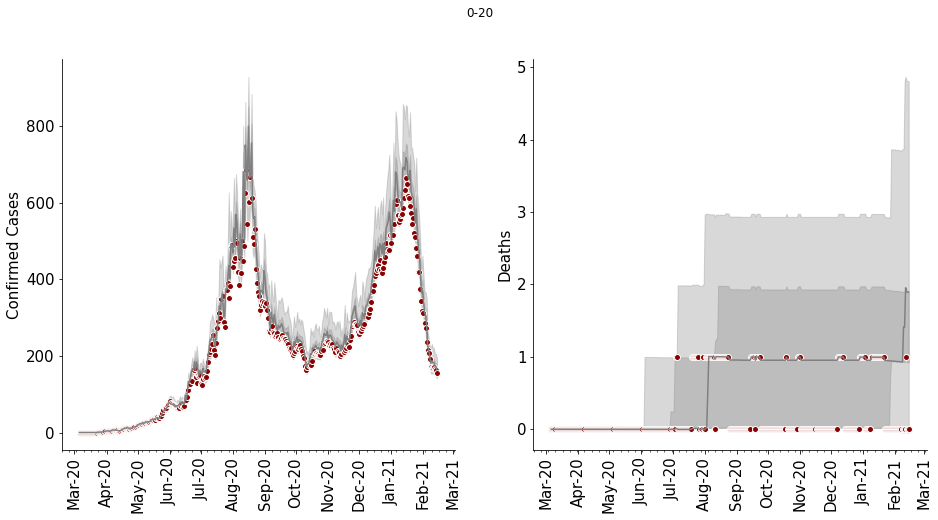

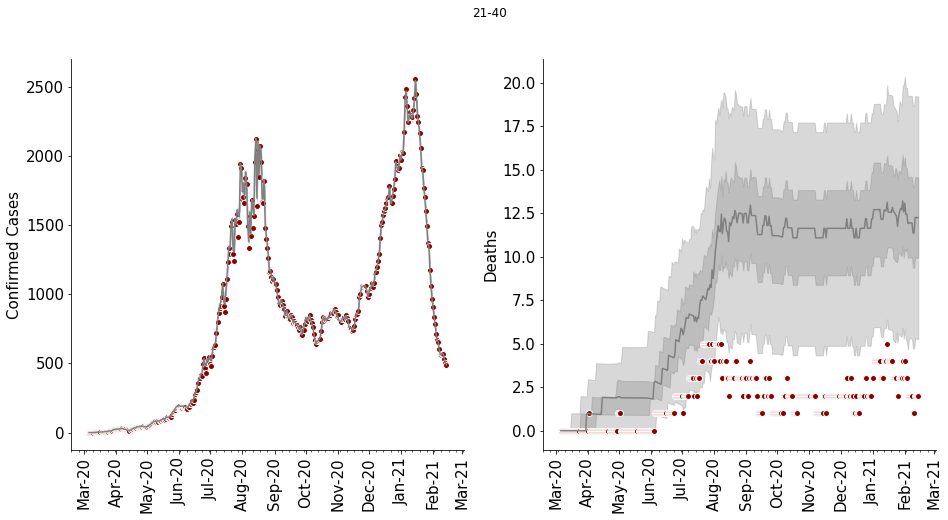

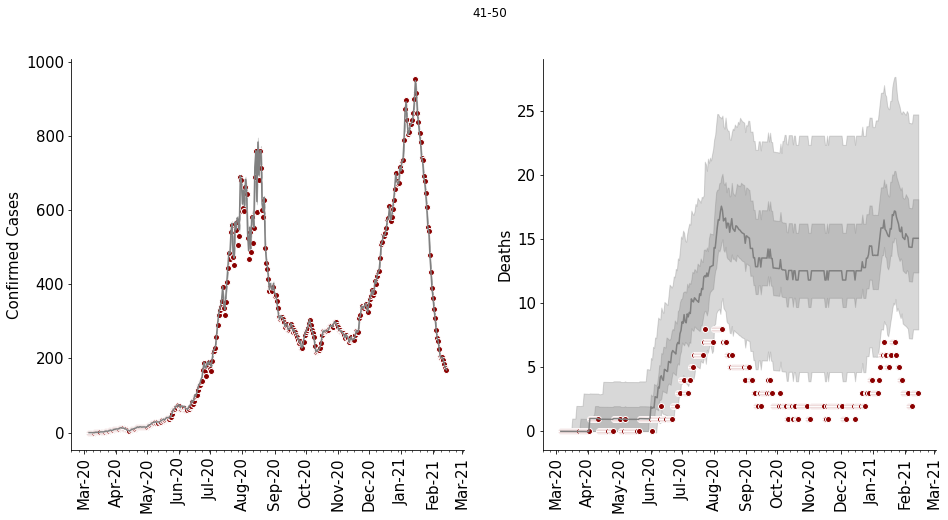

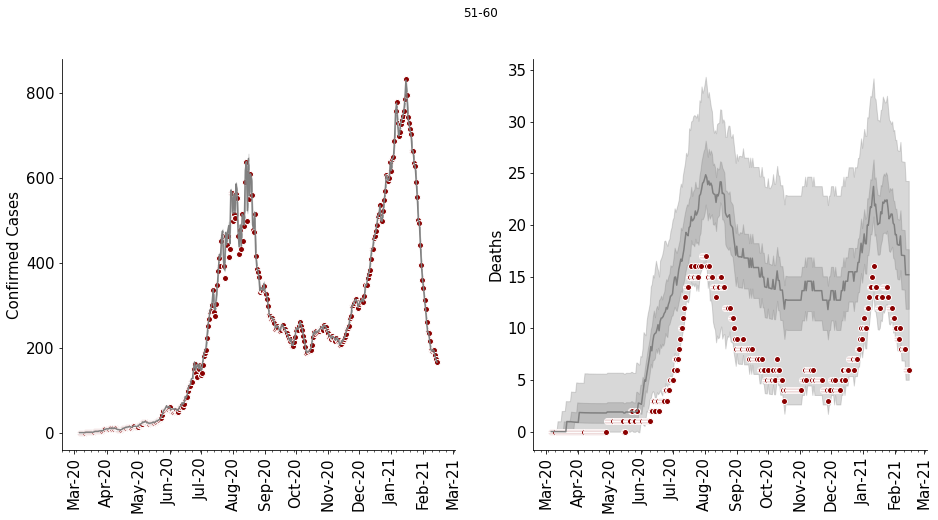

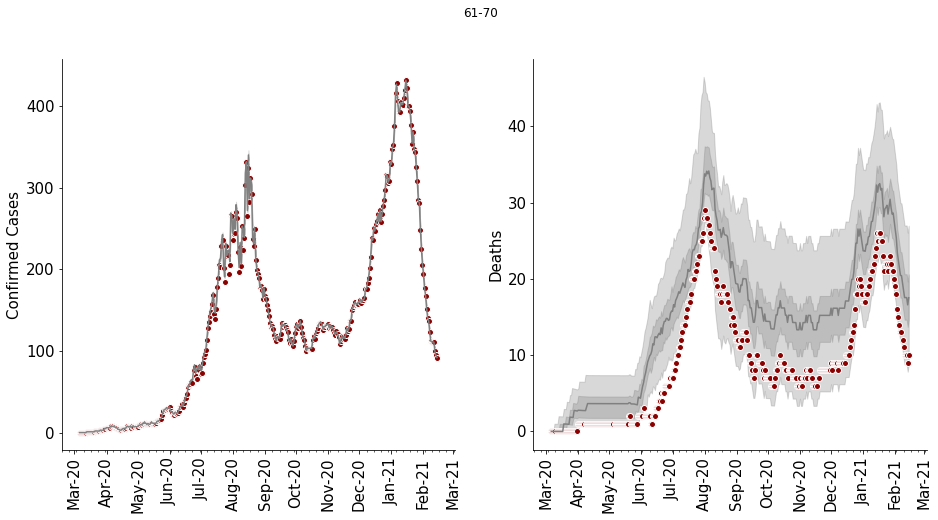

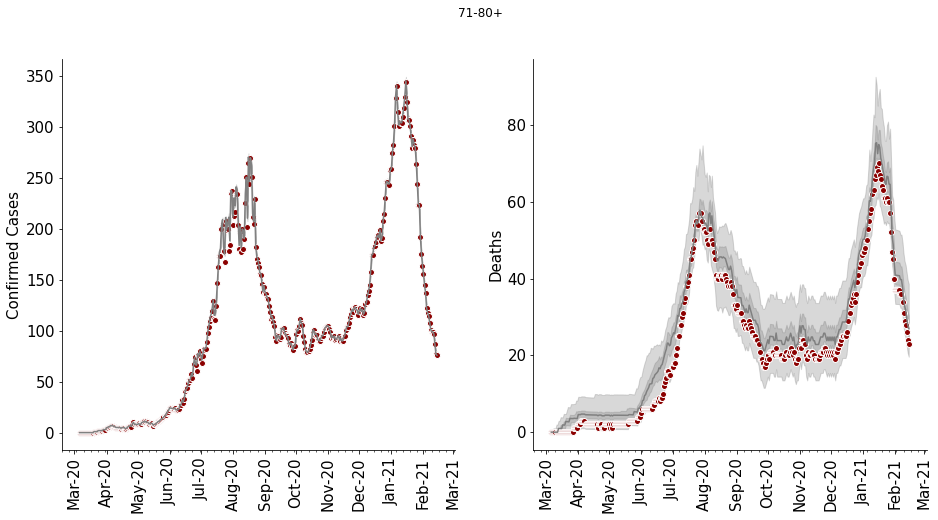

In [50]:
from matplotlib import dates as mdates
take_post     = 10

# confirmed_post_time = np.squeeze(confirmed_post_time[:,:,:,:, :take_post].mean(-1))
# deaths_post_time    = np.squeeze(deaths_post_all[:,:,:,:, :take_post].mean(-1))

df_confirmed  = create_df_response(cases_post_time[0,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[0,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='0-20')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='0-20')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='0-20')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='0-20')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('0-20')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[1,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[1,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='21-40')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='21-40')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='21-40')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='21-40')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('21-40')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[2,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[2,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='41-50')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='41-50')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='41-50')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='41-50')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('41-50')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[3,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[3,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='51-60')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='51-60')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='51-60')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='51-60')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('51-60')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[4,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[4,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='61-70')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='61-70')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='61-70')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='61-70')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('61-70')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[5,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[5,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='71-80+')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='71-80+')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='71-80+')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='71-80+')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('71-80+')
plt.show()